In [ ]:
# Packages
! pip install TTS
!pip show numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 938.0/938.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 96.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) 

Name: numpy
Version: 1.22.0
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: accelerate, albumentations, altair, arviz, astropy, autograd, blis, bokeh, bqplot, chex, cmdstanpy, contourpy, cudf-cu12, cufflinks, cupy-cuda12x, cvxpy, datascience, db-dtypes, dopamine_rl, ecos, encodec, flax, folium, geemap, gensim, gruut, gym, h5py, holoviews, hyperopt, ibis-framework, imageio, imbalanced-learn, imgaug, jax, jaxlib, librosa, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, nibabel, numba, numexpr, opencv-contrib-python, opencv-python, opencv-python-headless, opt-einsum, optax, orbax-checkpoint, osqp, pandas, pandas-gbq, pandas-stubs, patsy, plotnine, prophet, pyarrow, pycocotools, pyerfa, pymc, pytensor, python-louvain, PyWavelets, qdldl, qudida, rmm-c

In [ ]:
! pip install numpy==1.24

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 35.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.22.0 requires numpy==1.22.0; python_version <= "3.10", but you have numpy 1.24.0 which is incompatible.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.24.0 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.24.0 which is incompatible.
seaborn 0.13.1 requires numpy!=1.24.0,>=1.20, but you have numpy 1.24.0 which is incompatible.


In [ ]:
import librosa
import numpy as np
import os
import shutil
from google.colab import drive

from TTS.tts.configs.shared_configs import BaseDatasetConfig
from TTS.tts.datasets import load_tts_samples
from trainer import Trainer, TrainerArgs
from TTS.tts.datasets import load_tts_samples
from TTS.tts.layers.xtts.trainer.gpt_trainer import GPTArgs, GPTTrainer, GPTTrainerConfig, XttsAudioConfig
from TTS.utils.manage import ModelManager

In [ ]:

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
source=["/content/data/IndicTTS_Phase2_Hindi_fem_Speaker1_mono","/content/data/IndicTTS_Phase2_Hindi_male_Speaker1_english","/content/data/IndicTTS_Phase2_Hindi_male_Speaker1_mono","/content/data/IndicTTS_Phase3_Hindi_fem_Speaker1_mono","/content/data/IndicTTS_Phase3_Hindi_fem_Speaker2_mono","/content/data/IndicTTS_Phase3_Hindi_male_Speaker1_mono","/content/data/IndicTTS_Phase3_Hindi_male_Speaker2_mono"]

for i in source:
  source_path = i
  destination_path = '/content/drive/My Drive/tts'   # You can specify any folder in your Google Drive

  # Move the zip file to Google Drive
  shutil.move(source_path, destination_path)
  print(f'Saved zip file to {destination_path}')

Saved zip file to /content/drive/My Drive/tts
Saved zip file to /content/drive/My Drive/tts
Saved zip file to /content/drive/My Drive/tts
Saved zip file to /content/drive/My Drive/tts
Saved zip file to /content/drive/My Drive/tts
Saved zip file to /content/drive/My Drive/tts
Saved zip file to /content/drive/My Drive/tts


In [ ]:
def extract_mel_spectrogram(y, sr, n_mels=128, n_fft=2048, hop_length=512):
    mel_spec = librosa.feature.melspectrogram(y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to decibel units
    return mel_spec_db


def extract_mfcc(y, sr, n_mfcc=13, n_fft=2048, hop_length=512):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return mfccs


def normalize_features(features):
    mean = np.mean(features, axis=1, keepdims=True)
    std = np.std(features, axis=1, keepdims=True)
    normalized_features = (features - mean) / std
    return normalized_features




Subdirectory: mono
0
Subdirectory: wav
2
9487
File: train_manipurifemale_04075.wav
mel_spec: [[1.4715012e-03 8.6611672e-04 5.5452320e-04 ... 8.0918294e-04
  7.9918298e-04 3.9424904e-04]
 [2.1362666e-03 3.0312736e-03 1.1213302e-03 ... 2.4349343e-03
  1.3827418e-03 4.1795307e-04]
 [9.6096250e-04 2.3989489e-03 2.7243998e-03 ... 3.0122173e-03
  1.2464384e-03 6.1869889e-04]
 ...
 [5.3287562e-07 1.2624745e-06 6.2008701e-07 ... 5.6640511e-07
  1.4361577e-06 1.1499556e-06]
 [3.0142678e-07 7.7806544e-07 5.5208307e-07 ... 5.3120738e-07
  1.0938573e-06 8.0109936e-07]
 [1.3145599e-07 1.6079599e-07 2.7871241e-07 ... 4.1198550e-07
  6.4282500e-07 2.6633876e-07]] 
mfccs: <function extract_mfcc at 0x7a3ac5ed3f40>
Sample rate: 22050 Hz
Number of samples: 78498
Duration: 3.56 seconds
RMS energy: 0.05426814407110214
File: train_manipurifemale_01663.wav
mel_spec: [[2.52224010e-04 4.79354145e-04 3.37988138e-04 ... 4.21890029e-04
  4.57381975e-04 2.99715321e-04]
 [1.06243696e-03 1.37654936e-03 8.82883673e-0

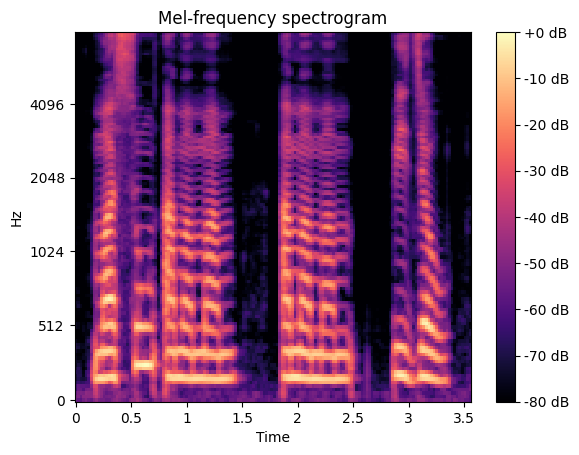

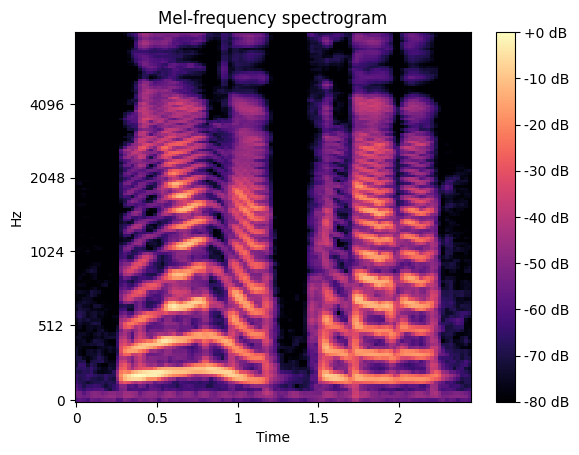

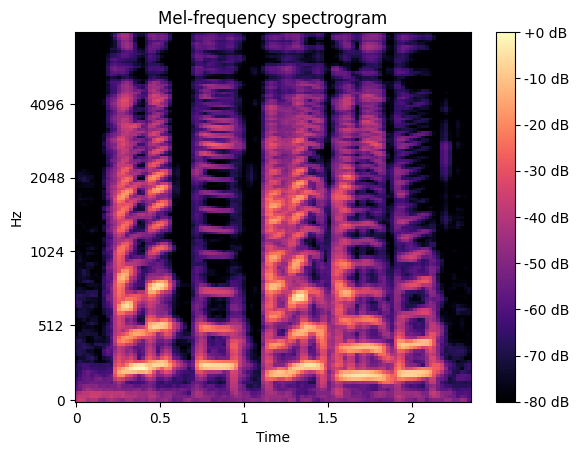

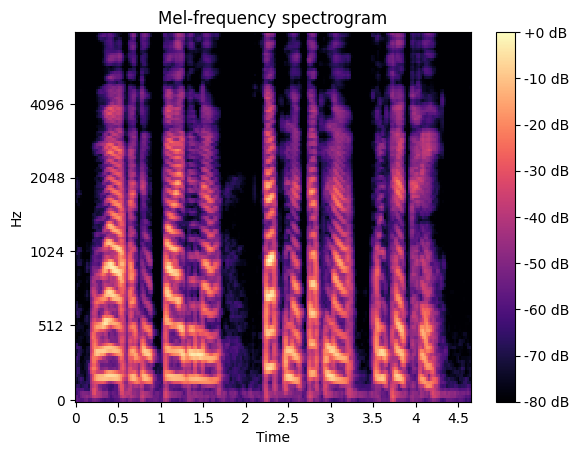

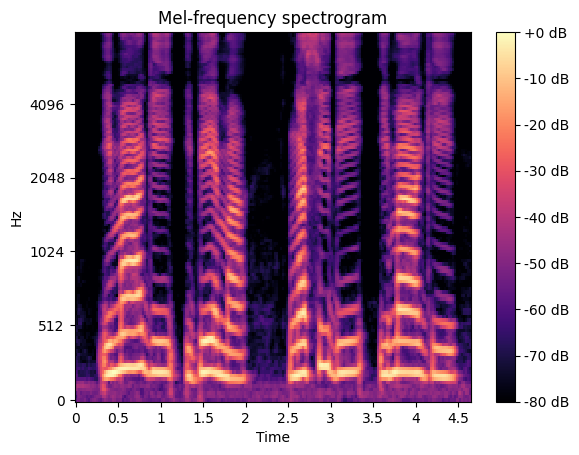

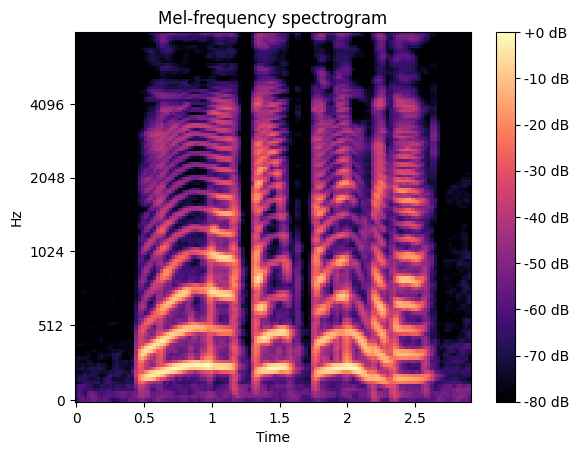

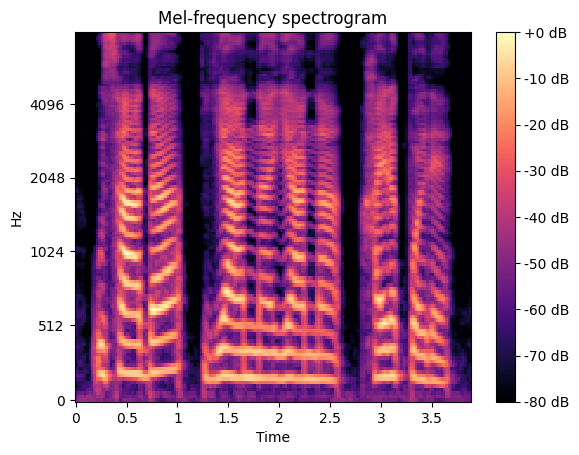

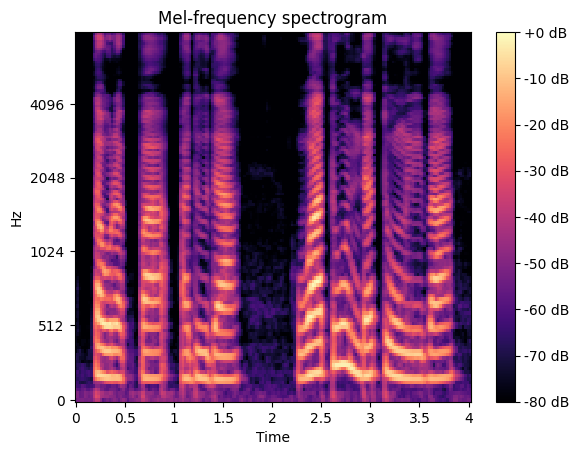

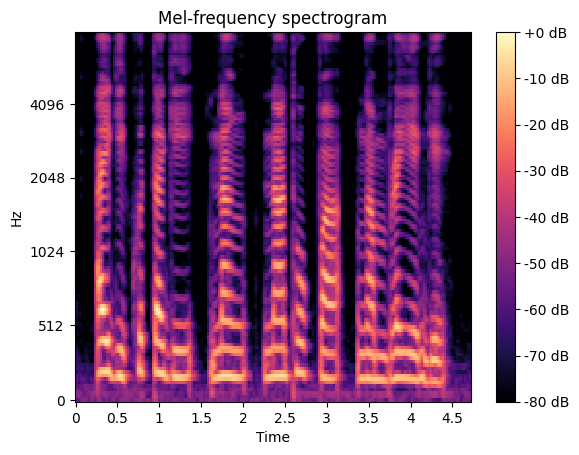

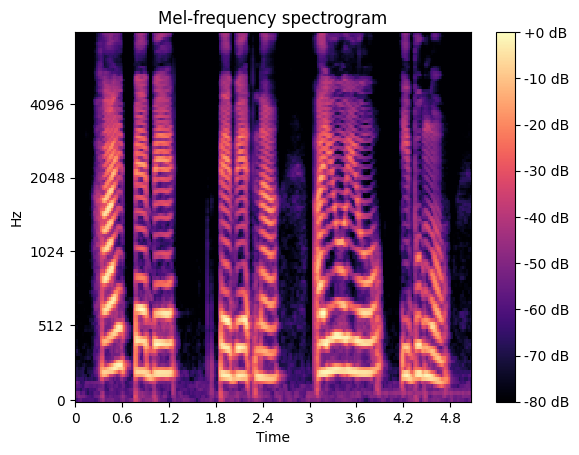

In [ ]:
import os
global_path_tts= "/content/data/IndicTTS_Phase2_Manipuri_fem_Speaker1_mono"
import matplotlib.pyplot as plt



def analyze_audio(file_path):
  y, sr = librosa.load(file_path, sr=None)

  # Duration
  duration = librosa.get_duration(y=y, sr=sr)
  # Number of samples
  num_samples = len(y)
  # RMS energy
  rms = librosa.feature.rms(y=y).mean()
  # mel_spec = extract_mel_spectrogram(y, sr)
  S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)
  mfccs = extract_mfcc(y, sr)

  print(f"mel_spec: {S} ")
  print(f"mfccs: {extract_mfcc}")

  print(f"Sample rate: {sr} Hz")
  print(f"Number of samples: {num_samples}")
  print(f"Duration: {duration} seconds")
  print(f"RMS energy: {rms}")

  # Plot
  fig, ax = plt.subplots()
  S_dB = librosa.power_to_db(S, ref=np.max)
  img = librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=sr,
                          fmax=8000, ax=ax)
  fig.colorbar(img, ax=ax, format='%+2.0f dB')
  ax.set(title='Mel-frequency spectrogram')

def loop_through_folders(root_folder):
    global global_path_tts

    for root, dirs, files in os.walk(root_folder):
        # print(f"Current directory: {root}")
        for dir_name in dirs:
            print(f"Subdirectory: {dir_name}")
        c=0
        print(len(files))
        for file_name in files:
            if file_name[-4:]== ".wav":
              print(f"File: {file_name}")
              analyze_audio(global_path_tts+f"/mono/wav/{file_name}")
            c=c+1
            if c==10:
              break

# Replace 'your_root_folder_path' with the path to the root folder you want to loop through
loop_through_folders('/content/data/IndicTTS_Phase2_Manipuri_fem_Speaker1_mono')


In [ ]:
# from TTS.tts.datasets.formatters import ljspeech

def ljspeech(root_path, meta_file, **kwargs):
    """Formatter for the LJSpeech dataset.

    Args:
        root_path (str): path to the dataset folder.
        meta_file (str): name of the metadata file.

    Returns:
        List[Dict]: list of dicts containing the text and audio file path.
    """

    txt_file = os.path.join(root_path, meta_file)
    items = []
    speaker_name = "my_speaker"

    with open(txt_file, "r", encoding="utf-8") as ttf:
        for line in ttf:
            cols = line.split("|")
            print(cols)
            wav_file = os.path.join("/content/drive/My Drive/tts", cols[0])
            text = cols[1]
            items.append({"text":text, "audio_file":wav_file, "speaker_name":speaker_name, "root_path": root_path})

    return items

In [ ]:
from TTS.utils.audio import AudioProcessor
ap = AudioProcessor.init_from_config(config)
# Modify sample rate if for a custom audio dataset:
# ap.sample_rate = 22050
from TTS.tts.utils.text.tokenizer import TTSTokenizer
tokenizer, config = TTSTokenizer.init_from_config(config)


[{'text': 'at this judith was convulsed with laughter.\n', 'audio_file': '/content/data/IndicTTS_Phase2_Assamese_male_Speaker1_english/english/wav/train_assamesemale_00575.wav', 'speaker_name': 'my_speaker', 'root_path': '/content/data/IndicTTS_Phase2_Assamese_male_Speaker1_english/english', 'language': 'en-us', 'audio_unique_name': '#wav/train_assamesemale_00575'}, {'text': 'He requested them to inform if they found it.\n', 'audio_file': '/content/data/IndicTTS_Phase2_Assamese_male_Speaker1_english/english/wav/train_assamesemale_06697.wav', 'speaker_name': 'my_speaker', 'root_path': '/content/data/IndicTTS_Phase2_Assamese_male_Speaker1_english/english', 'language': 'en-us', 'audio_unique_name': '#wav/train_assamesemale_06697'}, {'text': 'after flying a little away from the lake.\n', 'audio_file': '/content/data/IndicTTS_Phase2_Assamese_male_Speaker1_english/english/wav/train_assamesemale_03115.wav', 'speaker_name': 'my_speaker', 'root_path': '/content/data/IndicTTS_Phase2_Assamese_mal

In [ ]:
print(config)
# Create a copy of the config and remove the non-serializable formatter function
trainer_config = config
trainer_config.datasets[0].formatter = "ljspeech" # Replace function with string representation


GlowTTSConfig(output_path='/content/data/IndicTTS_Phase2_Assamese_male_Speaker1_english/english', logger_uri=None, run_name='run', project_name=None, run_description='🐸Coqui trainer run.', print_step=25, plot_step=100, model_param_stats=False, wandb_entity=None, dashboard_logger='tensorboard', save_on_interrupt=True, log_model_step=None, save_step=1000, save_n_checkpoints=5, save_checkpoints=True, save_all_best=False, save_best_after=0, target_loss=None, print_eval=False, test_delay_epochs=-1, run_eval=True, run_eval_steps=None, distributed_backend='nccl', distributed_url='tcp://localhost:54321', mixed_precision=True, precision='fp16', epochs=2, batch_size=32, eval_batch_size=16, grad_clip=5.0, scheduler_after_epoch=True, lr=0.001, optimizer='RAdam', optimizer_params={'betas': [0.9, 0.998], 'weight_decay': 1e-06}, lr_scheduler='NoamLR', lr_scheduler_params={'warmup_steps': 4000}, use_grad_scaler=False, allow_tf32=False, cudnn_enable=True, cudnn_deterministic=False, cudnn_benchmark=Fals

In [ ]:
RUN_NAME = "GPT_XTTS_v2.0_LJSpeech_FT"
PROJECT_NAME = "XTTS_trainer"
DASHBOARD_LOGGER = "tensorboard"
LOGGER_URI = None

# Set here the path that the checkpoints will be saved. Default: ./run/training/
OUT_PATH = "/content/drive/My Drive/tts/training"
# Training Parameters
OPTIMIZER_WD_ONLY_ON_WEIGHTS = True  # for multi-gpu training please make it False
START_WITH_EVAL = True  # if True it will star with evaluation
BATCH_SIZE = 3  # set here the batch size
GRAD_ACUMM_STEPS = 84  # set here the grad accumulation steps
# Note: we recommend that BATCH_SIZE * GRAD_ACUMM_STEPS need to be at least 252 for more efficient training. You can increase/decrease BATCH_SIZE but then set GRAD_ACUMM_STEPS accordingly.


In [ ]:
output_path="/content/drive/MyDrive/tts/IndicTTS_Phase2_Hindi_fem_Speaker1_english/english"
dataset_config = BaseDatasetConfig(formatter=ljspeech, meta_file_train="transcript.txt", language="en", path=output_path)
from TTS.tts.datasets import load_tts_samples


In [ ]:
DATASETS_CONFIG_LIST = [dataset_config]

# Define the path where XTTS v2.0.1 files will be downloaded
CHECKPOINTS_OUT_PATH = os.path.join(OUT_PATH, "XTTS_v2.0_original_model_files/")
os.makedirs(CHECKPOINTS_OUT_PATH, exist_ok=True)


# DVAE files
DVAE_CHECKPOINT_LINK = "https://coqui.gateway.scarf.sh/hf-coqui/XTTS-v2/main/dvae.pth"
MEL_NORM_LINK = "https://coqui.gateway.scarf.sh/hf-coqui/XTTS-v2/main/mel_stats.pth"

# Set the path to the downloaded files
DVAE_CHECKPOINT = os.path.join(CHECKPOINTS_OUT_PATH, os.path.basename(DVAE_CHECKPOINT_LINK))
MEL_NORM_FILE = os.path.join(CHECKPOINTS_OUT_PATH, os.path.basename(MEL_NORM_LINK))

# download DVAE files if needed
if not os.path.isfile(DVAE_CHECKPOINT) or not os.path.isfile(MEL_NORM_FILE):
    print(" > Downloading DVAE files!")
    ModelManager._download_model_files([MEL_NORM_LINK, DVAE_CHECKPOINT_LINK], CHECKPOINTS_OUT_PATH, progress_bar=True)



In [ ]:
TOKENIZER_FILE_LINK = "https://coqui.gateway.scarf.sh/hf-coqui/XTTS-v2/main/vocab.json"
XTTS_CHECKPOINT_LINK = "https://coqui.gateway.scarf.sh/hf-coqui/XTTS-v2/main/model.pth"

# XTTS transfer learning parameters: You we need to provide the paths of XTTS model checkpoint that you want to do the fine tuning.
TOKENIZER_FILE = os.path.join(CHECKPOINTS_OUT_PATH, os.path.basename(TOKENIZER_FILE_LINK))  # vocab.json file
XTTS_CHECKPOINT = os.path.join(CHECKPOINTS_OUT_PATH, os.path.basename(XTTS_CHECKPOINT_LINK))  # model.pth file

# download XTTS v2.0 files if needed
if not os.path.isfile(TOKENIZER_FILE) or not os.path.isfile(XTTS_CHECKPOINT):
    print(" > Downloading XTTS v2.0 files!")
    ModelManager._download_model_files(
        [TOKENIZER_FILE_LINK, XTTS_CHECKPOINT_LINK], CHECKPOINTS_OUT_PATH, progress_bar=True
    )


# Training sentences generations
SPEAKER_REFERENCE = [
    "/content/train_hindifullmale_00002.wav"  # speaker reference to be used in training test sentences
]
LANGUAGE = dataset_config.language


In [ ]:
def main():
    # init args and config
    model_args = GPTArgs(
        max_conditioning_length=132300,  # 6 secs
        min_conditioning_length=66150,  # 3 secs
        debug_loading_failures=False,
        max_wav_length=255995,  # ~11.6 seconds
        max_text_length=200,
        mel_norm_file=MEL_NORM_FILE,
        dvae_checkpoint=DVAE_CHECKPOINT,
        xtts_checkpoint=XTTS_CHECKPOINT,  # checkpoint path of the model that you want to fine-tune
        tokenizer_file=TOKENIZER_FILE,
        gpt_num_audio_tokens=1026,
        gpt_start_audio_token=1024,
        gpt_stop_audio_token=1025,
        gpt_use_masking_gt_prompt_approach=True,
        gpt_use_perceiver_resampler=True,

    )
    # define audio config
    audio_config = XttsAudioConfig(sample_rate=22050, dvae_sample_rate=22050, output_sample_rate=24000)
    # training parameters config
    config = GPTTrainerConfig(
        output_path=OUT_PATH,
        model_args=model_args,
        run_name=RUN_NAME,
        project_name=PROJECT_NAME,
        run_description="""
            GPT XTTS training
            """,
        dashboard_logger=DASHBOARD_LOGGER,
        epochs=10,
        logger_uri=LOGGER_URI,
        audio=audio_config,
        batch_size=BATCH_SIZE,
        batch_group_size=48,
        eval_batch_size=BATCH_SIZE,
        num_loader_workers=8,
        eval_split_max_size=256,
        print_step=50,
        plot_step=100,
        log_model_step=1000,
        save_step=10000,
        save_n_checkpoints=1,
        save_checkpoints=True,
        # target_loss="loss",
        print_eval=False,
        # Optimizer values like tortoise, pytorch implementation with modifications to not apply WD to non-weight parameters.
        optimizer="AdamW",
        optimizer_wd_only_on_weights=OPTIMIZER_WD_ONLY_ON_WEIGHTS,
        optimizer_params={"betas": [0.9, 0.96], "eps": 1e-8, "weight_decay": 1e-2},
        lr=5e-06,  # learning rate
        lr_scheduler="MultiStepLR",
        # it was adjusted accordly for the new step scheme
        lr_scheduler_params={"milestones": [50000 * 18, 150000 * 18, 300000 * 18], "gamma": 0.5, "last_epoch": -1},
        test_sentences=[
            {
                "text": "It took me quite a long time to develop a voice, and now that I have it I'm not going to be silent.",
                "speaker_wav": SPEAKER_REFERENCE,
                "language": LANGUAGE,
            },
            {
                "text": "This cake is great. It's so delicious and moist.",
                "speaker_wav": SPEAKER_REFERENCE,
                "language": LANGUAGE,
            },
        ],
    )

    # init the model from config
    model = GPTTrainer.init_from_config(config)

    # load training samples
    train_samples, eval_samples = load_tts_samples(
        DATASETS_CONFIG_LIST,
        formatter=ljspeech,
        eval_split=True,
        eval_split_max_size=config.eval_split_max_size,
        eval_split_size=config.eval_split_size,
    )

    # init the trainer and 🚀
    trainer = Trainer(
        TrainerArgs(
            restore_path=None,  # xtts checkpoint is restored via xtts_checkpoint key so no need of restore it using Trainer restore_path parameter
            skip_train_epoch=False,
            start_with_eval=START_WITH_EVAL,
            grad_accum_steps=GRAD_ACUMM_STEPS,
        ),
        config,
        output_path=OUT_PATH,
        model=model,
        train_samples=train_samples,
        eval_samples=eval_samples,
    )
    trainer.fit()


if __name__ == "__main__":
    main()

Streaming output truncated to the last 5000 lines.
['IndicTTS_Phase2_Hindi_fem_Speaker1_english/english/wav/train_hindifullfemale_01543.wav', 'He saw, too, the coconut that had fallen to the ground near by.\n']
['IndicTTS_Phase2_Hindi_fem_Speaker1_english/english/wav/train_hindifullfemale_01544.wav', 'Then the Lion said to the Rabbit, It must have been the sound of the coconut falling to the ground that you heard you foolish Rabbit!\n']
['IndicTTS_Phase2_Hindi_fem_Speaker1_english/english/wav/train_hindifullfemale_01545.wav', 'And the Lion ran back to other animals, and told them all about it.\n']
['IndicTTS_Phase2_Hindi_fem_Speaker1_english/english/wav/train_hindifullfemale_01546.wav', 'If it had not been for the wise King of Beasts, they might still be running.\n']
['IndicTTS_Phase2_Hindi_fem_Speaker1_english/english/wav/train_hindifullfemale_01547.wav', 'Once upon a time in a certain country a thrifty merchant visited a great city and bought a great supply of goods.\n']
['IndicTTS_P

 > Training Environment:
 | > Backend: Torch
 | > Mixed precision: False
 | > Precision: float32
 | > Current device: 0
 | > Num. of GPUs: 1
 | > Num. of CPUs: 8
 | > Num. of Torch Threads: 1
 | > Torch seed: 1
 | > Torch CUDNN: True
 | > Torch CUDNN deterministic: False
 | > Torch CUDNN benchmark: False
 | > Torch TF32 MatMul: False
 > Start Tensorboard: tensorboard --logdir=/content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000

 > Model has 514771807 parameters

 > EPOCH: 0/10
 --> /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000


 > Filtering invalid eval samples!!
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



 > EVALUATION 



 > Total eval samples after filtering: 62
 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.1181649923324585 (+0)
     | > avg_loss_text_ce: 0.022871167957782743 (+0)
     | > avg_loss_mel_ce: 3.570249247550964 (+0)
     | > avg_loss: 3.5931204199790954 (+0)


 > EPOCH: 1/10
 --> /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000

 > TRAINING (2024-07-22 21:06:02) 


 > Sampling by language: dict_keys(['en'])


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()

   --> TIME: 2024-07-22 21:06:06 -- STEP: 0/2159 -- GLOBAL_STEP: 0
     | > loss_text_ce: 0.02259117364883423  (0.02259117364883423)
     | > loss_mel_ce: 3.5609130859375  (3.5609130859375)
     | > loss: 0.04266076534986496  (0.04266076534986496)
     | > current_lr: 5e-06 
     | > step_time: 0.5973  (0.597346305847168)
     | > loader_time: 3.1702  (3.170165538787842)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:06:43 -- STEP: 50/2159 -- GLOBAL_STEP: 50
     | > loss_text_ce: 0.027974044904112816  (0.024526069462299346)
     | > loss_mel_ce: 3.5329535007476807  (3.6544385957717895)
     | > loss: 0.04239199683070183  (0.043797199353575705)
     | > current_lr: 5e-06 
     | > step_time: 0.5662  (0.48020789146423337)
     | > loader_time: 0.011  (0.010926384925842282)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:07:21 -- STEP: 100/2159 -- GLOBAL_STEP: 100
     | > loss_text_ce: 0.022122101858258247  (0.024080054722726344)
     | > loss_mel_ce: 2.950282335281372  (3.59456237077713)
     | > loss: 0.03538576886057854  (0.04307907745242119)
     | > current_lr: 5e-06 
     | > step_time: 0.4818  (0.4871483707427979)
     | > loader_time: 0.0094  (0.010759451389312745)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:07:57 -- STEP: 150/2159 -- GLOBAL_STEP: 150
     | > loss_text_ce: 0.03048725053668022  (0.02427177548408509)
     | > loss_mel_ce: 3.3931725025177  (3.5533716106414794)
     | > loss: 0.040757857263088226  (0.04259099364280701)
     | > current_lr: 5e-06 
     | > step_time: 0.4537  (0.4798207394282023)
     | > loader_time: 0.0093  (0.010678157806396485)


   --> TIME: 2024-07-22 21:08:35 -- STEP: 200/2159 -- GLOBAL_STEP: 200
     | > loss_text_ce: 0.026003463193774223  (0.024490897310897708)
     | > loss_mel_ce: 3.7345871925354004  (3.5119632959365843)
     | > loss: 0.044768936932086945  (0.04210064612329004)
     | > current_lr: 5e-06 
     | > step_time: 0.3334  (0.4813422322273254)
     | > loader_time: 0.0098  (0.010695947408676148)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:09:13 -- STEP: 250/2159 -- GLOBAL_STEP: 250
     | > loss_text_ce: 0.024117136374115944  (0.024469648741185665)
     | > loss_mel_ce: 3.2927603721618652  (3.477359214782715)
     | > loss: 0.03948663920164108  (0.04168843981623648)
     | > current_lr: 5e-06 
     | > step_time: 0.4481  (0.48375860595703124)
     | > loader_time: 0.0105  (0.010863805770874023)


   --> TIME: 2024-07-22 21:09:49 -- STEP: 300/2159 -- GLOBAL_STEP: 300
     | > loss_text_ce: 0.024451570585370064  (0.024547801706939938)
     | > loss_mel_ce: 3.154193639755249  (3.4428465867042544)
     | > loss: 0.03784101456403732  (0.0412785055488348)
     | > current_lr: 5e-06 
     | > step_time: 0.5252  (0.4797526454925537)
     | > loader_time: 0.013  (0.01084190527598063)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:10:27 -- STEP: 350/2159 -- GLOBAL_STEP: 350
     | > loss_text_ce: 0.02654322050511837  (0.02456505881888526)
     | > loss_mel_ce: 3.0356223583221436  (3.417221910612924)
     | > loss: 0.03645435348153114  (0.04097365534731319)
     | > current_lr: 5e-06 
     | > step_time: 0.352  (0.48103134155273436)
     | > loader_time: 0.0096  (0.010708226476396833)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:11:04 -- STEP: 400/2159 -- GLOBAL_STEP: 400
     | > loss_text_ce: 0.025372181087732315  (0.02459585968405008)
     | > loss_mel_ce: 3.2146003246307373  (3.3904340654611587)
     | > loss: 0.038571104407310486  (0.040655119065195325)
     | > current_lr: 5e-06 
     | > step_time: 0.4489  (0.48180014014244077)
     | > loader_time: 0.0097  (0.010588142871856688)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:11:42 -- STEP: 450/2159 -- GLOBAL_STEP: 450
     | > loss_text_ce: 0.023326333612203598  (0.024628251041803096)
     | > loss_mel_ce: 3.200958013534546  (3.3666522301567925)
     | > loss: 0.038384340703487396  (0.04037238756815593)
     | > current_lr: 5e-06 
     | > step_time: 0.5257  (0.4822598351372613)
     | > loader_time: 0.0121  (0.010591513315836586)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:12:20 -- STEP: 500/2159 -- GLOBAL_STEP: 500
     | > loss_text_ce: 0.02355111762881279  (0.02462787112221122)
     | > loss_mel_ce: 3.006498098373413  (3.348092963218689)
     | > loss: 0.0360720157623291  (0.0401514393761754)
     | > current_lr: 5e-06 
     | > step_time: 0.5298  (0.4830793480873108)
     | > loader_time: 0.0099  (0.010645028591156003)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:12:58 -- STEP: 550/2159 -- GLOBAL_STEP: 550
     | > loss_text_ce: 0.025352854281663895  (0.024653902924196287)
     | > loss_mel_ce: 3.0005781650543213  (3.328028062473644)
     | > loss: 0.03602299094200134  (0.03991288139738821)
     | > current_lr: 5e-06 
     | > step_time: 0.5735  (0.484280854138461)
     | > loader_time: 0.0104  (0.01057741511951793)


   --> TIME: 2024-07-22 21:13:35 -- STEP: 600/2159 -- GLOBAL_STEP: 600
     | > loss_text_ce: 0.02711561694741249  (0.02470987419908244)
     | > loss_mel_ce: 3.1275224685668945  (3.308678630987803)
     | > loss: 0.03755521401762962  (0.03968319734558466)
     | > current_lr: 5e-06 
     | > step_time: 0.3744  (0.4836913681030273)
     | > loader_time: 0.0092  (0.01048628608385721)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:14:12 -- STEP: 650/2159 -- GLOBAL_STEP: 650
     | > loss_text_ce: 0.028952306136488914  (0.024721712553157256)
     | > loss_mel_ce: 3.097698450088501  (3.290105264370258)
     | > loss: 0.037222035229206085  (0.03946222679546247)
     | > current_lr: 5e-06 
     | > step_time: 0.723  (0.4834103789696327)
     | > loader_time: 0.0101  (0.010446966244624205)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:14:50 -- STEP: 700/2159 -- GLOBAL_STEP: 700
     | > loss_text_ce: 0.023320350795984268  (0.024740441563938346)
     | > loss_mel_ce: 2.6637115478515625  (3.275044963019235)
     | > loss: 0.031988475471735  (0.039283160428915734)
     | > current_lr: 5e-06 
     | > step_time: 0.52  (0.48398657628468106)
     | > loader_time: 0.0097  (0.01046780960900443)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:15:27 -- STEP: 750/2159 -- GLOBAL_STEP: 750
     | > loss_text_ce: 0.02441817708313465  (0.024719036440054576)
     | > loss_mel_ce: 2.700240135192871  (3.260662764231364)
     | > loss: 0.03243640810251236  (0.03911168894668422)
     | > current_lr: 5e-06 
     | > step_time: 0.3601  (0.4839475040435791)
     | > loader_time: 0.0087  (0.0104617919921875)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:16:04 -- STEP: 800/2159 -- GLOBAL_STEP: 800
     | > loss_text_ce: 0.02518312819302082  (0.02472384088905528)
     | > loss_mel_ce: 2.6348979473114014  (3.2437604001164435)
     | > loss: 0.03166763484477997  (0.038910527506377544)
     | > current_lr: 5e-06 
     | > step_time: 0.4477  (0.48296007841825483)
     | > loader_time: 0.0088  (0.010395070910453795)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:16:42 -- STEP: 850/2159 -- GLOBAL_STEP: 850
     | > loss_text_ce: 0.02572985179722309  (0.024749542774961275)
     | > loss_mel_ce: 3.2420432567596436  (3.2324096985424267)
     | > loss: 0.03890206292271614  (0.03877570607425535)
     | > current_lr: 5e-06 
     | > step_time: 0.6082  (0.48353531332576977)
     | > loader_time: 0.0087  (0.010351827004376578)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:17:17 -- STEP: 900/2159 -- GLOBAL_STEP: 900
     | > loss_text_ce: 0.024479681625962257  (0.0247749876189563)
     | > loss_mel_ce: 3.091080665588379  (3.21690683444341)
     | > loss: 0.037090003490448  (0.03859145106954707)
     | > current_lr: 5e-06 
     | > step_time: 0.4891  (0.481405492093828)
     | > loader_time: 0.011  (0.010311948458353676)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:17:55 -- STEP: 950/2159 -- GLOBAL_STEP: 950
     | > loss_text_ce: 0.02700122818350792  (0.02480686407732336)
     | > loss_mel_ce: 3.045161247253418  (3.2046339323646142)
     | > loss: 0.03657336160540581  (0.038445724566516126)
     | > current_lr: 5e-06 
     | > step_time: 0.4515  (0.4824689014334428)
     | > loader_time: 0.0096  (0.010323054915980286)


   --> TIME: 2024-07-22 21:18:32 -- STEP: 1000/2159 -- GLOBAL_STEP: 1000
     | > loss_text_ce: 0.026229972019791603  (0.024819789860397578)
     | > loss_mel_ce: 2.7913107872009277  (3.191645570755005)
     | > loss: 0.03354215249419212  (0.038291255097836256)
     | > current_lr: 5e-06 
     | > step_time: 0.483  (0.4818026440143585)
     | > loader_time: 0.0088  (0.010298882722854612)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:19:10 -- STEP: 1050/2159 -- GLOBAL_STEP: 1050
     | > loss_text_ce: 0.023980747908353806  (0.02483958563279538)
     | > loss_mel_ce: 2.6788134574890137  (3.17991564478193)
     | > loss: 0.032176122069358826  (0.0381518487720972)
     | > current_lr: 5e-06 
     | > step_time: 0.3345  (0.48228002230326333)
     | > loader_time: 0.0092  (0.010268759046282085)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:19:47 -- STEP: 1100/2159 -- GLOBAL_STEP: 1100
     | > loss_text_ce: 0.02717573195695877  (0.024864663266661494)
     | > loss_mel_ce: 2.9213016033172607  (3.1683974224870846)
     | > loss: 0.035100921988487244  (0.038015025630593315)
     | > current_lr: 5e-06 
     | > step_time: 0.6109  (0.4822917784344066)
     | > loader_time: 0.0106  (0.010237491130828856)


   --> TIME: 2024-07-22 21:20:26 -- STEP: 1150/2159 -- GLOBAL_STEP: 1150
     | > loss_text_ce: 0.03091707080602646  (0.024874879097485026)
     | > loss_mel_ce: 2.444758176803589  (3.1554638027108215)
     | > loss: 0.02947232685983181  (0.03786117557598196)
     | > current_lr: 5e-06 
     | > step_time: 0.7242  (0.4831567948797475)
     | > loader_time: 0.0105  (0.010210571081741993)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:21:02 -- STEP: 1200/2159 -- GLOBAL_STEP: 1200
     | > loss_text_ce: 0.024442367255687714  (0.024874171563424183)
     | > loss_mel_ce: 2.9260756969451904  (3.1433449910084392)
     | > loss: 0.03512521833181381  (0.037716895573151624)
     | > current_lr: 5e-06 
     | > step_time: 0.5413  (0.48234089930852253)
     | > loader_time: 0.0084  (0.010209395488103228)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:21:39 -- STEP: 1250/2159 -- GLOBAL_STEP: 1250
     | > loss_text_ce: 0.02774644084274769  (0.02487696095257998)
     | > loss_mel_ce: 2.9163870811462402  (3.13327363128662)
     | > loss: 0.035049207508563995  (0.03759703163206577)
     | > current_lr: 5e-06 
     | > step_time: 0.3705  (0.48217294635772706)
     | > loader_time: 0.0093  (0.01019429931640625)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:22:15 -- STEP: 1300/2159 -- GLOBAL_STEP: 1300
     | > loss_text_ce: 0.0253264419734478  (0.024863817459688752)
     | > loss_mel_ce: 2.805687665939331  (3.123254155562474)
     | > loss: 0.0337025485932827  (0.037477595700094374)
     | > current_lr: 5e-06 
     | > step_time: 0.3164  (0.48144194437907295)
     | > loader_time: 0.0089  (0.010177758840414192)


   --> TIME: 2024-07-22 21:22:53 -- STEP: 1350/2159 -- GLOBAL_STEP: 1350
     | > loss_text_ce: 0.02503201737999916  (0.024855953855095102)
     | > loss_mel_ce: 2.831421136856079  (3.11463249012276)
     | > loss: 0.03400539606809616  (0.03737486321893007)
     | > current_lr: 5e-06 
     | > step_time: 0.5933  (0.4819854082884612)
     | > loader_time: 0.0094  (0.010149576399061408)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:23:30 -- STEP: 1400/2159 -- GLOBAL_STEP: 1400
     | > loss_text_ce: 0.024791711941361427  (0.024849128805633117)
     | > loss_mel_ce: 2.6729023456573486  (3.1049581258637566)
     | > loss: 0.03211540728807449  (0.037259610964517555)
     | > current_lr: 5e-06 
     | > step_time: 0.329  (0.48180710332734245)
     | > loader_time: 0.0084  (0.010128104516438073)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:24:05 -- STEP: 1450/2159 -- GLOBAL_STEP: 1450
     | > loss_text_ce: 0.02270502969622612  (0.024850124404605108)
     | > loss_mel_ce: 3.0370450019836426  (3.0952216261830823)
     | > loss: 0.036425597965717316  (0.037143712100283915)
     | > current_lr: 5e-06 
     | > step_time: 0.5679  (0.4807123953720619)
     | > loader_time: 0.0093  (0.010130730826279199)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:24:42 -- STEP: 1500/2159 -- GLOBAL_STEP: 1500
     | > loss_text_ce: 0.024297000840306282  (0.024856377209226305)
     | > loss_mel_ce: 2.8285281658172607  (3.0859463640848794)
     | > loss: 0.03396220505237579  (0.03703336674223349)
     | > current_lr: 5e-06 
     | > step_time: 0.3768  (0.4801845103899638)
     | > loader_time: 0.0092  (0.010125462373097718)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:25:19 -- STEP: 1550/2159 -- GLOBAL_STEP: 1550
     | > loss_text_ce: 0.026125576347112656  (0.024836654861367533)
     | > loss_mel_ce: 2.6742732524871826  (3.0767798014610044)
     | > loss: 0.0321476049721241  (0.036924006191472916)
     | > current_lr: 5e-06 
     | > step_time: 0.4639  (0.4805457333595522)
     | > loader_time: 0.0087  (0.010106500656374008)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:25:56 -- STEP: 1600/2159 -- GLOBAL_STEP: 1600
     | > loss_text_ce: 0.023130420595407486  (0.024838952466379863)
     | > loss_mel_ce: 2.925039291381836  (3.067568728476763)
     | > loss: 0.035097260028123856  (0.036814377913251574)
     | > current_lr: 5e-06 
     | > step_time: 0.3323  (0.48035537227988245)
     | > loader_time: 0.0099  (0.010081664472818344)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:26:33 -- STEP: 1650/2159 -- GLOBAL_STEP: 1650
     | > loss_text_ce: 0.02380078099668026  (0.02480800032051225)
     | > loss_mel_ce: 3.12419056892395  (3.060106813546383)
     | > loss: 0.03747608885169029  (0.036725177114660126)
     | > current_lr: 5e-06 
     | > step_time: 0.3697  (0.48035708673072586)
     | > loader_time: 0.01  (0.01005283124519114)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:27:11 -- STEP: 1700/2159 -- GLOBAL_STEP: 1700
     | > loss_text_ce: 0.026139721274375916  (0.024802809077150694)
     | > loss_mel_ce: 2.8456435203552246  (3.053169419625226)
     | > loss: 0.03418789803981781  (0.03664252728990776)
     | > current_lr: 5e-06 
     | > step_time: 0.3676  (0.48035300170674045)
     | > loader_time: 0.0087  (0.010046074390411348)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:27:47 -- STEP: 1750/2159 -- GLOBAL_STEP: 1750
     | > loss_text_ce: 0.030151860788464546  (0.024805968596466964)
     | > loss_mel_ce: 2.7125370502471924  (3.0453551090785433)
     | > loss: 0.032651059329509735  (0.036549537389406174)
     | > current_lr: 5e-06 
     | > step_time: 0.4622  (0.48015177181788854)
     | > loader_time: 0.0088  (0.010044583048139271)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:28:24 -- STEP: 1800/2159 -- GLOBAL_STEP: 1800
     | > loss_text_ce: 0.02426985464990139  (0.024785225909824186)
     | > loss_mel_ce: 2.822971820831299  (3.0379685993989307)
     | > loss: 0.03389573469758034  (0.036461355814503334)
     | > current_lr: 5e-06 
     | > step_time: 0.4737  (0.47967590649922687)
     | > loader_time: 0.0085  (0.010019189251793728)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:29:01 -- STEP: 1850/2159 -- GLOBAL_STEP: 1850
     | > loss_text_ce: 0.020585769787430763  (0.02477922265694755)
     | > loss_mel_ce: 2.6882009506225586  (3.0318330460625726)
     | > loss: 0.03224746137857437  (0.03638824203831927)
     | > current_lr: 5e-06 
     | > step_time: 0.4747  (0.47964791594324885)
     | > loader_time: 0.0086  (0.00999636456773085)


   --> TIME: 2024-07-22 21:29:38 -- STEP: 1900/2159 -- GLOBAL_STEP: 1900
     | > loss_text_ce: 0.02303854003548622  (0.024760893999942052)
     | > loss_mel_ce: 2.701570749282837  (3.0251107118004246)
     | > loss: 0.0324358269572258  (0.03630799605462115)
     | > current_lr: 5e-06 
     | > step_time: 0.5299  (0.47963263975946524)
     | > loader_time: 0.0104  (0.009982926594583585)


   --> TIME: 2024-07-22 21:30:15 -- STEP: 1950/2159 -- GLOBAL_STEP: 1950
     | > loss_text_ce: 0.022547142580151558  (0.02474320847636615)
     | > loss_mel_ce: 2.901211738586426  (3.019777547640678)
     | > loss

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:30:52 -- STEP: 2000/2159 -- GLOBAL_STEP: 2000
     | > loss_text_ce: 0.02581416815519333  (0.024720703849568974)
     | > loss_mel_ce: 2.444063901901245  (3.0135390156507493)
     | > loss: 0.029403310269117355  (0.036169759310781986)
     | > current_lr: 5e-06 
     | > step_time: 0.3237  (0.4796283128261566)
     | > loader_time: 0.0102  (0.009997388839721654)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:31:30 -- STEP: 2050/2159 -- GLOBAL_STEP: 2050
     | > loss_text_ce: 0.02506416290998459  (0.024708094555066864)
     | > loss_mel_ce: 2.916538953781128  (3.00890738975711)
     | > loss: 0.03501908481121063  (0.036114470794251806)
     | > current_lr: 5e-06 
     | > step_time: 0.6037  (0.47979327353035534)
     | > loader_time: 0.0094  (0.009977202648069776)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:32:06 -- STEP: 2100/2159 -- GLOBAL_STEP: 2100
     | > loss_text_ce: 0.02119273878633976  (0.02469014990010433)
     | > loss_mel_ce: 2.575206995010376  (3.0027311513537454)
     | > loss: 0.030909521505236626  (0.0360407305145193)
     | > current_lr: 5e-06 
     | > step_time: 0.3075  (0.4795427624384563)
     | > loader_time: 0.0097  (0.009960945901416574)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:32:43 -- STEP: 2150/2159 -- GLOBAL_STEP: 2150
     | > loss_text_ce: 0.022049959748983383  (0.024678198923898293)
     | > loss_mel_ce: 2.8352651596069336  (2.997469705204631)
     | > loss: 0.034015655517578125  (0.035977951968305354)
     | > current_lr: 5e-06 
     | > step_time: 0.3712  (0.4793795524641525)
     | > loader_time: 0.0117  (0.009955098795336324)


 > EVALUATION 



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.119765305519104 (+0.0016003131866454967)
     | > avg_loss_text_ce: 0.0228179344907403 (-5.323346704244267e-05)
     | > avg_loss_mel_ce: 2.6685640454292296 (-0.9016852021217345)
     | > avg_loss: 2.6913820028305055 (-0.9017384171485898)

 > BEST MODEL : /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000/best_model_2159.pth

 > EPOCH: 2/10
 --> /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000

 > TRAINING (2024-07-22 21:33:44) 


[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:34:18 -- STEP: 41/2159 -- GLOBAL_STEP: 2200
     | > loss_text_ce: 0.025510843843221664  (0.023374479218590552)
     | > loss_mel_ce: 2.786555290222168  (2.681602466397169)
     | > loss: 0.03347697854042053  (0.032202107059519466)
     | > current_lr: 5e-06 
     | > step_time: 0.5068  (0.4853074434326916)
     | > loader_time: 0.0084  (0.009428681396856538)


   --> TIME: 2024-07-22 21:34:54 -- STEP: 91/2159 -- GLOBAL_STEP: 2250
     | > loss_text_ce: 0.024278610944747925  (0.023764943663071796)
     | > loss_mel_ce: 2.561920166015625  (2.693737836984487)
     | > loss: 0.030788080766797066  (0.0323512241203379)
     | > current_lr: 5e-06 
     | > step_time: 0.5787  (0.4696663369189252)
     | > loader_time: 0.0102  (0.009560304683643382)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:35:32 -- STEP: 141/2159 -- GLOBAL_STEP: 2300
     | > loss_text_ce: 0.024502620100975037  (0.023840068383736812)
     | > loss_mel_ce: 2.5764782428741455  (2.7196652601796685)
     | > loss: 0.03096405789256096  (0.03266077817596022)
     | > current_lr: 5e-06 
     | > step_time: 0.6734  (0.47891172956913075)
     | > loader_time: 0.0105  (0.00962042639441524)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:36:09 -- STEP: 191/2159 -- GLOBAL_STEP: 2350
     | > loss_text_ce: 0.023507963865995407  (0.023787770166759092)
     | > loss_mel_ce: 2.6667392253875732  (2.730321980271664)
     | > loss: 0.0320267528295517  (0.032787021308045096)
     | > current_lr: 5e-06 
     | > step_time: 0.4432  (0.4784049276282026)
     | > loader_time: 0.0104  (0.009990516133333377)


   --> TIME: 2024-07-22 21:36:47 -- STEP: 241/2159 -- GLOBAL_STEP: 2400
     | > loss_text_ce: 0.029603073373436928  (0.023715226002872236)
     | > loss_mel_ce: 3.172701835632324  (2.7330911446409107)
     | > loss: 0.03812267631292343  (0.03281912402369669)
     | > current_lr: 5e-06 
     | > step_time: 0.6421  (0.47988422678713977)
     | > loader_time: 0.0113  (0.010178173231386051)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:37:23 -- STEP: 291/2159 -- GLOBAL_STEP: 2450
     | > loss_text_ce: 0.021580467000603676  (0.023689718065700163)
     | > loss_mel_ce: 2.7745583057403564  (2.733500651887192)
     | > loss: 0.03328736498951912  (0.03282369540754666)
     | > current_lr: 5e-06 
     | > step_time: 0.3809  (0.4783562761811456)
     | > loader_time: 0.0096  (0.010283020353808844)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:38:00 -- STEP: 341/2159 -- GLOBAL_STEP: 2500
     | > loss_text_ce: 0.024548908695578575  (0.02367244439084858)
     | > loss_mel_ce: 2.8669278621673584  (2.728266862130935)
     | > loss: 0.03442234545946121  (0.0327611827398063)
     | > current_lr: 5e-06 
     | > step_time: 0.5405  (0.4782482521974446)
     | > loader_time: 0.0097  (0.010269670542384177)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:38:39 -- STEP: 391/2159 -- GLOBAL_STEP: 2550
     | > loss_text_ce: 0.027232632040977478  (0.02370485529074888)
     | > loss_mel_ce: 2.736232042312622  (2.7314799350240953)
     | > loss: 0.03289838880300522  (0.03279981951293581)
     | > current_lr: 5e-06 
     | > step_time: 0.4742  (0.48136044463233263)
     | > loader_time: 0.0087  (0.010169628026235437)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:39:16 -- STEP: 441/2159 -- GLOBAL_STEP: 2600
     | > loss_text_ce: 0.026140697300434113  (0.02370755066102594)
     | > loss_mel_ce: 3.0001237392425537  (2.7328040648479845)
     | > loss: 0.036026958376169205  (0.03281561504044228)
     | > current_lr: 5e-06 
     | > step_time: 0.7204  (0.48096531589015)
     | > loader_time: 0.0094  (0.01004359295038409)


   --> TIME: 2024-07-22 21:39:54 -- STEP: 491/2159 -- GLOBAL_STEP: 2650
     | > loss_text_ce: 0.026820335537195206  (0.023798339892095313)
     | > loss_mel_ce: 2.525851011276245  (2.7300278421817628)
     | > loss: 0.03038894571363926  (0.03278364560542186)
     | > current_lr: 5e-06 
     | > step_time: 0.4233  (0.48211745866204475)
     | > loader_time: 0.0102  (0.009981106352174838)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:40:31 -- STEP: 541/2159 -- GLOBAL_STEP: 2700
     | > loss_text_ce: 0.021380405873060226  (0.023772875814528204)
     | > loss_mel_ce: 2.8120179176330566  (2.7289976540422702)
     | > loss: 0.03373093158006668  (0.03277107832915462)
     | > current_lr: 5e-06 
     | > step_time: 0.3751  (0.4819279021123861)
     | > loader_time: 0.0093  (0.0099924302585905)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:41:08 -- STEP: 591/2159 -- GLOBAL_STEP: 2750
     | > loss_text_ce: 0.021526798605918884  (0.023798658731574742)
     | > loss_mel_ce: 2.7767820358276367  (2.7259694977258464)
     | > loss: 0.03331319987773895  (0.032735335784010895)
     | > current_lr: 5e-06 
     | > step_time: 0.4902  (0.48185110818311044)
     | > loader_time: 0.0102  (0.00999002932695366)


   --> TIME: 2024-07-22 21:41:46 -- STEP: 641/2159 -- GLOBAL_STEP: 2800
     | > loss_text_ce: 0.023974772542715073  (0.02372656426103364)
     | > loss_mel_ce: 2.779310941696167  (2.7247860725509923)
     | > loss: 0.03337244689464569  (0.03272038912357018)
     | > current_lr: 5e-06 
     | > step_time: 0.3761  (0.48226623044185074)
     | > loader_time: 0.0083  (0.009922262658938972)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:42:22 -- STEP: 691/2159 -- GLOBAL_STEP: 2850
     | > loss_text_ce: 0.02530612237751484  (0.023651430197329668)
     | > loss_mel_ce: 2.8714170455932617  (2.7242913946574014)
     | > loss: 0.034484799951314926  (0.03271360561391812)
     | > current_lr: 5e-06 
     | > step_time: 0.7067  (0.4809951727021103)
     | > loader_time: 0.0095  (0.0098662859451581)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:43:01 -- STEP: 741/2159 -- GLOBAL_STEP: 2900
     | > loss_text_ce: 0.025095783174037933  (0.023625750049405734)
     | > loss_mel_ce: 2.6523077487945557  (2.724701123359871)
     | > loss: 0.031873852014541626  (0.03271817761082476)
     | > current_lr: 5e-06 
     | > step_time: 0.591  (0.48253914701793843)
     | > loader_time: 0.0094  (0.009843821467658286)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:43:37 -- STEP: 791/2159 -- GLOBAL_STEP: 2950
     | > loss_text_ce: 0.023516573011875153  (0.023613896576496957)
     | > loss_mel_ce: 2.5583925247192383  (2.7220945701888435)
     | > loss: 0.03073701448738575  (0.03268700611321947)
     | > current_lr: 5e-06 
     | > step_time: 0.372  (0.48193549024772403)
     | > loader_time: 0.0089  (0.009851055109093978)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:44:13 -- STEP: 841/2159 -- GLOBAL_STEP: 3000
     | > loss_text_ce: 0.018076498061418533  (0.023579055846499348)
     | > loss_mel_ce: 2.6252763271331787  (2.7190636102991594)
     | > loss: 0.03146848455071449  (0.03265050849373425)
     | > current_lr: 5e-06 
     | > step_time: 0.4919  (0.4801185984390386)
     | > loader_time: 0.0098  (0.009832045127605568)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:44:50 -- STEP: 891/2159 -- GLOBAL_STEP: 3050
     | > loss_text_ce: 0.0207449272274971  (0.023503232856022925)
     | > loss_mel_ce: 2.7270431518554688  (2.7175410976581125)
     | > loss: 0.03271176293492317  (0.03263148067751109)
     | > current_lr: 5e-06 
     | > step_time: 0.4887  (0.4806864585405515)
     | > loader_time: 0.0085  (0.009796381531874872)


   --> TIME: 2024-07-22 21:45:28 -- STEP: 941/2159 -- GLOBAL_STEP: 3100
     | > loss_text_ce: 0.01954680308699608  (0.023469926783464667)
     | > loss_mel_ce: 2.564422130584717  (2.71667981122429)
     | > loss: 0.030761534348130226  (0.032620830774132976)
     | > current_lr: 5e-06 
     | > step_time: 0.3663  (0.48146601589782584)
     | > loader_time: 0.0111  (0.009774387706225532)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:46:05 -- STEP: 991/2159 -- GLOBAL_STEP: 3150
     | > loss_text_ce: 0.023457538336515427  (0.02345098618993124)
     | > loss_mel_ce: 2.464855194091797  (2.715008522258874)
     | > loss: 0.029622770845890045  (0.03260070898811634)
     | > current_lr: 5e-06 
     | > step_time: 0.373  (0.48123413113845226)
     | > loader_time: 0.0079  (0.009761087588898227)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:46:42 -- STEP: 1041/2159 -- GLOBAL_STEP: 3200
     | > loss_text_ce: 0.022858573123812675  (0.02342758647467687)
     | > loss_mel_ce: 3.0672919750213623  (2.713925368733178)
     | > loss: 0.03678750619292259  (0.0325875357330188)
     | > current_lr: 5e-06 
     | > step_time: 0.5641  (0.48087083388703245)
     | > loader_time: 0.0096  (0.009801306252749805)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:47:19 -- STEP: 1091/2159 -- GLOBAL_STEP: 3250
     | > loss_text_ce: 0.027858728542923927  (0.023413125147290124)
     | > loss_mel_ce: 2.9075844287872314  (2.7122673203811827)
     | > loss: 0.03494575247168541  (0.03256762490414013)
     | > grad_norm: 0  (0.0)
     | > current_lr: 5e-06 
     | > step_time: 0.6082  (0.48090317990122095)
     | > loader_time: 0.0102  (0.009790761442385498)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:47:58 -- STEP: 1141/2159 -- GLOBAL_STEP: 3300
     | > loss_text_ce: 0.022888386622071266  (0.023367201775560564)
     | > loss_mel_ce: 2.8900091648101807  (2.7116485726509416)
     | > loss: 0.034677352756261826  (0.03255971216194252)
     | > current_lr: 5e-06 
     | > step_time: 0.6963  (0.48172897565375283)
     | > loader_time: 0.0096  (0.009762456394098595)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:48:35 -- STEP: 1191/2159 -- GLOBAL_STEP: 3350
     | > loss_text_ce: 0.020739061757922173  (0.023302151009090107)
     | > loss_mel_ce: 2.392470598220825  (2.7098376525739525)
     | > loss: 0.028728686273097992  (0.03253737916836803)
     | > current_lr: 5e-06 
     | > step_time: 0.3562  (0.48160009159949724)
     | > loader_time: 0.0081  (0.009735047366817285)


   --> TIME: 2024-07-22 21:49:12 -- STEP: 1241/2159 -- GLOBAL_STEP: 3400
     | > loss_text_ce: 0.0225110724568367  (0.023264554453042624)
     | > loss_mel_ce: 2.9477221965789795  (2.7086759150556476)
     | > loss: 0.03535991907119751  (0.032523101368299064)
     | > current_lr: 5e-06 
     | > step_time: 0.5393  (0.481534557127357)
     | > loader_time: 0.0109  (0.00971480610868221)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:49:50 -- STEP: 1291/2159 -- GLOBAL_STEP: 3450
     | > loss_text_ce: 0.022354939952492714  (0.023253808891664757)
     | > loss_mel_ce: 2.662121534347534  (2.7082895053439433)
     | > loss: 0.03195805102586746  (0.03251837332618269)
     | > current_lr: 5e-06 
     | > step_time: 0.4444  (0.4819233629890046)
     | > loader_time: 0.0083  (0.009722310383129625)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:50:27 -- STEP: 1341/2159 -- GLOBAL_STEP: 3500
     | > loss_text_ce: 0.02433199994266033  (0.023227933513682634)
     | > loss_mel_ce: 2.846897602081299  (2.706480352226067)
     | > loss: 0.03418130427598953  (0.032496527751309)
     | > current_lr: 5e-06 
     | > step_time: 0.4613  (0.4821700087951956)
     | > loader_time: 0.0082  (0.009707100083808401)


   --> TIME: 2024-07-22 21:51:03 -- STEP: 1391/2159 -- GLOBAL_STEP: 3550
     | > loss_text_ce: 0.022067498415708542  (0.023207335218005186)
     | > loss_mel_ce: 2.776020050048828  (2.7058894239167772)
     | > loss: 0.03331056609749794  (0.03248924766563404)
     | > current_lr: 5e-06 
     | > step_time: 0.4365  (0.4816804067596611)
     | > loader_time: 0.0083  (0.009679111793348023)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:51:42 -- STEP: 1441/2159 -- GLOBAL_STEP: 3600
     | > loss_text_ce: 0.021194808185100555  (0.02318292084789211)
     | > loss_mel_ce: 2.295567750930786  (2.705156960063795)
     | > loss: 0.0275805052369833  (0.03248023722349225)
     | > current_lr: 5e-06 
     | > step_time: 0.3666  (0.4823858431856472)
     | > loader_time: 0.0092  (0.009655033193637218)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:52:17 -- STEP: 1491/2159 -- GLOBAL_STEP: 3650
     | > loss_text_ce: 0.02430233173072338  (0.02316866452180445)
     | > loss_mel_ce: 2.6848905086517334  (2.7033719136201544)
     | > loss: 0.032252296805381775  (0.03245881695292836)
     | > current_lr: 5e-06 
     | > step_time: 0.4788  (0.4813111050667817)
     | > loader_time: 0.0094  (0.009649383550038831)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:52:55 -- STEP: 1541/2159 -- GLOBAL_STEP: 3700
     | > loss_text_ce: 0.022303810343146324  (0.02316158857875874)
     | > loss_mel_ce: 2.6645073890686035  (2.7026113626014636)
     | > loss: 0.031985849142074585  (0.03244967853540447)
     | > current_lr: 5e-06 
     | > step_time: 0.568  (0.48136194474816246)
     | > loader_time: 0.0088  (0.00965476082486815)


   --> TIME: 2024-07-22 21:53:32 -- STEP: 1591/2159 -- GLOBAL_STEP: 3750
     | > loss_text_ce: 0.024551881477236748  (0.02314878065117983)
     | > loss_mel_ce: 2.7687816619873047  (2.7021178195942506)
     | > loss: 0.03325397148728371  (0.03244365055270903)
     | > current_lr: 5e-06 
     | > step_time: 0.5238  (0.48167086247001184)
     | > loader_time: 0.008  (0.009643009666524385)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:54:11 -- STEP: 1641/2159 -- GLOBAL_STEP: 3800
     | > loss_text_ce: 0.02423529140651226  (0.02312391328396666)
     | > loss_mel_ce: 2.7909882068634033  (2.700123558024086)
     | > loss: 0.03351456671953201  (0.032419613299756234)
     | > current_lr: 5e-06 
     | > step_time: 0.6401  (0.48236616379890696)
     | > loader_time: 0.0083  (0.0096244081210102)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:54:48 -- STEP: 1691/2159 -- GLOBAL_STEP: 3850
     | > loss_text_ce: 0.02189416065812111  (0.023105977360866333)
     | > loss_mel_ce: 2.6299238204956055  (2.6984541275880454)
     | > loss: 0.031569261103868484  (0.03239952560044971)
     | > current_lr: 5e-06 
     | > step_time: 0.5318  (0.4821595811477291)
     | > loader_time: 0.0093  (0.009608185552126686)


   --> TIME: 2024-07-22 21:55:24 -- STEP: 1741/2159 -- GLOBAL_STEP: 3900
     | > loss_text_ce: 0.020053410902619362  (0.023085867029618498)
     | > loss_mel_ce: 2.5930521488189697  (2.6974177129784853)
     | > loss: 0.031108399853110313  (0.03238694792391925)
     | > current_lr: 5e-06 
     | > step_time: 0.32  (0.4814759976969308)
     | > loader_time: 0.0087  (0.009633584792144259)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:56:01 -- STEP: 1791/2159 -- GLOBAL_STEP: 3950
     | > loss_text_ce: 0.02021860145032406  (0.023075115187317224)
     | > loss_mel_ce: 2.6816210746765137  (2.6956724219985078)
     | > loss: 0.03216475993394852  (0.032366042658229066)
     | > current_lr: 5e-06 
     | > step_time: 0.3724  (0.48147617033378565)
     | > loader_time: 0.009  (0.009633299094348688)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:56:38 -- STEP: 1841/2159 -- GLOBAL_STEP: 4000
     | > loss_text_ce: 0.021842362359166145  (0.02305259139442464)
     | > loss_mel_ce: 2.4350666999816895  (2.695827475518775)
     | > loss: 0.0292489193379879  (0.03236762039557646)
     | > current_lr: 5e-06 
     | > step_time: 0.4751  (0.48143627137220923)
     | > loader_time: 0.0094  (0.00961402458447855)


   --> TIME: 2024-07-22 21:57:18 -- STEP: 1891/2159 -- GLOBAL_STEP: 4050
     | > loss_text_ce: 0.021075541153550148  (0.023032542815533415)
     | > loss_mel_ce: 2.7350172996520996  (2.6956475596147955)
     | > loss: 0.03281062841415405  (0.03236523987001403)
     | > current_lr: 5e-06 
     | > step_time: 0.5349  (0.4827489480967247)
     | > loader_time: 0.0085  (0.009599465532065816)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:57:55 -- STEP: 1941/2159 -- GLOBAL_STEP: 4100
     | > loss_text_ce: 0.020381130278110504  (0.02301247293750446)
     | > loss_mel_ce: 2.6338706016540527  (2.6937586451117186)
     | > loss: 0.03159823641180992  (0.032342513861966696)
     | > current_lr: 5e-06 
     | > step_time: 0.44  (0.48263383710095714)
     | > loader_time: 0.0099  (0.009592524881770714)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:58:32 -- STEP: 1991/2159 -- GLOBAL_STEP: 4150
     | > loss_text_ce: 0.021526550874114037  (0.02300564015199048)
     | > loss_mel_ce: 2.907182216644287  (2.692891636246829)
     | > loss: 0.03486558049917221  (0.03233211098537269)
     | > current_lr: 5e-06 
     | > step_time: 0.5912  (0.48247833098675486)
     | > loader_time: 0.0103  (0.009597704196203772)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 21:59:09 -- STEP: 2041/2159 -- GLOBAL_STEP: 4200
     | > loss_text_ce: 0.021840974688529968  (0.02298745423891217)
     | > loss_mel_ce: 2.7768125534057617  (2.6913359913389043)
     | > loss: 0.03331730514764786  (0.0323133749074209)
     | > current_lr: 5e-06 
     | > step_time: 0.362  (0.4820466317247375)
     | > loader_time: 0.0081  (0.00958370356393876)


   --> TIME: 2024-07-22 21:59:46 -- STEP: 2091/2159 -- GLOBAL_STEP: 4250
     | > loss_text_ce: 0.026066094636917114  (0.02296893118240656)
     | > loss_mel_ce: 2.6139674186706543  (2.688953923643172)
     | > loss: 0.03142897039651871  (0.032284796442827696)
     | > current_lr: 5e-06 
     | > step_time: 0.5915  (0.48218941973590895)
     | > loader_time: 0.0089  (0.009569729873861546)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:00:24 -- STEP: 2141/2159 -- GLOBAL_STEP: 4300
     | > loss_text_ce: 0.021621098741889  (0.022945031950868836)
     | > loss_mel_ce: 2.6935040950775146  (2.688219812806101)
     | > loss: 0.03232291713356972  (0.032275772513017074)
     | > current_lr: 5e-06 
     | > step_time: 0.5667  (0.4824926574783646)
     | > loader_time: 0.0092  (0.009555497496888653)


 > EVALUATION 



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09394571781158448 (-0.02581958770751952)
     | > avg_loss_text_ce: 0.021023537684231996 (-0.0017943968065083048)
     | > avg_loss_mel_ce: 2.5528178334236147 (-0.11574621200561497)
     | > avg_loss: 2.57384135723114 (-0.1175406455993655)

 > BEST MODEL : /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000/best_model_4318.pth

 > EPOCH: 3/10
 --> /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000

 > TRAINING (2024-07-22 22:01:41) 


[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:02:08 -- STEP: 32/2159 -- GLOBAL_STEP: 4350
     | > loss_text_ce: 0.020568642765283585  (0.02228763810126111)
     | > loss_mel_ce: 2.3916478157043457  (2.597188606858253)
     | > loss: 0.028716862201690674  (0.031184241641312838)
     | > current_lr: 5e-06 
     | > step_time: 0.4785  (0.4869307354092598)
     | > loader_time: 0.0091  (0.010205693542957306)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:02:47 -- STEP: 82/2159 -- GLOBAL_STEP: 4400
     | > loss_text_ce: 0.02308204211294651  (0.02239480621476726)
     | > loss_mel_ce: 2.6760051250457764  (2.627838079522296)
     | > loss: 0.03213198855519295  (0.031550391895196796)
     | > current_lr: 5e-06 
     | > step_time: 0.5485  (0.49515109527401807)
     | > loader_time: 0.0102  (0.010156739048841524)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:03:23 -- STEP: 132/2159 -- GLOBAL_STEP: 4450
     | > loss_text_ce: 0.023708632215857506  (0.02213767764976982)
     | > loss_mel_ce: 2.3017420768737793  (2.611926535765331)
     | > loss: 0.027683936059474945  (0.03135790783121733)
     | > current_lr: 5e-06 
     | > step_time: 0.3629  (0.48773656469402893)
     | > loader_time: 0.0083  (0.00981218887097908)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:04:01 -- STEP: 182/2159 -- GLOBAL_STEP: 4500
     | > loss_text_ce: 0.020174965262413025  (0.022018043129899346)
     | > loss_mel_ce: 2.70695424079895  (2.6268828688087043)
     | > loss: 0.032465822994709015  (0.03153453513488663)
     | > current_lr: 5e-06 
     | > step_time: 0.4634  (0.48740437135591613)
     | > loader_time: 0.0099  (0.009589040672386084)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:04:38 -- STEP: 232/2159 -- GLOBAL_STEP: 4550
     | > loss_text_ce: 0.019489366561174393  (0.022017978701804733)
     | > loss_mel_ce: 2.482726573944092  (2.631686975216043)
     | > loss: 0.029788285493850708  (0.03159172612981036)
     | > current_lr: 5e-06 
     | > step_time: 0.3226  (0.48619480174163293)
     | > loader_time: 0.0094  (0.009737024019504414)


   --> TIME: 2024-07-22 22:05:17 -- STEP: 282/2159 -- GLOBAL_STEP: 4600
     | > loss_text_ce: 0.017314927652478218  (0.02203365528282333)
     | > loss_mel_ce: 2.3593664169311523  (2.6348556423863623)
     | > loss: 0.028293825685977936  (0.03162963498806488)
     | > current_lr: 5e-06 
     | > step_time: 0.3535  (0.48967022845085634)
     | > loader_time: 0.0093  (0.009997596977450325)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:05:53 -- STEP: 332/2159 -- GLOBAL_STEP: 4650
     | > loss_text_ce: 0.020726529881358147  (0.022049083307116156)
     | > loss_mel_ce: 2.488171100616455  (2.6291977813444927)
     | > loss: 0.029867827892303467  (0.0315624631728124)
     | > current_lr: 5e-06 
     | > step_time: 0.5662  (0.48655780611268007)
     | > loader_time: 0.0093  (0.0099002402949046)


   --> TIME: 2024-07-22 22:06:29 -- STEP: 382/2159 -- GLOBAL_STEP: 4700
     | > loss_text_ce: 0.01652074046432972  (0.02199160399315246)
     | > loss_mel_ce: 2.2511630058288574  (2.62581633148393)
     | > loss: 0.02699623629450798  (0.03152152358100829)
     | > current_lr: 5e-06 
     | > step_time: 0.3001  (0.48365880556755664)
     | > loader_time: 0.0092  (0.009791743692927344)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:07:07 -- STEP: 432/2159 -- GLOBAL_STEP: 4750
     | > loss_text_ce: 0.021957945078611374  (0.02203179345276484)
     | > loss_mel_ce: 2.3025598526000977  (2.625876972520792)
     | > loss: 0.02767283096909523  (0.031522723932371065)
     | > current_lr: 5e-06 
     | > step_time: 0.3212  (0.48420579565895927)
     | > loader_time: 0.0128  (0.009732155888168913)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:07:43 -- STEP: 482/2159 -- GLOBAL_STEP: 4800
     | > loss_text_ce: 0.02460647001862526  (0.022083412937016173)
     | > loss_mel_ce: 2.411975145339966  (2.6228399736752643)
     | > loss: 0.029006924480199814  (0.03148718369946934)
     | > current_lr: 5e-06 
     | > step_time: 0.3884  (0.4826693955298776)
     | > loader_time: 0.0079  (0.00973075405690681)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:08:18 -- STEP: 532/2159 -- GLOBAL_STEP: 4850
     | > loss_text_ce: 0.02101813443005085  (0.022109532483706357)
     | > loss_mel_ce: 2.5540106296539307  (2.6159146109918003)
     | > loss: 0.03065510280430317  (0.03140504985235462)
     | > current_lr: 5e-06 
     | > step_time: 0.3042  (0.4789370630020486)
     | > loader_time: 0.009  (0.009701157871045574)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:08:54 -- STEP: 582/2159 -- GLOBAL_STEP: 4900
     | > loss_text_ce: 0.02336665615439415  (0.0220911009493204)
     | > loss_mel_ce: 2.597982168197632  (2.616696850950365)
     | > loss: 0.031206535175442696  (0.031414142797006564)
     | > current_lr: 5e-06 
     | > step_time: 0.3722  (0.47810867807709473)
     | > loader_time: 0.01  (0.009628557257635902)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:09:32 -- STEP: 632/2159 -- GLOBAL_STEP: 4950
     | > loss_text_ce: 0.020078834146261215  (0.02211083178821059)
     | > loss_mel_ce: 2.5824525356292725  (2.616143658191342)
     | > loss: 0.030982518568634987  (0.03140779205928024)
     | > current_lr: 5e-06 
     | > step_time: 0.4729  (0.47816006895862045)
     | > loader_time: 0.0083  (0.00956461965283261)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:10:08 -- STEP: 682/2159 -- GLOBAL_STEP: 5000
     | > loss_text_ce: 0.022896286100149155  (0.022141481405588404)
     | > loss_mel_ce: 2.8006081581115723  (2.6140429760354005)
     | > loss: 0.03361314907670021  (0.03138314880692885)
     | > current_lr: 5e-06 
     | > step_time: 0.5702  (0.4771856373705822)
     | > loader_time: 0.0108  (0.0095144356450727)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:10:45 -- STEP: 732/2159 -- GLOBAL_STEP: 5050
     | > loss_text_ce: 0.02159913070499897  (0.022170079762594507)
     | > loss_mel_ce: 2.7515265941619873  (2.613603191623269)
     | > loss: 0.03301339969038963  (0.03137825373712862)
     | > current_lr: 5e-06 
     | > step_time: 0.4327  (0.4777713157440144)
     | > loader_time: 0.0076  (0.009506885145531338)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:11:21 -- STEP: 782/2159 -- GLOBAL_STEP: 5100
     | > loss_text_ce: 0.02246192842721939  (0.022160618284912562)
     | > loss_mel_ce: 2.366192579269409  (2.61121980643943)
     | > loss: 0.028436362743377686  (0.03134976746157152)
     | > current_lr: 5e-06 
     | > step_time: 0.3689  (0.47701198365682224)
     | > loader_time: 0.0084  (0.009509095145613348)


   --> TIME: 2024-07-22 22:11:58 -- STEP: 832/2159 -- GLOBAL_STEP: 5150
     | > loss_text_ce: 0.0255747027695179  (0.022161369292567026)
     | > loss_mel_ce: 2.696829319000244  (2.6113187501636825)
     | > loss: 0.03240957111120224  (0.03135095431487289)
     | > current_lr: 5e-06 
     | > step_time: 0.4434  (0.4764092298081288)
     | > loader_time: 0.0102  (0.00945954053447798)


   --> TIME: 2024-07-22 22:12:37 -- STEP: 882/2159 -- GLOBAL_STEP: 5200
     | > loss_text_ce: 0.023264138028025627  (0.022175954574562836)
     | > loss_mel_ce: 2.7792437076568604  (2.614525132979394)
     | > loss: 0.

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:13:16 -- STEP: 932/2159 -- GLOBAL_STEP: 5250
     | > loss_text_ce: 0.020663253962993622  (0.02217710542776366)
     | > loss_mel_ce: 2.520554780960083  (2.6144896638239903)
     | > loss: 0.030252596363425255  (0.0313888906257411)
     | > current_lr: 5e-06 
     | > step_time: 0.3362  (0.47995924156622827)
     | > loader_time: 0.0099  (0.009395200039695784)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:13:53 -- STEP: 982/2159 -- GLOBAL_STEP: 5300
     | > loss_text_ce: 0.024453643709421158  (0.022189115629343698)
     | > loss_mel_ce: 2.7561123371124268  (2.6149237961973038)
     | > loss: 0.03310197591781616  (0.03139420184107643)
     | > current_lr: 5e-06 
     | > step_time: 0.4661  (0.48039077814144904)
     | > loader_time: 0.0089  (0.009418723296730689)


   --> TIME: 2024-07-22 22:14:30 -- STEP: 1032/2159 -- GLOBAL_STEP: 5350
     | > loss_text_ce: 0.018280716612935066  (0.022182689308253865)
     | > loss_mel_ce: 2.4612674713134766  (2.615761378476785)
     | > loss: 0.029518431052565575  (0.031404096544756364)
     | > current_lr: 5e-06 
     | > step_time: 0.3733  (0.4796949456366458)
     | > loader_time: 0.0073  (0.009392497613448516)


   --> TIME: 2024-07-22 22:15:08 -- STEP: 1082/2159 -- GLOBAL_STEP: 5400
     | > loss_text_ce: 0.024105723947286606  (0.02219069850512279)
     | > loss_mel_ce: 2.5959312915802  (2.614478414909235)
     | > lo

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:15:47 -- STEP: 1132/2159 -- GLOBAL_STEP: 5450
     | > loss_text_ce: 0.022829823195934296  (0.022207525606487675)
     | > loss_mel_ce: 2.4442427158355713  (2.6146792813661652)
     | > loss: 0.029369911178946495  (0.03139151010807121)
     | > current_lr: 5e-06 
     | > step_time: 0.326  (0.4817506940541756)
     | > loader_time: 0.0089  (0.00934487138957102)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:16:25 -- STEP: 1182/2159 -- GLOBAL_STEP: 5500
     | > loss_text_ce: 0.021343378350138664  (0.02220703886314448)
     | > loss_mel_ce: 2.7726118564605713  (2.614533916746098)
     | > loss: 0.03326137363910675  (0.031389773780773185)
     | > current_lr: 5e-06 
     | > step_time: 0.4506  (0.4822772475063498)
     | > loader_time: 0.0086  (0.009365778485732239)


   --> TIME: 2024-07-22 22:17:02 -- STEP: 1232/2159 -- GLOBAL_STEP: 5550
     | > loss_text_ce: 0.021952547132968903  (0.022215210521206678)
     | > loss_mel_ce: 2.945162296295166  (2.614794198568766)
     | > loss: 0.03532279655337334  (0.03139296965824763)
     | > current_lr: 5e-06 
     | > step_time: 0.5387  (0.48210608107703073)
     | > loader_time: 0.008  (0.009365891481374771)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:17:41 -- STEP: 1282/2159 -- GLOBAL_STEP: 5600
     | > loss_text_ce: 0.020602654665708542  (0.022231998084790094)
     | > loss_mel_ce: 2.356980562210083  (2.614459107335013)
     | > loss: 0.028304563835263252  (0.03138918033401473)
     | > current_lr: 5e-06 
     | > step_time: 0.3694  (0.48294668952685993)
     | > loader_time: 0.0076  (0.009342624319139039)


   --> TIME: 2024-07-22 22:18:17 -- STEP: 1332/2159 -- GLOBAL_STEP: 5650
     | > loss_text_ce: 0.022197147831320763  (0.0222237005608867)
     | > loss_mel_ce: 2.5871798992156982  (2.6137114346206385)
     | > loss: 0.03106401488184929  (0.03138018069318968)
     | > current_lr: 5e-06 
     | > step_time: 0.5438  (0.48256325023668306)
     | > loader_time: 0.0089  (0.009315653248234208)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:18:53 -- STEP: 1382/2159 -- GLOBAL_STEP: 5700
     | > loss_text_ce: 0.021800708025693893  (0.0222076023706436)
     | > loss_mel_ce: 2.5393435955047607  (2.6129425105068678)
     | > loss: 0.030489813536405563  (0.031370835200857955)
     | > current_lr: 5e-06 
     | > step_time: 0.4797  (0.48188822124525366)
     | > loader_time: 0.0092  (0.009291328155528635)


   --> TIME: 2024-07-22 22:19:31 -- STEP: 1432/2159 -- GLOBAL_STEP: 5750
     | > loss_text_ce: 0.026312261819839478  (0.02221002347517614)
     | > loss_mel_ce: 2.5816235542297363  (2.6111721199983986)
     | > loss: 0.031046856194734573  (0.03134978793993315)
     | > current_lr: 5e-06 
     | > step_time: 0.5457  (0.4818200061108147)
     | > loader_time: 0.0079  (0.009319917949218345)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:20:06 -- STEP: 1482/2159 -- GLOBAL_STEP: 5800
     | > loss_text_ce: 0.026931509375572205  (0.022209383690586466)
     | > loss_mel_ce: 2.7198359966278076  (2.609539228412304)
     | > loss: 0.03269961476325989  (0.03133034113764415)
     | > current_lr: 5e-06 
     | > step_time: 0.378  (0.48103199137045466)
     | > loader_time: 0.0085  (0.009323345504791651)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:20:42 -- STEP: 1532/2159 -- GLOBAL_STEP: 5850
     | > loss_text_ce: 0.02121589332818985  (0.022199907509109145)
     | > loss_mel_ce: 2.5258734226226807  (2.6083858607643267)
     | > loss: 0.030322492122650146  (0.031316497750998706)
     | > current_lr: 5e-06 
     | > step_time: 0.4457  (0.48037203422725666)
     | > loader_time: 0.0093  (0.009308500171641476)


   --> TIME: 2024-07-22 22:21:19 -- STEP: 1582/2159 -- GLOBAL_STEP: 5900
     | > loss_text_ce: 0.02393326535820961  (0.022213282585191146)
     | > loss_mel_ce: 2.7883553504943848  (2.607338751763972)
     | > loss: 0.03347962722182274  (0.031304191400011054)
     | > current_lr: 5e-06 
     | > step_time: 0.7007  (0.48033621443809965)
     | > loader_time: 0.0097  (0.009292660561283094)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:21:57 -- STEP: 1632/2159 -- GLOBAL_STEP: 5950
     | > loss_text_ce: 0.018525132909417152  (0.022202854651921237)
     | > loss_mel_ce: 2.602384090423584  (2.606290337501788)
     | > loss: 0.031201301142573357  (0.03129158613692038)
     | > current_lr: 5e-06 
     | > step_time: 0.5181  (0.4809747132308343)
     | > loader_time: 0.009  (0.009285043267642765)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:22:35 -- STEP: 1682/2159 -- GLOBAL_STEP: 6000
     | > loss_text_ce: 0.025910791009664536  (0.022193340803900747)
     | > loss_mel_ce: 2.599226951599121  (2.6062598871986307)
     | > loss: 0.03125164285302162  (0.031291110381289323)
     | > current_lr: 5e-06 
     | > step_time: 0.5612  (0.4812186317126334)
     | > loader_time: 0.0093  (0.009268982940564986)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:23:11 -- STEP: 1732/2159 -- GLOBAL_STEP: 6050
     | > loss_text_ce: 0.026384837925434113  (0.022187939222351447)
     | > loss_mel_ce: 2.5458498001098633  (2.6058908929450406)
     | > loss: 0.030621841549873352  (0.03128665329256131)
     | > current_lr: 5e-06 
     | > step_time: 0.4636  (0.48083591351057586)
     | > loader_time: 0.0085  (0.009260472469462003)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:23:49 -- STEP: 1782/2159 -- GLOBAL_STEP: 6100
     | > loss_text_ce: 0.024341193959116936  (0.022174695968694834)
     | > loss_mel_ce: 2.75604510307312  (2.6048788022245755)
     | > loss: 0.033099837601184845  (0.031274446937455444)
     | > current_lr: 5e-06 
     | > step_time: 0.4547  (0.48080643580016064)
     | > loader_time: 0.0086  (0.009247401480455343)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:24:25 -- STEP: 1832/2159 -- GLOBAL_STEP: 6150
     | > loss_text_ce: 0.02260708250105381  (0.022167054984075996)
     | > loss_mel_ce: 2.7953805923461914  (2.6035980189210983)
     | > loss: 0.03354747220873833  (0.031259108558460064)
     | > current_lr: 5e-06 
     | > step_time: 0.4819  (0.48069764133624115)
     | > loader_time: 0.0083  (0.009237687790758243)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:25:04 -- STEP: 1882/2159 -- GLOBAL_STEP: 6200
     | > loss_text_ce: 0.020335540175437927  (0.02216296335217107)
     | > loss_mel_ce: 2.8792552947998047  (2.603367437211664)
     | > loss: 0.03451893851161003  (0.03125631483321226)
     | > current_lr: 5e-06 
     | > step_time: 0.7452  (0.4812348517297305)
     | > loader_time: 0.0094  (0.009227627395443423)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:25:40 -- STEP: 1932/2159 -- GLOBAL_STEP: 6250
     | > loss_text_ce: 0.0215615127235651  (0.022150805309669393)
     | > loss_mel_ce: 2.7712748050689697  (2.6019373777983845)
     | > loss: 0.03324805200099945  (0.031239145578080198)
     | > current_lr: 5e-06 
     | > step_time: 0.4033  (0.48071839449074943)
     | > loader_time: 0.0081  (0.00921905818192857)


   --> TIME: 2024-07-22 22:26:17 -- STEP: 1982/2159 -- GLOBAL_STEP: 6300
     | > loss_text_ce: 0.020153218880295753  (0.02214371716541612)
     | > loss_mel_ce: 2.9034554958343506  (2.601738878263595)
     | > loss: 0.03480486571788788  (0.031236698111382244)
     | > current_lr: 5e-06 
     | > step_time: 0.7267  (0.4807959299395472)
     | > loader_time: 0.009  (0.00921024383618061)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:26:57 -- STEP: 2032/2159 -- GLOBAL_STEP: 6350
     | > loss_text_ce: 0.020663265138864517  (0.02214561702727568)
     | > loss_mel_ce: 2.3664608001708984  (2.600965710723494)
     | > loss: 0.028418144211173058  (0.03122751635139992)
     | > current_lr: 5e-06 
     | > step_time: 0.3559  (0.48162109023473393)
     | > loader_time: 0.009  (0.009208963377269251)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:27:32 -- STEP: 2082/2159 -- GLOBAL_STEP: 6400
     | > loss_text_ce: 0.018667684867978096  (0.022139072050514935)
     | > loss_mel_ce: 2.3298144340515137  (2.5991588171346045)
     | > loss: 0.02795812115073204  (0.031205927796561873)
     | > current_lr: 5e-06 
     | > step_time: 0.324  (0.48096617188852187)
     | > loader_time: 0.0087  (0.009196418277582925)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:28:07 -- STEP: 2132/2159 -- GLOBAL_STEP: 6450
     | > loss_text_ce: 0.01937396451830864  (0.022127312735617726)
     | > loss_mel_ce: 2.395993232727051  (2.5974545678994003)
     | > loss: 0.028754370287060738  (0.03118549911899419)
     | > current_lr: 5e-06 
     | > step_time: 0.3325  (0.4800608618845412)
     | > loader_time: 0.0079  (0.009184199023649368)


 > EVALUATION 



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09544589519500732 (+0.0015001773834228405)
     | > avg_loss_text_ce: 0.020732775796204805 (-0.00029076188802719047)
     | > avg_loss_mel_ce: 2.496252357959747 (-0.05656547546386781)
     | > avg_loss: 2.51698511838913 (-0.056856238842009965)

 > BEST MODEL : /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000/best_model_6477.pth

 > EPOCH: 4/10
 --> /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000

 > TRAINING (2024-07-22 22:29:28) 

   --> TIME: 2024-07-22 22:29:49 -- STEP: 23/2159 -- GLOBAL_STEP: 6500
     | > loss_text_ce: 0.018953347578644753  (0.021710530247377312)
     | > loss_mel_ce: 2.444789171218872  (2.5053379794825674)
     | > loss: 0.029330268502235413  (0.030083911007513172)
     | > current_lr: 5e-06 
     | > step_time: 0.3746  (0.43883006469063135)
     | > loader_time: 0.0086  (0.009437364080677862)


   --> TIME: 2024-07-22 22:30:2

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:31:39 -- STEP: 173/2159 -- GLOBAL_STEP: 6650
     | > loss_text_ce: 0.024723133072257042  (0.02196068035686292)
     | > loss_mel_ce: 2.408949613571167  (2.543587134063589)
     | > loss: 0.028972294181585312  (0.03054223647825635)
     | > current_lr: 5e-06 
     | > step_time: 0.3204  (0.4699287717742038)
     | > loader_time: 0.01  (0.009079129709673756)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:32:15 -- STEP: 223/2159 -- GLOBAL_STEP: 6700
     | > loss_text_ce: 0.021616870537400246  (0.021912767764832405)
     | > loss_mel_ce: 2.6964972019195557  (2.552486916294014)
     | > loss: 0.032358501106500626  (0.03064761590630217)
     | > current_lr: 5e-06 
     | > step_time: 0.3656  (0.4682795873137333)
     | > loader_time: 0.0108  (0.009388563344296852)


   --> TIME: 2024-07-22 22:32:53 -- STEP: 273/2159 -- GLOBAL_STEP: 6750
     | > loss_text_ce: 0.02495640516281128  (0.021928431855125743)
     | > loss_mel_ce: 2.574362277984619  (2.547543772847662)
     | > loss: 0.03094427101314068  (0.03058895542398914)
     | > current_lr: 5e-06 
     | > step_time: 0.4435  (0.4711114766396882)
     | > loader_time: 0.0084  (0.009507931195772612)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:33:30 -- STEP: 323/2159 -- GLOBAL_STEP: 6800
     | > loss_text_ce: 0.023351451382040977  (0.021902361930846805)
     | > loss_mel_ce: 2.803893804550171  (2.556273419790596)
     | > loss: 0.033657681196928024  (0.030692569427076877)
     | > current_lr: 5e-06 
     | > step_time: 0.5615  (0.4740779901805677)
     | > loader_time: 0.0091  (0.009471796614466807)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:34:07 -- STEP: 373/2159 -- GLOBAL_STEP: 6850
     | > loss_text_ce: 0.020851129665970802  (0.021916944044205213)
     | > loss_mel_ce: 2.4782872200012207  (2.5560092791795124)
     | > loss: 0.029751647263765335  (0.03068959848311088)
     | > current_lr: 5e-06 
     | > step_time: 0.4673  (0.47371483488312993)
     | > loader_time: 0.009  (0.00942541063630868)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:34:43 -- STEP: 423/2159 -- GLOBAL_STEP: 6900
     | > loss_text_ce: 0.023985330015420914  (0.021965799192693224)
     | > loss_mel_ce: 2.5485270023345947  (2.552850225011229)
     | > loss: 0.030625147745013237  (0.03065257232380815)
     | > current_lr: 5e-06 
     | > step_time: 0.5505  (0.47170062662580053)
     | > loader_time: 0.0094  (0.009393237724935466)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:35:20 -- STEP: 473/2159 -- GLOBAL_STEP: 6950
     | > loss_text_ce: 0.021018628031015396  (0.021961001222500345)
     | > loss_mel_ce: 2.7362773418426514  (2.555248887543953)
     | > loss: 0.03282495215535164  (0.030681070696412887)
     | > current_lr: 5e-06 
     | > step_time: 0.6044  (0.4725098312531163)
     | > loader_time: 0.0099  (0.00947965678402535)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:35:58 -- STEP: 523/2159 -- GLOBAL_STEP: 7000
     | > loss_text_ce: 0.022566499188542366  (0.021929572640880808)
     | > loss_mel_ce: 2.671196460723877  (2.558977019034656)
     | > loss: 0.032068606466054916  (0.030725079056153334)
     | > current_lr: 5e-06 
     | > step_time: 0.4576  (0.47473075102665685)
     | > loader_time: 0.0112  (0.009531793813176632)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:36:34 -- STEP: 573/2159 -- GLOBAL_STEP: 7050
     | > loss_text_ce: 0.021788915619254112  (0.02194904914064038)
     | > loss_mel_ce: 2.464881420135498  (2.5587076791293994)
     | > loss: 0.029603218659758568  (0.03072210449081753)
     | > current_lr: 5e-06 
     | > step_time: 0.4689  (0.47389150165138444)
     | > loader_time: 0.0091  (0.009508890215222953)


   --> TIME: 2024-07-22 22:37:11 -- STEP: 623/2159 -- GLOBAL_STEP: 7100
     | > loss_text_ce: 0.023697124794125557  (0.021924186264722367)
     | > loss_mel_ce: 2.691110849380493  (2.560966085469171)
     | > loss: 0.032319143414497375  (0.03074869428601349)
     | > current_lr: 5e-06 
     | > step_time: 0.5246  (0.4746856949685282)
     | > loader_time: 0.0086  (0.009489450944560678)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:37:48 -- STEP: 673/2159 -- GLOBAL_STEP: 7150
     | > loss_text_ce: 0.021526217460632324  (0.021955305605263313)
     | > loss_mel_ce: 2.546053171157837  (2.5607573980739557)
     | > loss: 0.030566420406103134  (0.03074658038800397)
     | > current_lr: 5e-06 
     | > step_time: 0.3613  (0.47500262713892855)
     | > loader_time: 0.0087  (0.009484318709125493)


   --> TIME: 2024-07-22 22:38:27 -- STEP: 723/2159 -- GLOBAL_STEP: 7200
     | > loss_text_ce: 0.020885998383164406  (0.02195338906918658)
     | > loss_mel_ce: 2.32014799118042  (2.5607076002849114)
     | > loss: 0.02786945179104805  (0.03074596474207371)
     | > current_lr: 5e-06 
     | > step_time: 0.4371  (0.47674955009259956)
     | > loader_time: 0.0094  (0.009525833288169007)


   --> TIME: 2024-07-22 22:39:03 -- STEP: 773/2159 -- GLOBAL_STEP: 7250
     | > loss_text_ce: 0.01868617720901966  (0.021933446620213924)
     | > loss_mel_ce: 2.380112648010254  (2.5592288401888728)
     | > loss

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:39:40 -- STEP: 823/2159 -- GLOBAL_STEP: 7300
     | > loss_text_ce: 0.02221653424203396  (0.021934046485842695)
     | > loss_mel_ce: 2.6030538082122803  (2.559347132576196)
     | > loss: 0.03125321865081787  (0.03072953842725166)
     | > current_lr: 5e-06 
     | > step_time: 0.3652  (0.4760653703209841)
     | > loader_time: 0.0097  (0.009542825010538394)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:40:18 -- STEP: 873/2159 -- GLOBAL_STEP: 7350
     | > loss_text_ce: 0.021947065368294716  (0.02195214380948613)
     | > loss_mel_ce: 2.289323091506958  (2.5607748439904645)
     | > loss: 0.027515122666954994  (0.03074675042049923)
     | > current_lr: 5e-06 
     | > step_time: 0.4314  (0.4767575121963693)
     | > loader_time: 0.0094  (0.00953712550771742)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:40:56 -- STEP: 923/2159 -- GLOBAL_STEP: 7400
     | > loss_text_ce: 0.021537713706493378  (0.021964847549134227)
     | > loss_mel_ce: 2.645688533782959  (2.5624139997321147)
     | > loss: 0.03175269439816475  (0.030766415416806903)
     | > grad_norm: 0  (0.0)
     | > current_lr: 5e-06 
     | > step_time: 0.5022  (0.47796220691594116)
     | > loader_time: 0.0094  (0.009532717687207988)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:41:34 -- STEP: 973/2159 -- GLOBAL_STEP: 7450
     | > loss_text_ce: 0.021194282919168472  (0.02196546852634601)
     | > loss_mel_ce: 2.624091863632202  (2.5633141441923524)
     | > loss: 0.03149150311946869  (0.03077713881580031)
     | > current_lr: 5e-06 
     | > step_time: 0.365  (0.4786229851557074)
     | > loader_time: 0.01  (0.009552960528131628)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:42:12 -- STEP: 1023/2159 -- GLOBAL_STEP: 7500
     | > loss_text_ce: 0.020824627950787544  (0.021985972911949765)
     | > loss_mel_ce: 2.3879055976867676  (2.5642220425116378)
     | > loss: 0.02867536060512066  (0.030788191225478028)
     | > current_lr: 5e-06 
     | > step_time: 0.378  (0.4794163922993202)
     | > loader_time: 0.0082  (0.00956225511731757)


   --> TIME: 2024-07-22 22:42:47 -- STEP: 1073/2159 -- GLOBAL_STEP: 7550
     | > loss_text_ce: 0.024847885593771935  (0.02197178121992952)
     | > loss_mel_ce: 2.6326727867126465  (2.560502105301383)
     | > loss: 0.031637150794267654  (0.03074373730665762)
     | > current_lr: 5e-06 
     | > step_time: 0.424  (0.47821021924369933)
     | > loader_time: 0.0097  (0.0095391284608441)


   --> TIME: 2024-07-22 22:43:24 -- STEP: 1123/2159 -- GLOBAL_STEP: 7600
     | > loss_text_ce: 0.021135227754712105  (0.021972321882804194)
     | > loss_mel_ce: 2.5960397720336914  (2.5608164012591357)
     | > lo

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:44:00 -- STEP: 1173/2159 -- GLOBAL_STEP: 7650
     | > loss_text_ce: 0.020446693524718285  (0.02196727543497637)
     | > loss_mel_ce: 2.4836699962615967  (2.5594061489097126)
     | > loss: 0.029810914769768715  (0.030730636552204867)
     | > current_lr: 5e-06 
     | > step_time: 0.5585  (0.4774023693845705)
     | > loader_time: 0.0081  (0.009504697308617586)


   --> TIME: 2024-07-22 22:44:38 -- STEP: 1223/2159 -- GLOBAL_STEP: 7700
     | > loss_text_ce: 0.023405440151691437  (0.021969934297955542)
     | > loss_mel_ce: 2.6174614429473877  (2.5589801402532593)
     | > loss: 0.03143889456987381  (0.030725596687365825)
     | > current_lr: 5e-06 
     | > step_time: 0.5598  (0.4780019070413984)
     | > loader_time: 0.0114  (0.009564573415848236)


   --> TIME: 2024-07-22 22:45:14 -- STEP: 1273/2159 -- GLOBAL_STEP: 7750
     | > loss_text_ce: 0.01836041361093521  (0.021960249877383372)
     | > loss_mel_ce: 2.493147134780884  (2.557665333350815)
     | >

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:45:51 -- STEP: 1323/2159 -- GLOBAL_STEP: 7800
     | > loss_text_ce: 0.024684879928827286  (0.021945845093564034)
     | > loss_mel_ce: 2.375563144683838  (2.557645275569379)
     | > loss: 0.02857438288629055  (0.030709418657539202)
     | > current_lr: 5e-06 
     | > step_time: 0.4305  (0.47763883211535213)
     | > loader_time: 0.0088  (0.00954790504611268)


   --> TIME: 2024-07-22 22:46:26 -- STEP: 1373/2159 -- GLOBAL_STEP: 7850
     | > loss_text_ce: 0.021389827132225037  (0.021931227080887544)
     | > loss_mel_ce: 2.0892112255096436  (2.5555564923956764)
     | > loss: 0.025126202031970024  (0.030684378164978418)
     | > current_lr: 5e-06 
     | > step_time: 0.5068  (0.4763853615943481)
     | > loader_time: 0.0079  (0.009517117477383642)


   --> TIME: 2024-07-22 22:47:02 -- STEP: 1423/2159 -- GLOBAL_STEP: 7900
     | > loss_text_ce: 0.02283373475074768  (0.02192050879736098)
     | > loss_mel_ce: 2.5286543369293213  (2.5538190516969848)
     | >

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:47:38 -- STEP: 1473/2159 -- GLOBAL_STEP: 7950
     | > loss_text_ce: 0.02503879740834236  (0.021908449267023927)
     | > loss_mel_ce: 2.450469970703125  (2.5534426834173787)
     | > loss: 0.02947034128010273  (0.0306589425985941)
     | > current_lr: 5e-06 
     | > step_time: 0.3724  (0.47545683116873994)
     | > loader_time: 0.0083  (0.009495794732637)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:48:16 -- STEP: 1523/2159 -- GLOBAL_STEP: 8000
     | > loss_text_ce: 0.01893114298582077  (0.0219076052136861)
     | > loss_mel_ce: 2.4702181816101074  (2.5532505834721015)
     | > loss: 0.029632730409502983  (0.03065664563707161)
     | > current_lr: 5e-06 
     | > step_time: 0.4471  (0.47590112138248475)
     | > loader_time: 0.0082  (0.009476179835519257)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:48:53 -- STEP: 1573/2159 -- GLOBAL_STEP: 8050
     | > loss_text_ce: 0.026189181953668594  (0.02190456647504042)
     | > loss_mel_ce: 2.402834415435791  (2.5537524665910136)
     | > loss: 0.028916947543621063  (0.03066258426004925)
     | > current_lr: 5e-06 
     | > step_time: 0.3632  (0.4762687455751452)
     | > loader_time: 0.0088  (0.009452692657538583)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:49:31 -- STEP: 1623/2159 -- GLOBAL_STEP: 8100
     | > loss_text_ce: 0.021314911544322968  (0.02190778438789162)
     | > loss_mel_ce: 2.6436986923217773  (2.553276223307839)
     | > loss: 0.031726352870464325  (0.03065695300656965)
     | > current_lr: 5e-06 
     | > step_time: 0.5407  (0.47687297225806424)
     | > loader_time: 0.0088  (0.009430215304381128)


   --> TIME: 2024-07-22 22:50:08 -- STEP: 1673/2159 -- GLOBAL_STEP: 8150
     | > loss_text_ce: 0.02002134546637535  (0.021903691036226993)
     | > loss_mel_ce: 2.614020824432373  (2.553957311535625)
     | > loss: 0.031357645988464355  (0.03066501247062522)
     | > current_lr: 5e-06 
     | > step_time: 0.4784  (0.4767968208577486)
     | > loader_time: 0.0106  (0.009435529988181113)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:50:46 -- STEP: 1723/2159 -- GLOBAL_STEP: 8200
     | > loss_text_ce: 0.02190709300339222  (0.021907544774297905)
     | > loss_mel_ce: 2.736741542816162  (2.553358060982917)
     | > loss: 0.03284105658531189  (0.030657924419821382)
     | > current_lr: 5e-06 
     | > step_time: 0.5323  (0.477325843367131)
     | > loader_time: 0.0095  (0.009435859448814253)


   --> TIME: 2024-07-22 22:51:24 -- STEP: 1773/2159 -- GLOBAL_STEP: 8250
     | > loss_text_ce: 0.016778510063886642  (0.02189635190938363)
     | > loss_mel_ce: 2.323805093765259  (2.55312421250599)
     | > loss: 0.027864091098308563  (0.030655007263108693)
     | > current_lr: 5e-06 
     | > step_time: 0.3756  (0.4777717168090442)
     | > loader_time: 0.0095  (0.00942013832518289)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:52:01 -- STEP: 1823/2159 -- GLOBAL_STEP: 8300
     | > loss_text_ce: 0.023201776668429375  (0.021901045127419794)
     | > loss_mel_ce: 2.519717216491699  (2.553091568863139)
     | > loss: 0.030272845178842545  (0.03065467451546327)
     | > current_lr: 5e-06 
     | > step_time: 0.3727  (0.47805536205272914)
     | > loader_time: 0.0083  (0.009394771897132332)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:52:38 -- STEP: 1873/2159 -- GLOBAL_STEP: 8350
     | > loss_text_ce: 0.022345801815390587  (0.02190380488277213)
     | > loss_mel_ce: 2.3159525394439697  (2.5529938703924993)
     | > loss: 0.027836885303258896  (0.030653544294399752)
     | > current_lr: 5e-06 
     | > step_time: 0.3354  (0.47797541343395683)
     | > loader_time: 0.0088  (0.009386475813051473)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:53:14 -- STEP: 1923/2159 -- GLOBAL_STEP: 8400
     | > loss_text_ce: 0.023142941296100616  (0.021896077254113893)
     | > loss_mel_ce: 2.5738649368286133  (2.552214605016011)
     | > loss: 0.030916761606931686  (0.030644175330650603)
     | > current_lr: 5e-06 
     | > step_time: 0.3694  (0.47760583011668856)
     | > loader_time: 0.0099  (0.009399684344612528)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:53:52 -- STEP: 1973/2159 -- GLOBAL_STEP: 8450
     | > loss_text_ce: 0.022867729887366295  (0.021892297361565307)
     | > loss_mel_ce: 2.235168695449829  (2.5513394922395696)
     | > loss: 0.0268813855946064  (0.030633712324299185)
     | > current_lr: 5e-06 
     | > step_time: 0.5379  (0.47776579881040687)
     | > loader_time: 0.0087  (0.009382102190995034)


   --> TIME: 2024-07-22 22:54:28 -- STEP: 2023/2159 -- GLOBAL_STEP: 8500
     | > loss_text_ce: 0.021549314260482788  (0.021898747806207583)
     | > loss_mel_ce: 2.337960720062256  (2.550467912301062)
     | > loss: 0.028089404106140137  (0.03062341316477444)
     | > current_lr: 5e-06 
     | > step_time: 0.4497  (0.4775511289786067)
     | > loader_time: 0.0084  (0.009365401642780968)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:55:05 -- STEP: 2073/2159 -- GLOBAL_STEP: 8550
     | > loss_text_ce: 0.019740121439099312  (0.021904898687003887)
     | > loss_mel_ce: 2.6663949489593506  (2.550581635856078)
     | > loss: 0.03197779878973961  (0.030624840245031815)
     | > current_lr: 5e-06 
     | > step_time: 0.6392  (0.47776737571970257)
     | > loader_time: 0.0102  (0.009351283987535673)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:55:42 -- STEP: 2123/2159 -- GLOBAL_STEP: 8600
     | > loss_text_ce: 0.020306088030338287  (0.021894784995191954)
     | > loss_mel_ce: 2.613185167312622  (2.5496908328019967)
     | > loss: 0.031351085752248764  (0.030614115045990688)
     | > current_lr: 5e-06 
     | > step_time: 0.5359  (0.47776334868586967)
     | > loader_time: 0.0099  (0.009345099772140184)


 > EVALUATION 



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09583386182785034 (+0.0003879666328430176)
     | > avg_loss_text_ce: 0.020598914101719858 (-0.00013386169448494772)
     | > avg_loss_mel_ce: 2.4612266063690185 (-0.035025751590728404)
     | > avg_loss: 2.481825530529022 (-0.035159587860107866)

 > BEST MODEL : /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000/best_model_8636.pth

 > EPOCH: 5/10
 --> /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000

 > TRAINING (2024-07-22 22:57:10) 


[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:57:22 -- STEP: 14/2159 -- GLOBAL_STEP: 8650
     | > loss_text_ce: 0.023515550419688225  (0.02222044433334044)
     | > loss_mel_ce: 2.25270676612854  (2.406491892678397)
     | > loss: 0.027097884565591812  (0.028913242210234915)
     | > current_lr: 5e-06 
     | > step_time: 0.3708  (0.4252298389162336)
     | > loader_time: 0.0074  (0.008523889950343541)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:58:01 -- STEP: 64/2159 -- GLOBAL_STEP: 8700
     | > loss_text_ce: 0.01949739269912243  (0.022197108453838155)
     | > loss_mel_ce: 2.3374290466308594  (2.5332369655370712)
     | > loss: 0.028058648109436035  (0.030421834730077535)
     | > current_lr: 5e-06 
     | > step_time: 0.3366  (0.4890386201441288)
     | > loader_time: 0.0091  (0.008827455341815952)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:58:38 -- STEP: 114/2159 -- GLOBAL_STEP: 8750
     | > loss_text_ce: 0.021868854761123657  (0.02213967813734422)
     | > loss_mel_ce: 2.2928593158721924  (2.533581158571077)
     | > loss: 0.027556288987398148  (0.03042524866759777)
     | > current_lr: 5e-06 
     | > step_time: 0.4453  (0.48533794545290765)
     | > loader_time: 0.0101  (0.009193677651254758)


   --> TIME: 2024-07-22 22:59:15 -- STEP: 164/2159 -- GLOBAL_STEP: 8800
     | > loss_text_ce: 0.01903284713625908  (0.022112857629885754)
     | > loss_mel_ce: 2.5481069087982178  (2.5309287774853613)
     | > loss: 0.030561190098524094  (0.030393353368087513)
     | > current_lr: 5e-06 
     | > step_time: 0.4483  (0.4809008953047962)
     | > loader_time: 0.0092  (0.009423655707661698)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 22:59:53 -- STEP: 214/2159 -- GLOBAL_STEP: 8850
     | > loss_text_ce: 0.020165298134088516  (0.022088825102094728)
     | > loss_mel_ce: 2.4410717487335205  (2.531864828038439)
     | > loss: 0.029300440102815628  (0.03040421069991366)
     | > current_lr: 5e-06 
     | > step_time: 0.3698  (0.4821530636225905)
     | > loader_time: 0.0093  (0.009701817949241567)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:00:29 -- STEP: 264/2159 -- GLOBAL_STEP: 8900
     | > loss_text_ce: 0.024477293714880943  (0.022087767416837087)
     | > loss_mel_ce: 2.1435368061065674  (2.529117472695582)
     | > loss: 0.025809692218899727  (0.0303714915221049)
     | > current_lr: 5e-06 
     | > step_time: 0.3341  (0.47990956812193897)
     | > loader_time: 0.0081  (0.009489879463658188)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:01:05 -- STEP: 314/2159 -- GLOBAL_STEP: 8950
     | > loss_text_ce: 0.0240605678409338  (0.02204681019992775)
     | > loss_mel_ce: 2.3178257942199707  (2.525069540473308)
     | > loss: 0.02787959948182106  (0.03032281428314508)
     | > current_lr: 5e-06 
     | > step_time: 0.3351  (0.47794530422064907)
     | > loader_time: 0.0081  (0.009523148749284682)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:01:42 -- STEP: 364/2159 -- GLOBAL_STEP: 9000
     | > loss_text_ce: 0.018674250692129135  (0.021977696961794902)
     | > loss_mel_ce: 2.486711025238037  (2.516464630653572)
     | > loss: 0.02982601523399353  (0.03021955207645238)
     | > current_lr: 5e-06 
     | > step_time: 0.3295  (0.4768069445431887)
     | > loader_time: 0.0087  (0.009441299097878594)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:02:18 -- STEP: 414/2159 -- GLOBAL_STEP: 9050
     | > loss_text_ce: 0.01883045956492424  (0.021975920918051162)
     | > loss_mel_ce: 2.4885599613189697  (2.5217219703439375)
     | > loss: 0.029849886894226074  (0.030282118326223992)
     | > current_lr: 5e-06 
     | > step_time: 0.4497  (0.4760885330789907)
     | > loader_time: 0.0084  (0.009433658802566901)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:02:54 -- STEP: 464/2159 -- GLOBAL_STEP: 9100
     | > loss_text_ce: 0.022189872339367867  (0.021973086794003324)
     | > loss_mel_ce: 2.427678346633911  (2.5258939787745494)
     | > loss: 0.029165098443627357  (0.030331751363801545)
     | > current_lr: 5e-06 
     | > step_time: 0.3702  (0.4745898041231879)
     | > loader_time: 0.009  (0.009469193631205072)


   --> TIME: 2024-07-22 23:03:32 -- STEP: 514/2159 -- GLOBAL_STEP: 9150
     | > loss_text_ce: 0.02132631652057171  (0.022004248918639308)
     | > loss_mel_ce: 2.469399929046631  (2.525543731242304)
     | > loss: 0.029651504009962082  (0.030327952745939506)
     | > current_lr: 5e-06 
     | > step_time: 0.4427  (0.47580260386262885)
     | > loader_time: 0.0089  (0.009398695095967694)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:04:08 -- STEP: 564/2159 -- GLOBAL_STEP: 9200
     | > loss_text_ce: 0.024925880134105682  (0.021995366048992524)
     | > loss_mel_ce: 2.6849563121795654  (2.5228109437945903)
     | > loss: 0.032260503619909286  (0.03029531380161643)
     | > current_lr: 5e-06 
     | > step_time: 0.5368  (0.4746558298455908)
     | > loader_time: 0.0075  (0.009336551875932846)


   --> TIME: 2024-07-22 23:04:46 -- STEP: 614/2159 -- GLOBAL_STEP: 9250
     | > loss_text_ce: 0.026002274826169014  (0.02201923912433538)
     | > loss_mel_ce: 2.3330962657928467  (2.524027320189276)
     | > loss: 0.02808450534939766  (0.03031007864843168)
     | > current_lr: 5e-06 
     | > step_time: 0.3732  (0.47668352344525367)
     | > loader_time: 0.0081  (0.009299993126710775)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:05:24 -- STEP: 664/2159 -- GLOBAL_STEP: 9300
     | > loss_text_ce: 0.019283795729279518  (0.021962498034159814)
     | > loss_mel_ce: 2.783383846282959  (2.525275481214009)
     | > loss: 0.03336509317159653  (0.03032426221621593)
     | > current_lr: 5e-06 
     | > step_time: 0.531  (0.4773632302341691)
     | > loader_time: 0.0109  (0.009362285395702686)


   --> TIME: 2024-07-22 23:06:02 -- STEP: 714/2159 -- GLOBAL_STEP: 9350
     | > loss_text_ce: 0.02462461031973362  (0.021977961903401445)
     | > loss_mel_ce: 2.646239757537842  (2.5289520479383936)
     | > loss: 0.03179600462317467  (0.03036821497922518)
     | > current_lr: 5e-06 
     | > step_time: 0.5411  (0.4790439452109885)
     | > loader_time: 0.0081  (0.009330145785120689)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:06:41 -- STEP: 764/2159 -- GLOBAL_STEP: 9400
     | > loss_text_ce: 0.022153176367282867  (0.021993558117583467)
     | > loss_mel_ce: 2.6878411769866943  (2.5325060081107464)
     | > loss: 0.032261837273836136  (0.03041070970311683)
     | > current_lr: 5e-06 
     | > step_time: 0.6441  (0.4807563798589856)
     | > loader_time: 0.0095  (0.009267915293808379)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:07:18 -- STEP: 814/2159 -- GLOBAL_STEP: 9450
     | > loss_text_ce: 0.015723906457424164  (0.02196246693803212)
     | > loss_mel_ce: 2.0175914764404297  (2.529996781589361)
     | > loss: 0.024206137284636497  (0.030380467845342082)
     | > current_lr: 5e-06 
     | > step_time: 0.3655  (0.4804497140045541)
     | > loader_time: 0.0095  (0.009266683159061965)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:07:55 -- STEP: 864/2159 -- GLOBAL_STEP: 9500
     | > loss_text_ce: 0.02575015462934971  (0.021979623954932855)
     | > loss_mel_ce: 2.4338996410369873  (2.5303932976115657)
     | > loss: 0.02928154543042183  (0.030385392515368207)
     | > current_lr: 5e-06 
     | > step_time: 0.4648  (0.48076109532956723)
     | > loader_time: 0.0122  (0.009298742093421795)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:08:32 -- STEP: 914/2159 -- GLOBAL_STEP: 9550
     | > loss_text_ce: 0.02395372837781906  (0.02195649376624066)
     | > loss_mel_ce: 2.4763691425323486  (2.5300532090324825)
     | > loss: 0.029765747487545013  (0.030381068487445817)
     | > current_lr: 5e-06 
     | > step_time: 0.5874  (0.4807060964780511)
     | > loader_time: 0.013  (0.009354225655353304)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:09:11 -- STEP: 964/2159 -- GLOBAL_STEP: 9600
     | > loss_text_ce: 0.021869726479053497  (0.021957718446479788)
     | > loss_mel_ce: 2.671422243118286  (2.5315047434504123)
     | > loss: 0.03206299990415573  (0.030398363226259523)
     | > current_lr: 5e-06 
     | > step_time: 0.6427  (0.4819509468632615)
     | > loader_time: 0.0098  (0.00938880245715256)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:09:49 -- STEP: 1014/2159 -- GLOBAL_STEP: 9650
     | > loss_text_ce: 0.02163418009877205  (0.021955302758491366)
     | > loss_mel_ce: 2.3987984657287598  (2.531651818187987)
     | > loss: 0.02881467342376709  (0.030400085352963714)
     | > current_lr: 5e-06 
     | > step_time: 0.4482  (0.48221482515805336)
     | > loader_time: 0.0094  (0.009396660492500139)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:10:26 -- STEP: 1064/2159 -- GLOBAL_STEP: 9700
     | > loss_text_ce: 0.02215004712343216  (0.021930065028775567)
     | > loss_mel_ce: 2.5677120685577393  (2.5315841087945445)
     | > loss: 0.03083169274032116  (0.030398978841231952)
     | > current_lr: 5e-06 
     | > step_time: 0.7479  (0.48193935344093725)
     | > loader_time: 0.0099  (0.009383148716804677)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:11:04 -- STEP: 1114/2159 -- GLOBAL_STEP: 9750
     | > loss_text_ce: 0.021717838943004608  (0.021934305645418442)
     | > loss_mel_ce: 2.658280372619629  (2.5312899489163097)
     | > loss: 0.03190474212169647  (0.030395527425451166)
     | > current_lr: 5e-06 
     | > step_time: 0.4898  (0.48234943341952036)
     | > loader_time: 0.0093  (0.00936220535470082)


   --> TIME: 2024-07-22 23:11:43 -- STEP: 1164/2159 -- GLOBAL_STEP: 9800
     | > loss_text_ce: 0.020935695618391037  (0.021921611517424555)
     | > loss_mel_ce: 2.6412293910980225  (2.5313424301106533)
     | > loss: 0.031692441552877426  (0.030396001080620738)
     | > current_lr: 5e-06 
     | > step_time: 0.4292  (0.4836235667012401)
     | > loader_time: 0.0109  (0.0093751072473952)


   --> TIME: 2024-07-22 23:12:20 -- STEP: 1214/2159 -- GLOBAL_STEP: 9850
     | > loss_text_ce: 0.021182633936405182  (0.02192043465803053)
     | > loss_mel_ce: 2.329055070877075  (2.53112855646913)
     | > lo

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:12:58 -- STEP: 1264/2159 -- GLOBAL_STEP: 9900
     | > loss_text_ce: 0.020463960245251656  (0.021913075110804366)
     | > loss_mel_ce: 2.175196409225464  (2.5305186175281507)
     | > loss: 0.02613881416618824  (0.03038609215305953)
     | > current_lr: 5e-06 
     | > step_time: 0.4328  (0.4837003840675837)
     | > loader_time: 0.0086  (0.009327420516859121)


   --> TIME: 2024-07-22 23:13:35 -- STEP: 1314/2159 -- GLOBAL_STEP: 9950
     | > loss_text_ce: 0.02084979973733425  (0.021909488319692944)
     | > loss_mel_ce: 2.5518832206726074  (2.5296345953709127)
     | > loss: 0.030627774074673653  (0.030375525379437197)
     | > current_lr: 5e-06 
     | > step_time: 0.6485  (0.4839431210739972)
     | > loader_time: 0.0087  (0.009303840872359604)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:14:12 -- STEP: 1364/2159 -- GLOBAL_STEP: 10000
     | > loss_text_ce: 0.02155907079577446  (0.0219176239006309)
     | > loss_mel_ce: 2.8949038982391357  (2.5284047514812036)
     | > loss: 0.0347197987139225  (0.03036098123345076)
     | > current_lr: 5e-06 
     | > step_time: 0.6424  (0.4835094014220923)
     | > loader_time: 0.0116  (0.009314127157160963)


 > CHECKPOINT : /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000/checkpoint_10000.pth


[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:15:09 -- STEP: 1414/2159 -- GLOBAL_STEP: 10050
     | > loss_text_ce: 0.02220468968153  (0.021923189641594315)
     | > loss_mel_ce: 2.7268495559692383  (2.5267090302545636)
     | > loss: 0.03272683545947075  (0.0303408603343317)
     | > current_lr: 5e-06 
     | > step_time: 0.5061  (0.4834121455566212)
     | > loader_time: 0.0083  (0.009321219344456089)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:15:47 -- STEP: 1464/2159 -- GLOBAL_STEP: 10100
     | > loss_text_ce: 0.02229253388941288  (0.021903904699440535)
     | > loss_mel_ce: 2.803821086883545  (2.5270487920996976)
     | > loss: 0.033644210547208786  (0.030344675536791647)
     | > current_lr: 5e-06 
     | > step_time: 0.5527  (0.48411981997594156)
     | > loader_time: 0.008  (0.009328649506542852)


   --> TIME: 2024-07-22 23:16:23 -- STEP: 1514/2159 -- GLOBAL_STEP: 10150
     | > loss_text_ce: 0.024357225745916367  (0.021914482200358312)
     | > loss_mel_ce: 2.351349115371704  (2.5258895970556225)
     | > loss: 0.028282219544053078  (0.030331001518591943)
     | > current_lr: 5e-06 
     | > step_time: 0.3168  (0.4833199070813319)
     | > loader_time: 0.0072  (0.00930480188548643)


   --> TIME: 2024-07-22 23:16:59 -- STEP: 1564/2159 -- GLOBAL_STEP: 10200
     | > loss_text_ce: 0.021214503794908524  (0.021890155425595352)
     | > loss_mel_ce: 2.329130172729492  (2.5240093872827667)
     

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:17:36 -- STEP: 1614/2159 -- GLOBAL_STEP: 10250
     | > loss_text_ce: 0.022520406171679497  (0.021894313088044653)
     | > loss_mel_ce: 2.6924476623535156  (2.5241543530974693)
     | > loss: 0.03232104703783989  (0.03031010375285459)
     | > current_lr: 5e-06 
     | > step_time: 0.5371  (0.48266752058688595)
     | > loader_time: 0.0088  (0.009280912051856731)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:18:12 -- STEP: 1664/2159 -- GLOBAL_STEP: 10300
     | > loss_text_ce: 0.021516067907214165  (0.02187022525266422)
     | > loss_mel_ce: 2.4208858013153076  (2.522960000384886)
     | > loss: 0.029076213017106056  (0.030295598503121603)
     | > current_lr: 5e-06 
     | > step_time: 0.4544  (0.4820553423980108)
     | > loader_time: 0.008  (0.00926439893933442)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:18:50 -- STEP: 1714/2159 -- GLOBAL_STEP: 10350
     | > loss_text_ce: 0.022429006174206734  (0.02185868987076793)
     | > loss_mel_ce: 2.560218572616577  (2.523900049500594)
     | > loss: 0.03074580430984497  (0.0303066522339435)
     | > current_lr: 5e-06 
     | > step_time: 0.3712  (0.4823564146335651)
     | > loader_time: 0.0086  (0.00924461168892325)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:19:28 -- STEP: 1764/2159 -- GLOBAL_STEP: 10400
     | > loss_text_ce: 0.019230876117944717  (0.021859654624547278)
     | > loss_mel_ce: 2.748072385787964  (2.523691743206816)
     | > loss: 0.03294408693909645  (0.03030418388254079)
     | > current_lr: 5e-06 
     | > step_time: 0.4396  (0.48268593344288346)
     | > loader_time: 0.0092  (0.009225701934356002)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:20:07 -- STEP: 1814/2159 -- GLOBAL_STEP: 10450
     | > loss_text_ce: 0.0222028661519289  (0.02185908004193841)
     | > loss_mel_ce: 2.4320147037506104  (2.5238361100377693)
     | > loss: 0.02921687811613083  (0.030305895697666372)
     | > current_lr: 5e-06 
     | > step_time: 0.5555  (0.48321405358719327)
     | > loader_time: 0.012  (0.009212573281722404)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:20:45 -- STEP: 1864/2159 -- GLOBAL_STEP: 10500
     | > loss_text_ce: 0.027397718280553818  (0.021869290223377136)
     | > loss_mel_ce: 2.3239903450012207  (2.524166295520738)
     | > loss: 0.027992714196443558  (0.030309948031970423)
     | > current_lr: 5e-06 
     | > step_time: 0.3711  (0.4837283228599974)
     | > loader_time: 0.008  (0.009211286326846344)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:21:23 -- STEP: 1914/2159 -- GLOBAL_STEP: 10550
     | > loss_text_ce: 0.020847424864768982  (0.02184603288730795)
     | > loss_mel_ce: 2.3071682453155518  (2.523063028556302)
     | > loss: 0.027714472264051437  (0.030296537029589045)
     | > current_lr: 5e-06 
     | > step_time: 0.3552  (0.48374538523774663)
     | > loader_time: 0.0083  (0.009202613601365687)


   --> TIME: 2024-07-22 23:22:00 -- STEP: 1964/2159 -- GLOBAL_STEP: 10600
     | > loss_text_ce: 0.0194472074508667  (0.021844228574069115)
     | > loss_mel_ce: 2.7213149070739746  (2.522780726677046)
     | > loss: 0.032628122717142105  (0.03029315481664207)
     | > current_lr: 5e-06 
     | > step_time: 0.6145  (0.48385746258096635)
     | > loader_time: 0.008  (0.00918787147265588)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:22:38 -- STEP: 2014/2159 -- GLOBAL_STEP: 10650
     | > loss_text_ce: 0.02663315273821354  (0.021847888115190464)
     | > loss_mel_ce: 2.706234931945801  (2.522008908599941)
     | > loss: 0.032534144818782806  (0.030284010076408886)
     | > current_lr: 5e-06 
     | > step_time: 0.5636  (0.4840130156059606)
     | > loader_time: 0.0081  (0.009178625673144437)


   --> TIME: 2024-07-22 23:23:15 -- STEP: 2064/2159 -- GLOBAL_STEP: 10700
     | > loss_text_ce: 0.022179750725626945  (0.02186019591582838)
     | > loss_mel_ce: 2.676164150238037  (2.5228377286662433)
     | > loss: 0.0321231447160244  (0.03029402350562863)
     | > current_lr: 5e-06 
     | > step_time: 0.6468  (0.48401547171348747)
     | > loader_time: 0.01  (0.009174598395362384)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:23:51 -- STEP: 2114/2159 -- GLOBAL_STEP: 10750
     | > loss_text_ce: 0.02070172317326069  (0.02185817164445583)
     | > loss_mel_ce: 2.327355146408081  (2.521851546660616)
     | > loss: 0.02795305848121643  (0.030282259150430237)
     | > current_lr: 5e-06 
     | > step_time: 0.3339  (0.4833877870465858)
     | > loader_time: 0.0078  (0.009184878957418192)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



 > EVALUATION 



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09096572399139403 (-0.004868137836456302)
     | > avg_loss_text_ce: 0.020521331951022147 (-7.75821506977109e-05)
     | > avg_loss_mel_ce: 2.434575855731964 (-0.026650750637054355)
     | > avg_loss: 2.4550972104072573 (-0.02672832012176496)

 > BEST MODEL : /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000/best_model_10795.pth

 > EPOCH: 6/10
 --> /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000

 > TRAINING (2024-07-22 23:25:27) 

   --> TIME: 2024-07-22 23:25:34 -- STEP: 5/2159 -- GLOBAL_STEP: 10800
     | > loss_text_ce: 0.021525826305150986  (0.019762754812836646)
     | > loss_mel_ce: 2.6066105365753174  (2.5497059345245363)
     | > loss: 0.031287338584661484  (0.03058891333639622)
     | > current_lr: 5e-06 
     | > step_time: 0.6995  (0.5128726959228516)
     | > loader_time: 0.009  (0.009006357192993164)


   --> TIME: 2024-07-22 23:26:14 

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:26:51 -- STEP: 105/2159 -- GLOBAL_STEP: 10900
     | > loss_text_ce: 0.021364375948905945  (0.021951121570808554)
     | > loss_mel_ce: 2.7328834533691406  (2.521465185710363)
     | > loss: 0.03278866782784462  (0.030278766243940308)
     | > current_lr: 5e-06 
     | > step_time: 0.5498  (0.49991472789219427)
     | > loader_time: 0.0099  (0.009390195210774742)


   --> TIME: 2024-07-22 23:27:28 -- STEP: 155/2159 -- GLOBAL_STEP: 10950
     | > loss_text_ce: 0.023920472711324692  (0.021959733758722587)
     | > loss_mel_ce: 2.2510929107666016  (2.5060987703261843)
     | > loss: 0.027083493769168854  (0.03009593513223433)
     | > current_lr: 5e-06 
     | > step_time: 0.3689  (0.4919990308823122)
     | > loader_time: 0.0122  (0.00959897041320801)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:28:06 -- STEP: 205/2159 -- GLOBAL_STEP: 11000
     | > loss_text_ce: 0.022717216983437538  (0.022024138789714837)
     | > loss_mel_ce: 2.6932284832000732  (2.504047142587057)
     | > loss: 0.03233268857002258  (0.030072277675314646)
     | > current_lr: 5e-06 
     | > step_time: 0.3713  (0.4920779553855336)
     | > loader_time: 0.0078  (0.009469306759717988)


   --> TIME: 2024-07-22 23:28:42 -- STEP: 255/2159 -- GLOBAL_STEP: 11050
     | > loss_text_ce: 0.016903383657336235  (0.021879015519630677)
     | > loss_mel_ce: 2.1537442207336426  (2.5007455938002643)
     | > loss: 0.025841044262051582  (0.030031245837316794)
     | > current_lr: 5e-06 
     | > step_time: 0.2958  (0.485838175754921)
     | > loader_time: 0.0084  (0.009318232068828508)


   --> TIME: 2024-07-22 23:29:18 -- STEP: 305/2159 -- GLOBAL_STEP: 11100
     | > loss_text_ce: 0.020816290751099586  (0.02186380325526487)
     | > loss_mel_ce: 2.3270184993743896  (2.4964004258640475)
     | 

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:29:52 -- STEP: 355/2159 -- GLOBAL_STEP: 11150
     | > loss_text_ce: 0.021900314837694168  (0.02184047251415084)
     | > loss_mel_ce: 2.6771867275238037  (2.4862233826811875)
     | > loss: 0.03213198855519295  (0.02985790351956663)
     | > current_lr: 5e-06 
     | > step_time: 0.6484  (0.4772575694070735)
     | > loader_time: 0.0098  (0.009167066090543503)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:30:29 -- STEP: 405/2159 -- GLOBAL_STEP: 11200
     | > loss_text_ce: 0.01975342445075512  (0.021781699161654625)
     | > loss_mel_ce: 2.77276611328125  (2.4856965371120103)
     | > loss: 0.03324428200721741  (0.029850931851952166)
     | > current_lr: 5e-06 
     | > step_time: 0.6488  (0.475999245820222)
     | > loader_time: 0.0089  (0.009138191482167182)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:31:05 -- STEP: 455/2159 -- GLOBAL_STEP: 11250
     | > loss_text_ce: 0.01995656080543995  (0.021763668741498664)
     | > loss_mel_ce: 2.0678176879882812  (2.4870816702371097)
     | > loss: 0.02485445700585842  (0.029867206874129536)
     | > current_lr: 5e-06 
     | > step_time: 0.3545  (0.4756751521603091)
     | > loader_time: 0.0085  (0.009152113736330807)


   --> TIME: 2024-07-22 23:31:42 -- STEP: 505/2159 -- GLOBAL_STEP: 11300
     | > loss_text_ce: 0.02037539891898632  (0.021765033845411657)
     | > loss_mel_ce: 2.402069568634033  (2.4862426611456523)
     | > loss: 0.028838632628321648  (0.02985723494081804)
     | > current_lr: 5e-06 
     | > step_time: 0.3391  (0.4764660773891033)
     | > loader_time: 0.0085  (0.009138468468543326)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:32:20 -- STEP: 555/2159 -- GLOBAL_STEP: 11350
     | > loss_text_ce: 0.023272322490811348  (0.021738705314225972)
     | > loss_mel_ce: 2.7259669303894043  (2.4883753261050647)
     | > loss: 0.03272903710603714  (0.029882310367785058)
     | > current_lr: 5e-06 
     | > step_time: 0.4648  (0.4779472136282706)
     | > loader_time: 0.0092  (0.009138128349372934)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:32:57 -- STEP: 605/2159 -- GLOBAL_STEP: 11400
     | > loss_text_ce: 0.01866665482521057  (0.02172229371903356)
     | > loss_mel_ce: 2.8233883380889893  (2.4875388708981583)
     | > loss: 0.03383398801088333  (0.029872157209175677)
     | > current_lr: 5e-06 
     | > step_time: 0.3729  (0.47733845868386515)
     | > loader_time: 0.0095  (0.009105707200105522)


   --> TIME: 2024-07-22 23:33:33 -- STEP: 655/2159 -- GLOBAL_STEP: 11450
     | > loss_text_ce: 0.028016425669193268  (0.02171990156799326)
     | > loss_mel_ce: 2.5389370918273926  (2.4852298569133247)
     | > loss: 0.03055896982550621  (0.02984464049396169)
     | > current_lr: 5e-06 
     | > step_time: 0.5418  (0.47669000188812954)
     | > loader_time: 0.0094  (0.009088598134863466)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:34:10 -- STEP: 705/2159 -- GLOBAL_STEP: 11500
     | > loss_text_ce: 0.02482486143708229  (0.02174270133230279)
     | > loss_mel_ce: 2.555863380432129  (2.485207018277324)
     | > loss: 0.0307224802672863  (0.02984464003156263)
     | > current_lr: 5e-06 
     | > step_time: 0.3585  (0.4767601111256484)
     | > loader_time: 0.0085  (0.009155063764423342)


   --> TIME: 2024-07-22 23:34:47 -- STEP: 755/2159 -- GLOBAL_STEP: 11550
     | > loss_text_ce: 0.022440385073423386  (0.021748053030857188)
     | > loss_mel_ce: 2.290010929107666  (2.4867895937913302)
     | > loss: 0.02752918377518654  (0.029863543934281297)
     | > grad_norm: 0  (0.0)
     | > current_lr: 5e-06 
     | > step_time: 0.393  (0.47627488635233695)
     | > loader_time: 0.0082  (0.009129927805717412)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:35:24 -- STEP: 805/2159 -- GLOBAL_STEP: 11600
     | > loss_text_ce: 0.022817857563495636  (0.021750307969332482)
     | > loss_mel_ce: 2.4913086891174316  (2.4893127334784264)
     | > loss: 0.029930077493190765  (0.029893608159900453)
     | > current_lr: 5e-06 
     | > step_time: 0.3737  (0.47642201636888964)
     | > loader_time: 0.0086  (0.009121484341828712)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:36:01 -- STEP: 855/2159 -- GLOBAL_STEP: 11650
     | > loss_text_ce: 0.02243887446820736  (0.02175882403134254)
     | > loss_mel_ce: 2.2872672080993652  (2.4890879413537803)
     | > loss: 0.027496499940752983  (0.029891033424881468)
     | > current_lr: 5e-06 
     | > step_time: 0.4799  (0.47673066708079553)
     | > loader_time: 0.0092  (0.009101188670822047)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:36:38 -- STEP: 905/2159 -- GLOBAL_STEP: 11700
     | > loss_text_ce: 0.01935153640806675  (0.021750479273868528)
     | > loss_mel_ce: 2.550590753555298  (2.4858510419150073)
     | > loss: 0.03059455007314682  (0.029852399565485303)
     | > current_lr: 5e-06 
     | > step_time: 0.4359  (0.476795440747593)
     | > loader_time: 0.0085  (0.009078207859018222)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:37:15 -- STEP: 955/2159 -- GLOBAL_STEP: 11750
     | > loss_text_ce: 0.019231270998716354  (0.02174995511536199)
     | > loss_mel_ce: 2.5487396717071533  (2.4849703752557635)
     | > loss: 0.03057108446955681  (0.02984190920260564)
     | > current_lr: 5e-06 
     | > step_time: 0.3282  (0.4775730277855359)
     | > loader_time: 0.0094  (0.009069955785861183)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:37:50 -- STEP: 1005/2159 -- GLOBAL_STEP: 11800
     | > loss_text_ce: 0.018960172310471535  (0.021762008373787747)
     | > loss_mel_ce: 2.505479097366333  (2.4837875811021712)
     | > loss: 0.030052850022912025  (0.02982797181020625)
     | > current_lr: 5e-06 
     | > step_time: 0.3504  (0.4761806087114325)
     | > loader_time: 0.0077  (0.009061324892945543)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:38:25 -- STEP: 1055/2159 -- GLOBAL_STEP: 11850
     | > loss_text_ce: 0.022546328604221344  (0.02175875995749546)
     | > loss_mel_ce: 2.386526107788086  (2.48158515923396)
     | > loss: 0.028679434210062027  (0.029801713823565938)
     | > current_lr: 5e-06 
     | > step_time: 0.3368  (0.4744731322283993)
     | > loader_time: 0.0074  (0.009031055775863855)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:39:02 -- STEP: 1105/2159 -- GLOBAL_STEP: 11900
     | > loss_text_ce: 0.020717911422252655  (0.021754487930919244)
     | > loss_mel_ce: 2.4756200313568115  (2.4829903678117278)
     | > loss: 0.0297183096408844  (0.029818391638104194)
     | > current_lr: 5e-06 
     | > step_time: 0.3634  (0.47497412500338315)
     | > loader_time: 0.009  (0.009022637621849365)


   --> TIME: 2024-07-22 23:39:39 -- STEP: 1155/2159 -- GLOBAL_STEP: 11950
     | > loss_text_ce: 0.02750677615404129  (0.021779209051232835)
     | > loss_mel_ce: 2.2592661380767822  (2.4830089133539217)
     | > loss: 0.027223488315939903  (0.029818906730194113)
     | > current_lr: 5e-06 
     | > step_time: 0.4383  (0.47496425166274564)
     | > loader_time: 0.0091  (0.009031518713220369)


   --> TIME: 2024-07-22 23:40:16 -- STEP: 1205/2159 -- GLOBAL_STEP: 12000
     | > loss_text_ce: 0.022939885035157204  (0.021783198944884216)
     | > loss_mel_ce: 2.5216994285583496  (2.4833843469619734)
  

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:40:55 -- STEP: 1255/2159 -- GLOBAL_STEP: 12050
     | > loss_text_ce: 0.021264495328068733  (0.021773575461540105)
     | > loss_mel_ce: 2.5967941284179688  (2.484418146068832)
     | > loss: 0.031167365610599518  (0.02983561624212569)
     | > current_lr: 5e-06 
     | > step_time: 0.3603  (0.4764296962920413)
     | > loader_time: 0.0085  (0.009027512234995561)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:41:33 -- STEP: 1305/2159 -- GLOBAL_STEP: 12100
     | > loss_text_ce: 0.019982794299721718  (0.021753820512886258)
     | > loss_mel_ce: 2.0944886207580566  (2.4838543922051635)
     | > loss: 0.0251722801476717  (0.029828669718855644)
     | > current_lr: 5e-06 
     | > step_time: 0.2958  (0.4770880554827694)
     | > loader_time: 0.0097  (0.00903500980801052)


   --> TIME: 2024-07-22 23:42:10 -- STEP: 1355/2159 -- GLOBAL_STEP: 12150
     | > loss_text_ce: 0.02061590366065502  (0.02174955668044707)
     | > loss_mel_ce: 2.2856011390686035  (2.4814714503904107)
     | > loss: 0.027454964816570282  (0.02980025060667323)
     | > current_lr: 5e-06 
     | > step_time: 0.4835  (0.47705419934543736)
     | > loader_time: 0.0113  (0.009063403632807984)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:42:47 -- STEP: 1405/2159 -- GLOBAL_STEP: 12200
     | > loss_text_ce: 0.020215744152665138  (0.02173241499241349)
     | > loss_mel_ce: 2.5119106769561768  (2.4821777700105168)
     | > loss: 0.03014436364173889  (0.029808455103763058)
     | > current_lr: 5e-06 
     | > step_time: 0.6953  (0.477408354647219)
     | > loader_time: 0.0093  (0.009084254057806145)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:43:24 -- STEP: 1455/2159 -- GLOBAL_STEP: 12250
     | > loss_text_ce: 0.019334251061081886  (0.02173133771290485)
     | > loss_mel_ce: 2.480379104614258  (2.4818453671596306)
     | > loss: 0.029758494347333908  (0.029804485092816482)
     | > current_lr: 5e-06 
     | > step_time: 0.7203  (0.4772146954159556)
     | > loader_time: 0.0086  (0.009078117908071393)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:44:01 -- STEP: 1505/2159 -- GLOBAL_STEP: 12300
     | > loss_text_ce: 0.02031654305756092  (0.021734725089861323)
     | > loss_mel_ce: 2.567300796508789  (2.4833366047900394)
     | > loss: 0.030804969370365143  (0.02982227825667969)
     | > current_lr: 5e-06 
     | > step_time: 0.3679  (0.47738254157411697)
     | > loader_time: 0.0078  (0.009073913770656633)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:44:38 -- STEP: 1555/2159 -- GLOBAL_STEP: 12350
     | > loss_text_ce: 0.020427731797099113  (0.021734721341748343)
     | > loss_mel_ce: 2.550673246383667  (2.483991307307672)
     | > loss: 0.030608344823122025  (0.029830072288344528)
     | > current_lr: 5e-06 
     | > step_time: 0.3584  (0.4775523636502085)
     | > loader_time: 0.0084  (0.009072775702767804)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:45:17 -- STEP: 1605/2159 -- GLOBAL_STEP: 12400
     | > loss_text_ce: 0.02343427762389183  (0.021727674726013838)
     | > loss_mel_ce: 2.473917007446289  (2.4847315561734282)
     | > loss: 0.02973037213087082  (0.02983880088406374)
     | > current_lr: 5e-06 
     | > step_time: 0.5166  (0.4781881715649756)
     | > loader_time: 0.0084  (0.009072168296742653)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:45:53 -- STEP: 1655/2159 -- GLOBAL_STEP: 12450
     | > loss_text_ce: 0.021096820011734962  (0.021729384044190923)
     | > loss_mel_ce: 2.5194547176361084  (2.484509836799072)
     | > loss: 0.03024465963244438  (0.029836181713285042)
     | > current_lr: 5e-06 
     | > step_time: 0.3821  (0.47818171769110457)
     | > loader_time: 0.0076  (0.00905854190584395)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:46:31 -- STEP: 1705/2159 -- GLOBAL_STEP: 12500
     | > loss_text_ce: 0.01916000433266163  (0.021729580737934448)
     | > loss_mel_ce: 2.5611114501953125  (2.4841390002158414)
     | > loss: 0.03071751818060875  (0.029831769335960365)
     | > current_lr: 5e-06 
     | > step_time: 0.3601  (0.47851197698598735)
     | > loader_time: 0.0086  (0.009053012143132264)


   --> TIME: 2024-07-22 23:47:08 -- STEP: 1755/2159 -- GLOBAL_STEP: 12550
     | > loss_text_ce: 0.020945800468325615  (0.02172281637023658)
     | > loss_mel_ce: 2.24890398979187  (2.485024101238308)
     | > loss: 0.027022020891308784  (0.02984222572859366)
     | > current_lr: 5e-06 
     | > step_time: 0.37  (0.47864900382495673)
     | > loader_time: 0.0085  (0.00904174666119436)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:47:46 -- STEP: 1805/2159 -- GLOBAL_STEP: 12600
     | > loss_text_ce: 0.01937107741832733  (0.021721549301183796)
     | > loss_mel_ce: 2.595965623855591  (2.4850751434997207)
     | > loss: 0.031134961172938347  (0.029842818294164217)
     | > current_lr: 5e-06 
     | > step_time: 0.5256  (0.47887562410983353)
     | > loader_time: 0.0088  (0.009042291694070483)


   --> TIME: 2024-07-22 23:48:24 -- STEP: 1855/2159 -- GLOBAL_STEP: 12650
     | > loss_text_ce: 0.02404683269560337  (0.021720021573520425)
     | > loss_mel_ce: 2.397468090057373  (2.48479359574074)
     | > loss: 0.02882755920290947  (0.029839448352668163)
     | > current_lr: 5e-06 
     | > step_time: 0.4715  (0.47917789423240803)
     | > loader_time: 0.0076  (0.009040518783816098)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:49:02 -- STEP: 1905/2159 -- GLOBAL_STEP: 12700
     | > loss_text_ce: 0.01988540217280388  (0.02171635478539418)
     | > loss_mel_ce: 2.5173513889312744  (2.4850173077245428)
     | > loss: 0.030205199494957924  (0.029842067943040153)
     | > current_lr: 5e-06 
     | > step_time: 0.3746  (0.4795026127121893)
     | > loader_time: 0.0095  (0.009037809547163985)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:49:39 -- STEP: 1955/2159 -- GLOBAL_STEP: 12750
     | > loss_text_ce: 0.020144503563642502  (0.021719683191317438)
     | > loss_mel_ce: 2.547637701034546  (2.4842318519606947)
     | > loss: 0.030568836256861687  (0.029832756897563213)
     | > current_lr: 5e-06 
     | > step_time: 0.5417  (0.47948717180725253)
     | > loader_time: 0.0088  (0.00902654594167723)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:50:16 -- STEP: 2005/2159 -- GLOBAL_STEP: 12800
     | > loss_text_ce: 0.02201492339372635  (0.021729053126792075)
     | > loss_mel_ce: 2.4810304641723633  (2.4836202850365607)
     | > loss: 0.02979815937578678  (0.029825587881882294)
     | > current_lr: 5e-06 
     | > step_time: 0.7238  (0.4796392167298277)
     | > loader_time: 0.0091  (0.009027821286360808)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:50:55 -- STEP: 2055/2159 -- GLOBAL_STEP: 12850
     | > loss_text_ce: 0.021893233060836792  (0.02173324145213532)
     | > loss_mel_ce: 2.437199592590332  (2.4840449323329348)
     | > loss: 0.029274916276335716  (0.02983069306742536)
     | > current_lr: 5e-06 
     | > step_time: 0.719  (0.48027665330835795)
     | > loader_time: 0.0096  (0.009024074651899118)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:51:32 -- STEP: 2105/2159 -- GLOBAL_STEP: 12900
     | > loss_text_ce: 0.018916772678494453  (0.021734474054283325)
     | > loss_mel_ce: 2.525052070617676  (2.4840129796229773)
     | > loss: 0.030285345390439034  (0.029830327353079646)
     | > current_lr: 5e-06 
     | > step_time: 0.3773  (0.4801451958273482)
     | > loader_time: 0.0081  (0.009018830618779044)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:52:09 -- STEP: 2155/2159 -- GLOBAL_STEP: 12950
     | > loss_text_ce: 0.021021991968154907  (0.021735735935117982)
     | > loss_mel_ce: 2.669867515563965  (2.483679908002338)
     | > loss: 0.03203440085053444  (0.029826377237133533)
     | > current_lr: 5e-06 
     | > step_time: 0.5416  (0.4801378827637144)
     | > loader_time: 0.008  (0.009010708359720525)


 > EVALUATION 



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.08827636241912842 (-0.002689361572265611)
     | > avg_loss_text_ce: 0.020438798237591982 (-8.253371343016486e-05)
     | > avg_loss_mel_ce: 2.4106249451637267 (-0.023950910568237394)
     | > avg_loss: 2.431063723564148 (-0.02403348684310913)

 > BEST MODEL : /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000/best_model_12954.pth

 > EPOCH: 7/10
 --> /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000

 > TRAINING (2024-07-22 23:53:10) 

   --> TIME: 2024-07-22 23:53:48 -- STEP: 46/2159 -- GLOBAL_STEP: 13000
     | > loss_text_ce: 0.023990167304873466  (0.021578323500959774)
     | > loss_mel_ce: 2.3433940410614014  (2.4842613054358433)
     | > loss: 0.028183145448565483  (0.029831424679445183)
     | > current_lr: 5e-06 
     | > step_time: 0.5706  (0.4946416979250699)
     | > loader_time: 0.0093  (0.009859826253808065)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:54:25 -- STEP: 96/2159 -- GLOBAL_STEP: 13050
     | > loss_text_ce: 0.021255945786833763  (0.021505115243295837)
     | > loss_mel_ce: 2.3803584575653076  (2.4431488563617063)
     | > loss: 0.028590649366378784  (0.029341119186331827)
     | > current_lr: 5e-06 
     | > step_time: 0.4762  (0.4839169184366861)
     | > loader_time: 0.0097  (0.00980329761902491)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:55:03 -- STEP: 146/2159 -- GLOBAL_STEP: 13100
     | > loss_text_ce: 0.020849056541919708  (0.0215628475639714)
     | > loss_mel_ce: 2.7250683307647705  (2.467248820278742)
     | > loss: 0.03268949314951897  (0.029628710910575846)
     | > current_lr: 5e-06 
     | > step_time: 0.5812  (0.491127466502255)
     | > loader_time: 0.0088  (0.009541393959358945)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:55:41 -- STEP: 196/2159 -- GLOBAL_STEP: 13150
     | > loss_text_ce: 0.02348766103386879  (0.021615369121867185)
     | > loss_mel_ce: 2.6401381492614746  (2.472316998000046)
     | > loss: 0.031709831207990646  (0.029689671547741305)
     | > current_lr: 5e-06 
     | > step_time: 0.5991  (0.488444126382166)
     | > loader_time: 0.0085  (0.009369397649959633)


   --> TIME: 2024-07-22 23:56:19 -- STEP: 246/2159 -- GLOBAL_STEP: 13200
     | > loss_text_ce: 0.02229040116071701  (0.02151990379017544)
     | > loss_mel_ce: 2.40250563621521  (2.473376636098069)
     | > loss: 0.028866620734333992  (0.02970114980286699)
     | > current_lr: 5e-06 
     | > step_time: 0.3701  (0.4924646015089702)
     | > loader_time: 0.0102  (0.009413014582502157)


   --> TIME: 2024-07-22 23:56:56 -- STEP: 296/2159 -- GLOBAL_STEP: 13250
     | > loss_text_ce: 0.021196698769927025  (0.021619802831697305)
     | > loss_mel_ce: 2.48606538772583  (2.468328069593454)
     | > loss: 

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:58:12 -- STEP: 396/2159 -- GLOBAL_STEP: 13350
     | > loss_text_ce: 0.021908260881900787  (0.021583371654604402)
     | > loss_mel_ce: 2.435323715209961  (2.4684620394249155)
     | > loss: 0.029252761974930763  (0.029643398309785008)
     | > current_lr: 5e-06 
     | > step_time: 0.4446  (0.4897794591055976)
     | > loader_time: 0.0086  (0.009349117977450581)


   --> TIME: 2024-07-22 23:58:49 -- STEP: 446/2159 -- GLOBAL_STEP: 13400
     | > loss_text_ce: 0.020114131271839142  (0.021583006980373704)
     | > loss_mel_ce: 2.5459134578704834  (2.470962342927275)
     | > loss: 0.03054794855415821  (0.029673159485808134)
     | > current_lr: 5e-06 
     | > step_time: 0.472  (0.4888766309071015)
     | > loader_time: 0.008  (0.009291300324581118)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-22 23:59:24 -- STEP: 496/2159 -- GLOBAL_STEP: 13450
     | > loss_text_ce: 0.021838894113898277  (0.021602626983827387)
     | > loss_mel_ce: 2.780308246612549  (2.470683409081352)
     | > loss: 0.033358894288539886  (0.02967007243029413)
     | > current_lr: 5e-06 
     | > step_time: 0.4463  (0.4850946650389702)
     | > loader_time: 0.0103  (0.009367719292640676)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:00:01 -- STEP: 546/2159 -- GLOBAL_STEP: 13500
     | > loss_text_ce: 0.022737011313438416  (0.021637674035579504)
     | > loss_mel_ce: 2.2755398750305176  (2.470807987036723)
     | > loss: 0.02736043930053711  (0.029671972736907318)
     | > current_lr: 5e-06 
     | > step_time: 0.4367  (0.48360570140810677)
     | > loader_time: 0.0077  (0.009441922872494419)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:00:39 -- STEP: 596/2159 -- GLOBAL_STEP: 13550
     | > loss_text_ce: 0.019899725914001465  (0.021655348645235654)
     | > loss_mel_ce: 2.0809292793273926  (2.4662564538869294)
     | > loss: 0.025009870529174805  (0.029617998233352538)
     | > current_lr: 5e-06 
     | > step_time: 0.4597  (0.4843362585810207)
     | > loader_time: 0.0087  (0.009418203526695293)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:01:15 -- STEP: 646/2159 -- GLOBAL_STEP: 13600
     | > loss_text_ce: 0.02021779678761959  (0.021665670098765705)
     | > loss_mel_ce: 2.4464635848999023  (2.4653269153999493)
     | > loss: 0.029365256428718567  (0.02960705515804583)
     | > current_lr: 5e-06 
     | > step_time: 0.5213  (0.48334797986151634)
     | > loader_time: 0.0091  (0.009375566668554715)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:01:53 -- STEP: 696/2159 -- GLOBAL_STEP: 13650
     | > loss_text_ce: 0.021313108503818512  (0.021646502168163998)
     | > loss_mel_ce: 2.5198683738708496  (2.4662391795166614)
     | > loss: 0.030252162367105484  (0.02961768724035001)
     | > current_lr: 5e-06 
     | > step_time: 0.7062  (0.48347246064536875)
     | > loader_time: 0.011  (0.009343685089856717)


   --> TIME: 2024-07-23 00:02:30 -- STEP: 746/2159 -- GLOBAL_STEP: 13700
     | > loss_text_ce: 0.02061910554766655  (0.021623508412960228)
     | > loss_mel_ce: 2.149665117263794  (2.4663657287170664)
     | > loss: 0.02583671733736992  (0.029618920034282015)
     | > current_lr: 5e-06 
     | > step_time: 0.3758  (0.4835603058178367)
     | > loader_time: 0.0088  (0.009366019801224191)


   --> TIME: 2024-07-23 00:03:06 -- STEP: 796/2159 -- GLOBAL_STEP: 13750
     | > loss_text_ce: 0.020229078829288483  (0.02160655580760546)
     | > loss_mel_ce: 2.4571733474731445  (2.4647522761893623)
     | >

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:03:45 -- STEP: 846/2159 -- GLOBAL_STEP: 13800
     | > loss_text_ce: 0.020316824316978455  (0.021624499302242948)
     | > loss_mel_ce: 2.4410767555236816  (2.4660122511516507)
     | > loss: 0.029302304610610008  (0.02961472377410031)
     | > current_lr: 5e-06 
     | > step_time: 0.4604  (0.4837611293679997)
     | > loader_time: 0.0089  (0.009324182855321989)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:04:22 -- STEP: 896/2159 -- GLOBAL_STEP: 13850
     | > loss_text_ce: 0.021615635603666306  (0.021634498507150317)
     | > loss_mel_ce: 2.4534807205200195  (2.4663902378774116)
     | > loss: 0.029465435072779655  (0.02961934263917751)
     | > current_lr: 5e-06 
     | > step_time: 0.4691  (0.4833098322685276)
     | > loader_time: 0.0088  (0.009293004338230385)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:04:58 -- STEP: 946/2159 -- GLOBAL_STEP: 13900
     | > loss_text_ce: 0.023437265306711197  (0.021625769159207258)
     | > loss_mel_ce: 2.5368764400482178  (2.4662776792276233)
     | > loss: 0.030479924753308296  (0.029617898735211846)
     | > current_lr: 5e-06 
     | > step_time: 0.5587  (0.48260754611477036)
     | > loader_time: 0.0083  (0.009267827925167912)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:05:34 -- STEP: 996/2159 -- GLOBAL_STEP: 13950
     | > loss_text_ce: 0.021147005259990692  (0.021610283339583133)
     | > loss_mel_ce: 2.173478126525879  (2.464804564613894)
     | > loss: 0.026126490905880928  (0.02960017729872262)
     | > current_lr: 5e-06 
     | > step_time: 0.3565  (0.4811505431152252)
     | > loader_time: 0.0122  (0.009307638468991304)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:06:08 -- STEP: 1046/2159 -- GLOBAL_STEP: 14000
     | > loss_text_ce: 0.02316799759864807  (0.02162111618593478)
     | > loss_mel_ce: 2.433419942855835  (2.461943364166165)
     | > loss: 0.02924509532749653  (0.029566244353997892)
     | > current_lr: 5e-06 
     | > step_time: 0.3827  (0.4789890388229837)
     | > loader_time: 0.0083  (0.00928231954118716)


   --> TIME: 2024-07-23 00:06:45 -- STEP: 1096/2159 -- GLOBAL_STEP: 14050
     | > loss_text_ce: 0.024237100034952164  (0.021624137917669473)
     | > loss_mel_ce: 2.639357566833496  (2.462402112183779)
     | > loss: 0.0317094624042511  (0.029571741625639428)
     | > current_lr: 5e-06 
     | > step_time: 0.5247  (0.4786383468304237)
     | > loader_time: 0.0094  (0.009258245247123867)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:07:23 -- STEP: 1146/2159 -- GLOBAL_STEP: 14100
     | > loss_text_ce: 0.019201144576072693  (0.021630773125752723)
     | > loss_mel_ce: 2.2669460773468018  (2.460916086329214)
     | > loss: 0.02721603773534298  (0.02955412981872419)
     | > current_lr: 5e-06 
     | > step_time: 0.3729  (0.4794681588184563)
     | > loader_time: 0.0079  (0.009253421170965318)


   --> TIME: 2024-07-23 00:08:00 -- STEP: 1196/2159 -- GLOBAL_STEP: 14150
     | > loss_text_ce: 0.022305723279714584  (0.02163939417673143)
     | > loss_mel_ce: 2.1504580974578857  (2.460374138128)
     | > loss: 0.02586623653769493  (0.029547780678984413)
     | > current_lr: 5e-06 
     | > step_time: 0.47  (0.47959232529668905)
     | > loader_time: 0.0084  (0.009247589071458786)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:08:38 -- STEP: 1246/2159 -- GLOBAL_STEP: 14200
     | > loss_text_ce: 0.02512276917695999  (0.021641020746796975)
     | > loss_mel_ce: 2.3863492012023926  (2.460086573854115)
     | > loss: 0.028708001598715782  (0.029544376660539003)
     | > current_lr: 5e-06 
     | > step_time: 0.3716  (0.4800720496124096)
     | > loader_time: 0.0088  (0.009261687341509419)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:09:15 -- STEP: 1296/2159 -- GLOBAL_STEP: 14250
     | > loss_text_ce: 0.020807724446058273  (0.021641709212282728)
     | > loss_mel_ce: 2.372535228729248  (2.4600196533181067)
     | > loss: 0.02849217876791954  (0.029543588185153992)
     | > current_lr: 5e-06 
     | > step_time: 0.4458  (0.48019955665976916)
     | > loader_time: 0.0082  (0.009240584241019352)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:09:53 -- STEP: 1346/2159 -- GLOBAL_STEP: 14300
     | > loss_text_ce: 0.023034552112221718  (0.02164873590396734)
     | > loss_mel_ce: 2.4530563354492188  (2.460700932353249)
     | > loss: 0.029477274045348167  (0.029551782293790428)
     | > current_lr: 5e-06 
     | > step_time: 0.5927  (0.48030313481901943)
     | > loader_time: 0.0083  (0.009235236301110367)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:10:29 -- STEP: 1396/2159 -- GLOBAL_STEP: 14350
     | > loss_text_ce: 0.020739836618304253  (0.021650871350016306)
     | > loss_mel_ce: 2.168304443359375  (2.4604784753226965)
     | > loss: 0.02606005035340786  (0.02954915941380669)
     | > current_lr: 5e-06 
     | > step_time: 0.3563  (0.4798132956540345)
     | > loader_time: 0.0079  (0.00921379597617425)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:11:06 -- STEP: 1446/2159 -- GLOBAL_STEP: 14400
     | > loss_text_ce: 0.019326914101839066  (0.02163885702555521)
     | > loss_mel_ce: 2.589036464691162  (2.4614681075552536)
     | > loss: 0.031051944941282272  (0.02956079772414632)
     | > current_lr: 5e-06 
     | > step_time: 0.4502  (0.4797710162145633)
     | > loader_time: 0.0096  (0.009222284227321083)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:11:42 -- STEP: 1496/2159 -- GLOBAL_STEP: 14450
     | > loss_text_ce: 0.01883901283144951  (0.021613137104254655)
     | > loss_mel_ce: 2.701664447784424  (2.4612315960905797)
     | > loss: 0.03238694742321968  (0.0295576759325191)
     | > current_lr: 5e-06 
     | > step_time: 0.3798  (0.47921351347377594)
     | > loader_time: 0.0077  (0.009230454815900254)


   --> TIME: 2024-07-23 00:12:18 -- STEP: 1546/2159 -- GLOBAL_STEP: 14500
     | > loss_text_ce: 0.01973234862089157  (0.021600767031533658)
     | > loss_mel_ce: 2.426041841506958  (2.46074967604868)
     | > loss: 0.02911635860800743  (0.029551791527186837)
     | > current_lr: 5e-06 
     | > step_time: 0.5121  (0.4785135699120407)
     | > loader_time: 0.0092  (0.00921971446329687)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:12:56 -- STEP: 1596/2159 -- GLOBAL_STEP: 14550
     | > loss_text_ce: 0.02012557163834572  (0.02160961715910666)
     | > loss_mel_ce: 2.3269155025482178  (2.461404374368808)
     | > loss: 0.027940966188907623  (0.029559690914908072)
     | > current_lr: 5e-06 
     | > step_time: 0.544  (0.4789689193692124)
     | > loader_time: 0.0097  (0.009208602564675466)


   --> TIME: 2024-07-23 00:13:33 -- STEP: 1646/2159 -- GLOBAL_STEP: 14600
     | > loss_text_ce: 0.018646590411663055  (0.021609206226759575)
     | > loss_mel_ce: 2.65952730178833  (2.4620566872171494)
     | > loss: 0.03188301995396614  (0.0295674516496906)
     | > current_lr: 5e-06 
     | > step_time: 0.3759  (0.4792974289248665)
     | > loader_time: 0.0079  (0.009198548437468482)


   --> TIME: 2024-07-23 00:14:11 -- STEP: 1696/2159 -- GLOBAL_STEP: 14650
     | > loss_text_ce: 0.020941320806741714  (0.021595463632245723)
     | > loss_mel_ce: 2.741490125656128  (2.461683807367426)
     | > lo

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:14:47 -- STEP: 1746/2159 -- GLOBAL_STEP: 14700
     | > loss_text_ce: 0.02158053033053875  (0.021575729433075858)
     | > loss_mel_ce: 2.3599112033843994  (2.4612030320697382)
     | > loss: 0.028351090848445892  (0.029556890545287016)
     | > current_lr: 5e-06 
     | > step_time: 0.3641  (0.47909726706020883)
     | > loader_time: 0.0104  (0.009201475708208817)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:15:25 -- STEP: 1796/2159 -- GLOBAL_STEP: 14750
     | > loss_text_ce: 0.02032526768743992  (0.02158605835332071)
     | > loss_mel_ce: 2.7189948558807373  (2.461351082691373)
     | > loss: 0.032610952854156494  (0.029558776018058338)
     | > current_lr: 5e-06 
     | > step_time: 0.3788  (0.4795101971297062)
     | > loader_time: 0.0082  (0.009190699305460024)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:16:03 -- STEP: 1846/2159 -- GLOBAL_STEP: 14800
     | > loss_text_ce: 0.02147388644516468  (0.02158229201446858)
     | > loss_mel_ce: 2.067257881164551  (2.4612693162160753)
     | > loss: 0.024865854531526566  (0.029557757776831946)
     | > current_lr: 5e-06 
     | > step_time: 0.3288  (0.48009798831567735)
     | > loader_time: 0.0085  (0.00917774729454892)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:16:42 -- STEP: 1896/2159 -- GLOBAL_STEP: 14850
     | > loss_text_ce: 0.025079166516661644  (0.021591594250173242)
     | > loss_mel_ce: 2.378101348876953  (2.461612796167283)
     | > loss: 0.028609292581677437  (0.029561957566436963)
     | > current_lr: 5e-06 
     | > step_time: 0.5916  (0.4808237560187714)
     | > loader_time: 0.0087  (0.00917753250287052)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:17:19 -- STEP: 1946/2159 -- GLOBAL_STEP: 14900
     | > loss_text_ce: 0.019744958728551865  (0.021578437934906224)
     | > loss_mel_ce: 2.2312045097351074  (2.460746152672961)
     | > loss: 0.026797017082571983  (0.029551483753911638)
     | > current_lr: 5e-06 
     | > step_time: 0.3698  (0.48078616966569043)
     | > loader_time: 0.0124  (0.00918505542202329)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:17:58 -- STEP: 1996/2159 -- GLOBAL_STEP: 14950
     | > loss_text_ce: 0.021051758900284767  (0.021584164396951145)
     | > loss_mel_ce: 2.4514694213867188  (2.460660409592915)
     | > loss: 0.029434775933623314  (0.029550531172643384)
     | > current_lr: 5e-06 
     | > step_time: 0.5516  (0.48129572801456183)
     | > loader_time: 0.0086  (0.00921406894026395)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:18:35 -- STEP: 2046/2159 -- GLOBAL_STEP: 15000
     | > loss_text_ce: 0.01927986741065979  (0.02158273363218278)
     | > loss_mel_ce: 2.4542348384857178  (2.4601202208042627)
     | > loss: 0.02944660559296608  (0.029544083324178166)
     | > current_lr: 5e-06 
     | > step_time: 0.5381  (0.4812693348844497)
     | > loader_time: 0.0084  (0.009209285500229047)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:19:11 -- STEP: 2096/2159 -- GLOBAL_STEP: 15050
     | > loss_text_ce: 0.022726375609636307  (0.02158572049971441)
     | > loss_mel_ce: 2.381415843963623  (2.459876382567047)
     | > loss: 0.02862074039876461  (0.029541216050416853)
     | > current_lr: 5e-06 
     | > step_time: 0.3843  (0.48068567018472513)
     | > loader_time: 0.0088  (0.009205125556647322)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:19:47 -- STEP: 2146/2159 -- GLOBAL_STEP: 15100
     | > loss_text_ce: 0.019760290160775185  (0.021578023514822325)
     | > loss_mel_ce: 2.5571157932281494  (2.459590928641194)
     | > loss: 0.03067709691822529  (0.029537726162419835)
     | > current_lr: 5e-06 
     | > step_time: 0.4808  (0.48058514015094655)
     | > loader_time: 0.0087  (0.009200948371247275)


 > EVALUATION 



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.1146704077720642 (+0.026394045352935783)
     | > avg_loss_text_ce: 0.020367481373250486 (-7.131686434149603e-05)
     | > avg_loss_mel_ce: 2.3943922758102416 (-0.016232669353485107)
     | > avg_loss: 2.414759778976441 (-0.016303944587707342)

 > BEST MODEL : /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000/best_model_15113.pth

 > EPOCH: 8/10
 --> /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000

 > TRAINING (2024-07-23 00:21:08) 


[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:21:39 -- STEP: 37/2159 -- GLOBAL_STEP: 15150
     | > loss_text_ce: 0.020014207810163498  (0.02098181028221105)
     | > loss_mel_ce: 2.5007431507110596  (2.447994857221036)
     | > loss: 0.030009018257260323  (0.029392580275197287)
     | > current_lr: 5e-06 
     | > step_time: 0.4792  (0.5000320511895258)
     | > loader_time: 0.009  (0.009488183098870355)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:22:18 -- STEP: 87/2159 -- GLOBAL_STEP: 15200
     | > loss_text_ce: 0.019820431247353554  (0.021161117815765844)
     | > loss_mel_ce: 2.5036380290985107  (2.465479088925767)
     | > loss: 0.030041173100471497  (0.029602860303959627)
     | > current_lr: 5e-06 
     | > step_time: 0.5093  (0.4973913828531901)
     | > loader_time: 0.009  (0.00962719698061888)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:22:53 -- STEP: 137/2159 -- GLOBAL_STEP: 15250
     | > loss_text_ce: 0.018718089908361435  (0.021365633016846478)
     | > loss_mel_ce: 2.42089581489563  (2.4400731020600257)
     | > loss: 0.02904302254319191  (0.029302842656735086)
     | > current_lr: 5e-06 
     | > step_time: 0.634  (0.48231202668517176)
     | > loader_time: 0.0094  (0.009587009457776147)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:23:29 -- STEP: 187/2159 -- GLOBAL_STEP: 15300
     | > loss_text_ce: 0.02067689225077629  (0.02154715334309295)
     | > loss_mel_ce: 2.2894959449768066  (2.4321689235972848)
     | > loss: 0.02750205807387829  (0.02921090626660834)
     | > current_lr: 5e-06 
     | > step_time: 0.5576  (0.47473384607284463)
     | > loader_time: 0.0107  (0.009793126009364814)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:24:05 -- STEP: 237/2159 -- GLOBAL_STEP: 15350
     | > loss_text_ce: 0.02287755161523819  (0.021580993406128783)
     | > loss_mel_ce: 2.37672758102417  (2.4362191198244365)
     | > loss: 0.02856672741472721  (0.029259525711023356)
     | > current_lr: 5e-06 
     | > step_time: 0.6007  (0.4724117623099798)
     | > loader_time: 0.0099  (0.009783283064637006)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:24:43 -- STEP: 287/2159 -- GLOBAL_STEP: 15400
     | > loss_text_ce: 0.02060912363231182  (0.021569920366285987)
     | > loss_mel_ce: 2.371114492416382  (2.4388157831251815)
     | > loss: 0.028472900390625  (0.029290306612278112)
     | > current_lr: 5e-06 
     | > step_time: 0.7041  (0.4778312781131226)
     | > loader_time: 0.0105  (0.009738115483460113)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:25:19 -- STEP: 337/2159 -- GLOBAL_STEP: 15450
     | > loss_text_ce: 0.021065128967165947  (0.021574886526790862)
     | > loss_mel_ce: 2.4323294162750244  (2.4310415081171297)
     | > loss: 0.029207080602645874  (0.02919781484947891)
     | > current_lr: 5e-06 
     | > step_time: 0.4446  (0.474900695619668)
     | > loader_time: 0.0082  (0.00964163955665838)


   --> TIME: 2024-07-23 00:25:56 -- STEP: 387/2159 -- GLOBAL_STEP: 15500
     | > loss_text_ce: 0.022797605022788048  (0.021570999882826517)
     | > loss_mel_ce: 2.682809591293335  (2.43184002548533)
     | > loss: 0.0322096087038517  (0.029207274731662538)
     | > current_lr: 5e-06 
     | > step_time: 0.5556  (0.47594544499419456)
     | > loader_time: 0.0109  (0.009551766614889302)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:26:34 -- STEP: 437/2159 -- GLOBAL_STEP: 15550
     | > loss_text_ce: 0.019721025601029396  (0.021551747194723633)
     | > loss_mel_ce: 2.3153116703033447  (2.431894454857848)
     | > loss: 0.027798008173704147  (0.02920769350667158)
     | > current_lr: 5e-06 
     | > step_time: 0.4477  (0.4770829934004515)
     | > loader_time: 0.0106  (0.009657500810426769)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:27:13 -- STEP: 487/2159 -- GLOBAL_STEP: 15600
     | > loss_text_ce: 0.02646820992231369  (0.021554154387887506)
     | > loss_mel_ce: 2.6429121494293213  (2.4360452043447145)
     | > loss: 0.03177833929657936  (0.029257135852039227)
     | > current_lr: 5e-06 
     | > step_time: 0.5356  (0.48027725777831654)
     | > loader_time: 0.0094  (0.009633145048388228)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:27:49 -- STEP: 537/2159 -- GLOBAL_STEP: 15650
     | > loss_text_ce: 0.02143881283700466  (0.021515482204170207)
     | > loss_mel_ce: 2.3704798221588135  (2.4378169721731244)
     | > loss: 0.02847522310912609  (0.029277767940967224)
     | > current_lr: 5e-06 
     | > step_time: 0.4828  (0.4794566933225209)
     | > loader_time: 0.0088  (0.00957430807571838)


   --> TIME: 2024-07-23 00:28:26 -- STEP: 587/2159 -- GLOBAL_STEP: 15700
     | > loss_text_ce: 0.02232331782579422  (0.021468352945283493)
     | > loss_mel_ce: 2.553825855255127  (2.436658373683233)
     | > loss: 0.03066844306886196  (0.029263414039547846)
     | > grad_norm: 0  (0.0)
     | > current_lr: 5e-06 
     | > step_time: 0.478  (0.4789336929938659)
     | > loader_time: 0.0085  (0.00952100307003197)


   --> TIME: 2024-07-23 00:29:03 -- STEP: 637/2159 -- GLOBAL_STEP: 15750
     | > loss_text_ce: 0.02033417858183384  (0.021459427584705402)
     | > loss_mel_ce: 2.4011924266815186  (2.43

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:29:40 -- STEP: 687/2159 -- GLOBAL_STEP: 15800
     | > loss_text_ce: 0.019412463530898094  (0.021464135809604944)
     | > loss_mel_ce: 2.254523277282715  (2.440801412257565)
     | > loss: 0.02707066386938095  (0.029312685679703996)
     | > current_lr: 5e-06 
     | > step_time: 0.3738  (0.4787462340692245)
     | > loader_time: 0.0088  (0.009659706071301141)


   --> TIME: 2024-07-23 00:30:16 -- STEP: 737/2159 -- GLOBAL_STEP: 15850
     | > loss_text_ce: 0.026144403964281082  (0.021508737865284455)
     | > loss_mel_ce: 2.3564960956573486  (2.4397168691640285)
     | > loss: 0.028364770114421844  (0.029300305408550734)
     | > current_lr: 5e-06 
     | > step_time: 0.3693  (0.47788749459317126)
     | > loader_time: 0.0096  (0.009654800151064083)


   --> TIME: 2024-07-23 00:30:55 -- STEP: 787/2159 -- GLOBAL_STEP: 15900
     | > loss_text_ce: 0.024043304845690727  (0.02153277444964441)
     | > loss_mel_ce: 2.7184104919433594  (2.441184161427361)
     | 

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:31:31 -- STEP: 837/2159 -- GLOBAL_STEP: 15950
     | > loss_text_ce: 0.021599123254418373  (0.021525301744665135)
     | > loss_mel_ce: 2.287742853164673  (2.4412701839187223)
     | > loss: 0.027492165565490723  (0.02931899444078815)
     | > current_lr: 5e-06 
     | > step_time: 0.5152  (0.47902328452471477)
     | > loader_time: 0.0113  (0.009659286895533194)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:32:10 -- STEP: 887/2159 -- GLOBAL_STEP: 16000
     | > loss_text_ce: 0.027268750593066216  (0.021540755261126324)
     | > loss_mel_ce: 2.505253314971924  (2.442344807180771)
     | > loss: 0.030149072408676147  (0.029331971547884497)
     | > current_lr: 5e-06 
     | > step_time: 0.562  (0.4799761645823482)
     | > loader_time: 0.0113  (0.009743742905179171)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:32:48 -- STEP: 937/2159 -- GLOBAL_STEP: 16050
     | > loss_text_ce: 0.019104743376374245  (0.02154889000080755)
     | > loss_mel_ce: 2.3359739780426025  (2.4415517156126647)
     | > loss: 0.028036652132868767  (0.029322626826571045)
     | > current_lr: 5e-06 
     | > step_time: 0.5869  (0.48057496738535616)
     | > loader_time: 0.0098  (0.00975415011989142)


   --> TIME: 2024-07-23 00:33:24 -- STEP: 987/2159 -- GLOBAL_STEP: 16100
     | > loss_text_ce: 0.020265977829694748  (0.021548850792096848)
     | > loss_mel_ce: 2.818413734436035  (2.443237017715592)
     | > loss: 0.03379380702972412  (0.029342689493854116)
     | > current_lr: 5e-06 
     | > step_time: 0.4852  (0.4803664314710623)
     | > loader_time: 0.0098  (0.009744985004568055)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:34:01 -- STEP: 1037/2159 -- GLOBAL_STEP: 16150
     | > loss_text_ce: 0.01636405475437641  (0.021534025376319526)
     | > loss_mel_ce: 2.1722288131713867  (2.4423282016553656)
     | > loss: 0.026054678484797478  (0.0293316937490881)
     | > current_lr: 5e-06 
     | > step_time: 0.2629  (0.480238352125383)
     | > loader_time: 0.01  (0.00973600062937723)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:34:40 -- STEP: 1087/2159 -- GLOBAL_STEP: 16200
     | > loss_text_ce: 0.020956039428710938  (0.021548246181713065)
     | > loss_mel_ce: 2.6156554222106934  (2.4424103623480558)
     | > loss: 0.03138823062181473  (0.029332841145904533)
     | > current_lr: 5e-06 
     | > step_time: 0.6083  (0.4812352348053905)
     | > loader_time: 0.0117  (0.009762201160055406)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:35:17 -- STEP: 1137/2159 -- GLOBAL_STEP: 16250
     | > loss_text_ce: 0.022187208756804466  (0.021557500143596857)
     | > loss_mel_ce: 2.301224708557129  (2.4413648259776033)
     | > loss: 0.027659665793180466  (0.029320504441005455)
     | > current_lr: 5e-06 
     | > step_time: 0.4451  (0.48082735733495224)
     | > loader_time: 0.0102  (0.009797148046099309)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:35:53 -- STEP: 1187/2159 -- GLOBAL_STEP: 16300
     | > loss_text_ce: 0.021843742579221725  (0.021553053127534264)
     | > loss_mel_ce: 2.2641658782958984  (2.440331351887605)
     | > loss: 0.027214400470256805  (0.029308148240003638)
     | > current_lr: 5e-06 
     | > step_time: 0.3614  (0.4802515205457217)
     | > loader_time: 0.0101  (0.009859352826871283)


   --> TIME: 2024-07-23 00:36:30 -- STEP: 1237/2159 -- GLOBAL_STEP: 16350
     | > loss_text_ce: 0.020012829452753067  (0.02155298273935129)
     | > loss_mel_ce: 2.446455717086792  (2.439002986482389)
     | > loss: 0.029362721368670464  (0.029292333530820745)
     | > current_lr: 5e-06 
     | > step_time: 0.4397  (0.48008518134188827)
     | > loader_time: 0.0091  (0.009873189170609194)


   --> TIME: 2024-07-23 00:37:07 -- STEP: 1287/2159 -- GLOBAL_STEP: 16400
     | > loss_text_ce: 0.019794728606939316  (0.02156375905914229)
     | > loss_mel_ce: 2.7283005714416504  (2.439505000399725)
     

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:37:45 -- STEP: 1337/2159 -- GLOBAL_STEP: 16450
     | > loss_text_ce: 0.02096390910446644  (0.02156861066238683)
     | > loss_mel_ce: 2.2203457355499268  (2.4410837910116454)
     | > loss: 0.026682257652282715  (0.029317291059218497)
     | > current_lr: 5e-06 
     | > step_time: 0.378  (0.4806574794366989)
     | > loader_time: 0.0097  (0.009952033377442685)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:38:25 -- STEP: 1387/2159 -- GLOBAL_STEP: 16500
     | > loss_text_ce: 0.019084086641669273  (0.0215722949209837)
     | > loss_mel_ce: 2.3519160747528076  (2.44131288454527)
     | > loss: 0.02822619117796421  (0.029320062230130957)
     | > current_lr: 5e-06 
     | > step_time: 0.5293  (0.48180468682342065)
     | > loader_time: 0.009  (0.009940243317398482)


   --> TIME: 2024-07-23 00:39:04 -- STEP: 1437/2159 -- GLOBAL_STEP: 16550
     | > loss_text_ce: 0.02408808097243309  (0.021575216885731264)
     | > loss_mel_ce: 2.290804862976074  (2.442097049914218)
     | > loss: 0.027558250352740288  (0.029329432317145836)
     | > current_lr: 5e-06 
     | > step_time: 0.4346  (0.48299310136023876)
     | > loader_time: 0.0083  (0.009920231401712932)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:39:41 -- STEP: 1487/2159 -- GLOBAL_STEP: 16600
     | > loss_text_ce: 0.022091438993811607  (0.021574146301556338)
     | > loss_mel_ce: 2.574571132659912  (2.4424731070031647)
     | > loss: 0.030912648886442184  (0.029333896437696176)
     | > current_lr: 5e-06 
     | > step_time: 0.4707  (0.48305909058032775)
     | > loader_time: 0.009  (0.00989340966230443)


   --> TIME: 2024-07-23 00:40:18 -- STEP: 1537/2159 -- GLOBAL_STEP: 16650
     | > loss_text_ce: 0.02037224732339382  (0.0215707750059058)
     | > loss_mel_ce: 2.3573734760284424  (2.4422290322837927)
     | > loss: 0.028306495398283005  (0.02933095065087913)
     | > current_lr: 5e-06 
     | > step_time: 0.3741  (0.48237698327897816)
     | > loader_time: 0.0092  (0.009878574289434833)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:40:54 -- STEP: 1587/2159 -- GLOBAL_STEP: 16700
     | > loss_text_ce: 0.02286888286471367  (0.02156672125216277)
     | > loss_mel_ce: 2.311751127243042  (2.4416997114216286)
     | > loss: 0.027793096378445625  (0.029324600956606345)
     | > current_lr: 5e-06 
     | > step_time: 0.5883  (0.48197913214930516)
     | > loader_time: 0.0088  (0.009879558583664013)


   --> TIME: 2024-07-23 00:41:32 -- STEP: 1637/2159 -- GLOBAL_STEP: 16750
     | > loss_text_ce: 0.021783888339996338  (0.021563470519501082)
     | > loss_mel_ce: 2.4222092628479004  (2.442283795385289)
     | > loss: 0.029095156118273735  (0.029331515635896827)
     | > current_lr: 5e-06 
     | > step_time: 0.5264  (0.4821770243624324)
     | > loader_time: 0.0091  (0.009861494756429468)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:42:09 -- STEP: 1687/2159 -- GLOBAL_STEP: 16800
     | > loss_text_ce: 0.02097727730870247  (0.021570828361806575)
     | > loss_mel_ce: 2.66195011138916  (2.4435028978968423)
     | > loss: 0.031939610838890076  (0.029346116355310613)
     | > current_lr: 5e-06 
     | > step_time: 0.7179  (0.4822053106564633)
     | > loader_time: 0.0092  (0.009839226242770942)


   --> TIME: 2024-07-23 00:42:47 -- STEP: 1737/2159 -- GLOBAL_STEP: 16850
     | > loss_text_ce: 0.02198166586458683  (0.021570441939867468)
     | > loss_mel_ce: 2.8165950775146484  (2.443154522243004)
     | > loss: 0.03379258140921593  (0.029341964424299857)
     | > current_lr: 5e-06 
     | > step_time: 0.4525  (0.482392306703909)
     | > loader_time: 0.0113  (0.00982618235828003)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:43:25 -- STEP: 1787/2159 -- GLOBAL_STEP: 16900
     | > loss_text_ce: 0.023088941350579262  (0.021586467015281267)
     | > loss_mel_ce: 2.267080545425415  (2.443985863377672)
     | > loss: 0.02726392261683941  (0.02935205212474769)
     | > current_lr: 5e-06 
     | > step_time: 0.3029  (0.4828653335571289)
     | > loader_time: 0.0103  (0.009814799398967664)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:44:01 -- STEP: 1837/2159 -- GLOBAL_STEP: 16950
     | > loss_text_ce: 0.026158101856708527  (0.021575247192583955)
     | > loss_mel_ce: 2.66391658782959  (2.4433122523530457)
     | > loss: 0.032024700194597244  (0.02934389937695401)
     | > current_lr: 5e-06 
     | > step_time: 0.5219  (0.48237619143046306)
     | > loader_time: 0.01  (0.00979725550099697)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:44:38 -- STEP: 1887/2159 -- GLOBAL_STEP: 17000
     | > loss_text_ce: 0.018860816955566406  (0.021580561348960116)
     | > loss_mel_ce: 2.3918070793151855  (2.442198703575836)
     | > loss: 0.028698427602648735  (0.029330706112303925)
     | > current_lr: 5e-06 
     | > step_time: 0.4647  (0.4821226018158671)
     | > loader_time: 0.0115  (0.009790422806489646)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:45:16 -- STEP: 1937/2159 -- GLOBAL_STEP: 17050
     | > loss_text_ce: 0.024384519085288048  (0.021576349683602114)
     | > loss_mel_ce: 2.4250593185424805  (2.4425416044433095)
     | > loss: 0.029160045087337494  (0.029334738124575446)
     | > current_lr: 5e-06 
     | > step_time: 0.6939  (0.4824409452860787)
     | > loader_time: 0.0091  (0.009780126191564124)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:45:55 -- STEP: 1987/2159 -- GLOBAL_STEP: 17100
     | > loss_text_ce: 0.0218360535800457  (0.021576045124140502)
     | > loss_mel_ce: 1.9195197820663452  (2.442491701696762)
     | > loss: 0.023111378774046898  (0.029334140417485235)
     | > current_lr: 5e-06 
     | > step_time: 0.5322  (0.48307416639438394)
     | > loader_time: 0.0095  (0.009770999557118838)


   --> TIME: 2024-07-23 00:46:33 -- STEP: 2037/2159 -- GLOBAL_STEP: 17150
     | > loss_text_ce: 0.024625420570373535  (0.021568806495409567)
     | > loss_mel_ce: 2.3036398887634277  (2.442855073531346)
     | > loss: 0.02771744318306446  (0.029338380096916417)
     | > current_lr: 5e-06 
     | > step_time: 0.4551  (0.48329799796765965)
     | > loader_time: 0.0087  (0.009759089732556358)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:47:09 -- STEP: 2087/2159 -- GLOBAL_STEP: 17200
     | > loss_text_ce: 0.019341476261615753  (0.02157182518926513)
     | > loss_mel_ce: 1.9545499086380005  (2.442465497879641)
     | > loss: 0.02349870651960373  (0.029333778224603427)
     | > current_lr: 5e-06 
     | > step_time: 0.4218  (0.48293827010731866)
     | > loader_time: 0.0079  (0.009746291846479595)


   --> TIME: 2024-07-23 00:47:46 -- STEP: 2137/2159 -- GLOBAL_STEP: 17250
     | > loss_text_ce: 0.02448119781911373  (0.02156939108759706)
     | > loss_mel_ce: 2.483194589614868  (2.4422931101035403)
     | > loss: 0.02985328435897827  (0.029331697015964255)
     | > current_lr: 5e-06 
     | > step_time: 0.3666  (0.4829860296994657)
     | > loader_time: 0.0089  (0.009733323354725534)


 > EVALUATION 



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.0942453145980835 (-0.02042509317398071)
     | > avg_loss_text_ce: 0.020283837243914603 (-8.364412933588306e-05)
     | > avg_loss_mel_ce: 2.38075442314148 (-0.013637852668761496)
     | > avg_loss: 2.4010382533073424 (-0.013721525669098344)

 > BEST MODEL : /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000/best_model_17272.pth

 > EPOCH: 9/10
 --> /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000

 > TRAINING (2024-07-23 00:49:00) 


[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:49:24 -- STEP: 28/2159 -- GLOBAL_STEP: 17300
     | > loss_text_ce: 0.022469384595751762  (0.022257006860205104)
     | > loss_mel_ce: 2.3162403106689453  (2.437134555407933)
     | > loss: 0.027841782197356224  (0.02927847146721823)
     | > current_lr: 5e-06 
     | > step_time: 0.3853  (0.5021550399916513)
     | > loader_time: 0.0091  (0.009121613843100411)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:50:03 -- STEP: 78/2159 -- GLOBAL_STEP: 17350
     | > loss_text_ce: 0.025454465299844742  (0.021859576901755273)
     | > loss_mel_ce: 2.335012435913086  (2.436229953399072)
     | > loss: 0.028100797906517982  (0.029262970989713304)
     | > current_lr: 5e-06 
     | > step_time: 0.5741  (0.502439254369491)
     | > loader_time: 0.0108  (0.009539011197212415)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:50:40 -- STEP: 128/2159 -- GLOBAL_STEP: 17400
     | > loss_text_ce: 0.019025802612304688  (0.021895999409025535)
     | > loss_mel_ce: 2.1443746089935303  (2.4277671817690143)
     | > loss: 0.025754766538739204  (0.029162657403503545)
     | > current_lr: 5e-06 
     | > step_time: 0.3279  (0.49164529889822)
     | > loader_time: 0.0089  (0.009523812681436542)


   --> TIME: 2024-07-23 00:51:17 -- STEP: 178/2159 -- GLOBAL_STEP: 17450
     | > loss_text_ce: 0.02051178179681301  (0.021795591391790447)
     | > loss_mel_ce: 2.6768455505371094  (2.4334109941225375)
     | > loss: 0.03211139887571335  (0.029228650347402928)
     | > current_lr: 5e-06 
     | > step_time: 0.7222  (0.4892349323529876)
     | > loader_time: 0.0104  (0.00953186228034202)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:51:53 -- STEP: 228/2159 -- GLOBAL_STEP: 17500
     | > loss_text_ce: 0.022029506042599678  (0.021730029906489347)
     | > loss_mel_ce: 2.537680149078369  (2.426007451195464)
     | > loss: 0.030472733080387115  (0.029139732468154347)
     | > current_lr: 5e-06 
     | > step_time: 0.5299  (0.4847945288607949)
     | > loader_time: 0.009  (0.009478628635406498)


   --> TIME: 2024-07-23 00:52:30 -- STEP: 278/2159 -- GLOBAL_STEP: 17550
     | > loss_text_ce: 0.022418884560465813  (0.02164041654293914)
     | > loss_mel_ce: 2.82453989982605  (2.4262537021431116)
     | > loss: 0.03389236703515053  (0.029141597242074477)
     | > current_lr: 5e-06 
     | > step_time: 0.7126  (0.48344232967431594)
     | > loader_time: 0.0094  (0.009457152524440411)


   --> TIME: 2024-07-23 00:53:08 -- STEP: 328/2159 -- GLOBAL_STEP: 17600
     | > loss_text_ce: 0.01917390525341034  (0.02166312910820834)
     | > loss_mel_ce: 2.491121292114258  (2.4224342522097766)
     | > los

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:53:45 -- STEP: 378/2159 -- GLOBAL_STEP: 17650
     | > loss_text_ce: 0.023378120735287666  (0.021605239643976495)
     | > loss_mel_ce: 2.2990312576293945  (2.4264036789142254)
     | > loss: 0.027647731825709343  (0.029142963906957045)
     | > current_lr: 5e-06 
     | > step_time: 0.4787  (0.48280000118982225)
     | > loader_time: 0.0085  (0.009383168170061065)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:54:22 -- STEP: 428/2159 -- GLOBAL_STEP: 17700
     | > loss_text_ce: 0.02119806967675686  (0.0216196703759379)
     | > loss_mel_ce: 2.4438068866729736  (2.4242780865909896)
     | > loss: 0.029345296323299408  (0.029117831007238026)
     | > current_lr: 5e-06 
     | > step_time: 0.3681  (0.48341235156371215)
     | > loader_time: 0.0096  (0.009342833100078258)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:54:58 -- STEP: 478/2159 -- GLOBAL_STEP: 17750
     | > loss_text_ce: 0.022865893319249153  (0.021604666953992154)
     | > loss_mel_ce: 2.2714450359344482  (2.4208832243496405)
     | > loss: 0.027313226833939552  (0.02907723735113897)
     | > current_lr: 5e-06 
     | > step_time: 0.4644  (0.4815875241945977)
     | > loader_time: 0.0087  (0.009313151427392677)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:55:35 -- STEP: 528/2159 -- GLOBAL_STEP: 17800
     | > loss_text_ce: 0.02298574335873127  (0.021647096675058663)
     | > loss_mel_ce: 2.624196767807007  (2.419129377513221)
     | > loss: 0.03151407837867737  (0.029056863330135293)
     | > current_lr: 5e-06 
     | > step_time: 0.5905  (0.4804911374142676)
     | > loader_time: 0.0094  (0.009332370577436501)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:56:11 -- STEP: 578/2159 -- GLOBAL_STEP: 17850
     | > loss_text_ce: 0.02050655707716942  (0.021635886426744376)
     | > loss_mel_ce: 2.4227044582366943  (2.418411098137034)
     | > loss: 0.02908584661781788  (0.02904817893791776)
     | > current_lr: 5e-06 
     | > step_time: 0.7234  (0.4791520091489112)
     | > loader_time: 0.0109  (0.009312336832594291)


   --> TIME: 2024-07-23 00:56:49 -- STEP: 628/2159 -- GLOBAL_STEP: 17900
     | > loss_text_ce: 0.027334408834576607  (0.021633097851518405)
     | > loss_mel_ce: 2.329413652420044  (2.4210585674662495)
     | > loss: 0.028056524693965912  (0.029079663246917496)
     | > current_lr: 5e-06 
     | > step_time: 0.4714  (0.4805967553406005)
     | > loader_time: 0.0095  (0.009307420557471595)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:57:28 -- STEP: 678/2159 -- GLOBAL_STEP: 17950
     | > loss_text_ce: 0.022730248048901558  (0.02161158292188931)
     | > loss_mel_ce: 2.6482040882110596  (2.4206213223195707)
     | > loss: 0.03179683908820152  (0.029074201802654426)
     | > current_lr: 5e-06 
     | > step_time: 0.7276  (0.48143129995790557)
     | > loader_time: 0.0114  (0.009396949700549643)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:58:03 -- STEP: 728/2159 -- GLOBAL_STEP: 18000
     | > loss_text_ce: 0.019924240186810493  (0.021594357743327096)
     | > loss_mel_ce: 2.2799596786499023  (2.4178076514175944)
     | > loss: 0.02737957052886486  (0.02904050064447162)
     | > current_lr: 5e-06 
     | > step_time: 0.3587  (0.4795951846536699)
     | > loader_time: 0.0084  (0.009413807601719115)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:58:40 -- STEP: 778/2159 -- GLOBAL_STEP: 18050
     | > loss_text_ce: 0.019345803186297417  (0.021568847954234898)
     | > loss_mel_ce: 2.1820836067199707  (2.418961164577454)
     | > loss: 0.026207493618130684  (0.02905392926186323)
     | > current_lr: 5e-06 
     | > step_time: 0.3819  (0.47909000048600614)
     | > loader_time: 0.0097  (0.00938600255774962)


   --> TIME: 2024-07-23 00:59:17 -- STEP: 828/2159 -- GLOBAL_STEP: 18100
     | > loss_text_ce: 0.021837593987584114  (0.021581376961247914)
     | > loss_mel_ce: 2.591733932495117  (2.4170354434833423)
     | > loss: 0.031113948673009872  (0.02903115317441415)
     | > current_lr: 5e-06 
     | > step_time: 0.5936  (0.47897855843898757)
     | > loader_time: 0.0107  (0.00935583270114402)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 00:59:55 -- STEP: 878/2159 -- GLOBAL_STEP: 18150
     | > loss_text_ce: 0.022020526230335236  (0.021586680871801506)
     | > loss_mel_ce: 2.363593339920044  (2.418941708251935)
     | > loss: 0.02840016596019268  (0.029053909948057493)
     | > current_lr: 5e-06 
     | > step_time: 0.525  (0.4799512817539224)
     | > loader_time: 0.0089  (0.009343302331372663)


   --> TIME: 2024-07-23 01:00:34 -- STEP: 928/2159 -- GLOBAL_STEP: 18200
     | > loss_text_ce: 0.01998375542461872  (0.021583700486346422)
     | > loss_mel_ce: 2.5035932064056396  (2.4204452899766373)
     | > loss: 0.030042583122849464  (0.029071774241386045)
     | > current_lr: 5e-06 
     | > step_time: 0.4668  (0.48133505212849587)
     | > loader_time: 0.0095  (0.009331260004947934)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:01:10 -- STEP: 978/2159 -- GLOBAL_STEP: 18250
     | > loss_text_ce: 0.023244086652994156  (0.02157960787362176)
     | > loss_mel_ce: 2.250805616378784  (2.4197279993741785)
     | > loss: 0.02707202173769474  (0.029063186358759496)
     | > current_lr: 5e-06 
     | > step_time: 0.3721  (0.481022577588056)
     | > loader_time: 0.0088  (0.009317509235779939)


   --> TIME: 2024-07-23 01:01:48 -- STEP: 1028/2159 -- GLOBAL_STEP: 18300
     | > loss_text_ce: 0.019854016602039337  (0.021582303012463937)
     | > loss_mel_ce: 2.4750678539276123  (2.419138707075601)
     | > loss: 0.02970145270228386  (0.02905620306056239)
     | > current_lr: 5e-06 
     | > step_time: 0.573  (0.4813815002775378)
     | > loader_time: 0.0101  (0.009301683782139648)


   --> TIME: 2024-07-23 01:02:25 -- STEP: 1078/2159 -- GLOBAL_STEP: 18350
     | > loss_text_ce: 0.020150622352957726  (0.0215567884939085)
     | > loss_mel_ce: 2.3387670516967773  (2.4185258896541066)
     | > lo

[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:03:40 -- STEP: 1178/2159 -- GLOBAL_STEP: 18450
     | > loss_text_ce: 0.020726194605231285  (0.021557235701329006)
     | > loss_mel_ce: 2.45310640335083  (2.4178930914665115)
     | > loss: 0.029450388625264168  (0.029041075873455884)
     | > current_lr: 5e-06 
     | > step_time: 0.4607  (0.4812871405952855)
     | > loader_time: 0.0093  (0.009277092580681955)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:04:17 -- STEP: 1228/2159 -- GLOBAL_STEP: 18500
     | > loss_text_ce: 0.019223876297473907  (0.021535124544794452)
     | > loss_mel_ce: 2.4748120307922363  (2.4171426883543745)
     | > loss: 0.029690904542803764  (0.02903187928072112)
     | > current_lr: 5e-06 
     | > step_time: 0.3681  (0.4813737626572774)
     | > loader_time: 0.0091  (0.009266459980694409)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:04:54 -- STEP: 1278/2159 -- GLOBAL_STEP: 18550
     | > loss_text_ce: 0.019892504438757896  (0.021524407836741203)
     | > loss_mel_ce: 2.47721266746521  (2.417656438264863)
     | > loss: 0.02972744219005108  (0.029037867757274592)
     | > current_lr: 5e-06 
     | > step_time: 0.5244  (0.48156997183678857)
     | > loader_time: 0.0098  (0.009258455886900524)


   --> TIME: 2024-07-23 01:05:30 -- STEP: 1328/2159 -- GLOBAL_STEP: 18600
     | > loss_text_ce: 0.023484334349632263  (0.0215144542071138)
     | > loss_mel_ce: 2.1903231143951416  (2.416983129479084)
     | > loss: 0.026354849338531494  (0.02902973367950418)
     | > current_lr: 5e-06 
     | > step_time: 0.4851  (0.48092382841081505)
     | > loader_time: 0.008  (0.009248405335897433)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:06:07 -- STEP: 1378/2159 -- GLOBAL_STEP: 18650
     | > loss_text_ce: 0.02093743532896042  (0.021518866636983627)
     | > loss_mel_ce: 2.495431661605835  (2.416462161457942)
     | > loss: 0.029956774786114693  (0.02902358420820384)
     | > current_lr: 5e-06 
     | > step_time: 0.5313  (0.4806153554528822)
     | > loader_time: 0.0085  (0.00923966686680633)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:06:45 -- STEP: 1428/2159 -- GLOBAL_STEP: 18700
     | > loss_text_ce: 0.020303955301642418  (0.0215307449248909)
     | > loss_mel_ce: 2.282888650894165  (2.417577746952953)
     | > loss: 0.027418959885835648  (0.029037006400233382)
     | > current_lr: 5e-06 
     | > step_time: 0.3019  (0.4807814097538048)
     | > loader_time: 0.0093  (0.00924497859484677)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:07:22 -- STEP: 1478/2159 -- GLOBAL_STEP: 18750
     | > loss_text_ce: 0.02193222939968109  (0.021534644195832644)
     | > loss_mel_ce: 2.3174967765808105  (2.418369771421201)
     | > loss: 0.02785034477710724  (0.029046481684435032)
     | > current_lr: 5e-06 
     | > step_time: 0.3745  (0.48088945652054516)
     | > loader_time: 0.0084  (0.009237227646359269)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:07:58 -- STEP: 1528/2159 -- GLOBAL_STEP: 18800
     | > loss_text_ce: 0.018612848594784737  (0.021541733933485928)
     | > loss_mel_ce: 2.5367143154144287  (2.4182714469613873)
     | > loss: 0.030420562252402306  (0.029045395560426072)
     | > current_lr: 5e-06 
     | > step_time: 0.4869  (0.48048661142119564)
     | > loader_time: 0.0088  (0.00922847106194623)


   --> TIME: 2024-07-23 01:08:37 -- STEP: 1578/2159 -- GLOBAL_STEP: 18850
     | > loss_text_ce: 0.0209568589925766  (0.021544165692099753)
     | > loss_mel_ce: 2.5783731937408447  (2.4188548743498224)
     | > loss: 0.030944405123591423  (0.029052370072062697)
     | > current_lr: 5e-06 
     | > step_time: 0.3668  (0.4811971207233134)
     | > loader_time: 0.0081  (0.009228821791925683)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:09:13 -- STEP: 1628/2159 -- GLOBAL_STEP: 18900
     | > loss_text_ce: 0.02128259837627411  (0.021542149041012773)
     | > loss_mel_ce: 2.424208641052246  (2.41785909004821)
     | > loss: 0.02911299280822277  (0.029040491492178567)
     | > current_lr: 5e-06 
     | > step_time: 0.3698  (0.48077643767035855)
     | > loader_time: 0.0089  (0.009231250028352499)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:09:51 -- STEP: 1678/2159 -- GLOBAL_STEP: 18950
     | > loss_text_ce: 0.02361801266670227  (0.021544090747451398)
     | > loss_mel_ce: 2.2530689239501953  (2.4176971166437977)
     | > loss: 0.027103416621685028  (0.02903858635738864)
     | > current_lr: 5e-06 
     | > step_time: 0.5212  (0.4812461066729122)
     | > loader_time: 0.01  (0.009230146675200815)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:10:29 -- STEP: 1728/2159 -- GLOBAL_STEP: 19000
     | > loss_text_ce: 0.018552694469690323  (0.02154710526034857)
     | > loss_mel_ce: 2.4610226154327393  (2.417459089929862)
     | > loss: 0.02951875515282154  (0.029035788592106343)
     | > current_lr: 5e-06 
     | > step_time: 0.4589  (0.4813683768389402)
     | > loader_time: 0.0087  (0.009230817495672805)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:11:05 -- STEP: 1778/2159 -- GLOBAL_STEP: 19050
     | > loss_text_ce: 0.023268522694706917  (0.021547369451520814)
     | > loss_mel_ce: 2.487107276916504  (2.418038050758292)
     | > loss: 0.0298854261636734  (0.029042684124244204)
     | > current_lr: 5e-06 
     | > step_time: 0.5317  (0.48108108802640936)
     | > loader_time: 0.0098  (0.009233658305705614)


   --> TIME: 2024-07-23 01:11:41 -- STEP: 1828/2159 -- GLOBAL_STEP: 19100
     | > loss_text_ce: 0.02179109677672386  (0.02154317561585937)
     | > loss_mel_ce: 2.4657392501831055  (2.4170790075342845)
     | > loss: 0.02961345575749874  (0.02903121702283359)
     | > current_lr: 5e-06 
     | > step_time: 0.4628  (0.4805223018387475)
     | > loader_time: 0.0085  (0.009228329037680942)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:12:17 -- STEP: 1878/2159 -- GLOBAL_STEP: 19150
     | > loss_text_ce: 0.0201815664768219  (0.021542498846840872)
     | > loss_mel_ce: 2.0697436332702637  (2.41669751654545)
     | > loss: 0.0248800627887249  (0.02902666740595532)
     | > current_lr: 5e-06 
     | > step_time: 0.3611  (0.48008912173322976)
     | > loader_time: 0.0093  (0.009239090390352662)


   --> TIME: 2024-07-23 01:12:54 -- STEP: 1928/2159 -- GLOBAL_STEP: 19200
     | > loss_text_ce: 0.019297072663903236  (0.021549072217088024)
     | > loss_mel_ce: 2.5658085346221924  (2.416981613796779)
     | > loss: 0.03077506832778454  (0.029030127772535826)
     | > current_lr: 5e-06 
     | > step_time: 0.4766  (0.4801929994984781)
     | > loader_time: 0.0082  (0.009230252989100235)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:13:32 -- STEP: 1978/2159 -- GLOBAL_STEP: 19250
     | > loss_text_ce: 0.02300480753183365  (0.021558945699094882)
     | > loss_mel_ce: 2.2462449073791504  (2.4176229764646204)
     | > loss: 0.027014877647161484  (0.029037880583188826)
     | > current_lr: 5e-06 
     | > step_time: 0.4597  (0.4801609713821488)
     | > loader_time: 0.0101  (0.00923383947088939)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:14:09 -- STEP: 2028/2159 -- GLOBAL_STEP: 19300
     | > loss_text_ce: 0.02142760157585144  (0.021563007750711908)
     | > loss_mel_ce: 2.4047493934631348  (2.4175479617814837)
     | > loss: 0.028883060440421104  (0.029037035907080476)
     | > current_lr: 5e-06 
     | > step_time: 0.3264  (0.48039811790812414)
     | > loader_time: 0.0094  (0.009229167090835433)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:14:47 -- STEP: 2078/2159 -- GLOBAL_STEP: 19350
     | > loss_text_ce: 0.019206106662750244  (0.021568019374222626)
     | > loss_mel_ce: 2.4020442962646484  (2.418511621933702)
     | > loss: 0.02882440946996212  (0.02904856771757759)
     | > current_lr: 5e-06 
     | > step_time: 0.3633  (0.480869957641183)
     | > loader_time: 0.0085  (0.009231134259551634)



[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.
[!] Warning: The text length exceeds the character limit of 250 for language 'en', this might cause truncated audio.



   --> TIME: 2024-07-23 01:15:25 -- STEP: 2128/2159 -- GLOBAL_STEP: 19400
     | > loss_text_ce: 0.020019831135869026  (0.02156583425988044)
     | > loss_mel_ce: 2.6017580032348633  (2.418456967780019)
     | > loss: 0.031211640685796738  (0.029047891056459187)
     | > current_lr: 5e-06 
     | > step_time: 0.5764  (0.4808351779566672)
     | > loader_time: 0.0101  (0.009223676601746939)


 > EVALUATION 



 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.09082330465316772 (-0.0034220099449157743)
     | > avg_loss_text_ce: 0.020219075214117765 (-6.476202979683807e-05)
     | > avg_loss_mel_ce: 2.3677970290184023 (-0.012957394123077837)
     | > avg_loss: 2.3880161166191103 (-0.013022136688232155)

 > BEST MODEL : /content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000/best_model_19431.pth


In [ ]:
import os
import torch
import torchaudio
from TTS.tts.configs.xtts_config import XttsConfig
from TTS.tts.models.xtts import Xtts
from TTS.tts.utils.text.tokenizer import TTSTokenizer
from TTS.tts.layers.xtts.tokenizer import VoiceBpeTokenizer
print("Loading model...")
config = XttsConfig()
config.load_json("/content/drive/My Drive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000/config.json")
config
model = Xtts.init_from_config(config)
model.load_checkpoint(config, checkpoint_dir="/content/drive/MyDrive/tts/training/GPT_XTTS_v2.0_LJSpeech_FT-July-22-2024_09+05PM-0000000/", use_deepspeed=False)
model.cuda()

print("Computing speaker latents...")
gpt_cond_latent, speaker_embedding = model.get_conditioning_latents(audio_path=["/content/train_hindifullmale_00002.wav"])
# model.tokenizer = TTSTokenizer.init_from_config(config)
model.tokenizer= VoiceBpeTokenizer(vocab_file="/content/drive/MyDrive/tts/training/XTTS_v2.0_original_model_files/vocab.json")

print("Inference...")
out = model.inference(
    "It took me quite a long time to develop a voice and now that I have it I am not going to be silent.",
    "en",
    gpt_cond_latent,
    speaker_embedding,
    temperature=0.7, # Add custom parameters here
)
torchaudio.save("xtts_10.wav", torch.tensor(out["wav"]).unsqueeze(0), 24000)

Loading model...
Computing speaker latents...
Inference...


In [ ]:
import glob, os
output_path="/content/data/IndicTTS_Phase2_Assamese_male_Speaker1_english/english"
ckpts = "/content/data/IndicTTS_Phase2_Assamese_male_Speaker1_english/english/run-July-21-2024_06+05AM-0000000/best_model_552.pth"
configs = "/content/data/IndicTTS_Phase2_Assamese_male_Speaker1_english/english/run-July-21-2024_06+05AM-0000000/config.json"
print(configs)
from TTS.utils.synthesizer import Synthesizer
import soundfile as sf
synthesizer = Synthesizer(ckpts, configs)
text = "that he could not make anything"
wav = synthesizer.tts(text)
output_path = "output.wav"
synthesizer.save_wav(wav, output_path)
print(f"Generated speech saved to {output_path}")
import shutil

# Define the folder path and the output zip file path
folder_path = "/content/data/IndicTTS_Phase2_Assamese_male_Speaker1_english/english/run-July-21-2024_06+05AM-0000000"
output_zip_path = 'folder.zip'

# Create a zip archive of the folder
shutil.make_archive(output_zip_path.replace('.zip', ''), 'zip', folder_path)
